# Paper plots chemical enrichment

This jupyter notebook contains all the plotting functions used for the accompanied Paper (Buck et al. 2021). Togehter with this notebook we release the data to recreate the plots. In order produce the Galah comparison plots you first need to donwload the Galah catalogue via 'wget https://cloud.datacentral.org.au/teamdata/GALAH/public/GALAH_DR3/GALAH_DR3_main_allstar_v2.fits' and put the file in the appropriate subfolder.

Please feel free to use the published data for your own research but make sure to reference the appropriate papers (both for the simulation data but also for the secondary observational data).
If you are interested in getting access to full simulation snapshots please get in contact with me (tbuck at aip dot de) and we can find a way to transfer simulation snapshots.

## figure settings

In [2]:
# python packages
import matplotlib.pylab as plt
%matplotlib inline
import pickle
import numpy as np
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

In [5]:
#plot styles new version
#import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)

#sns.set_style('ticks')
#sns.set_style('darkgrid')
#sns.set_context("talk",font_scale=2,rc={"lines.linewidth": 4,"axes.linewidth": 5})

plt.rc('axes', linewidth=3)
plt.rcParams['axes.labelsize'] = 35 #'large'
plt.rcParams['xtick.labelsize'] = 35 #'large'
plt.rcParams['xtick.major.pad'] = 12
plt.rcParams['ytick.labelsize'] = 35 #'large'
plt.rcParams['ytick.major.pad'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
#plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['axes.edgecolor'] = 'k'#'gray'
plt.rcParams["lines.linewidth"] = 3
#plt.rcParams['axes.grid'] = True
#plt.rcParams['grid.color'] = 'lightgray'
#plt.rcParams['grid.linestyle'] = 'dashed' #dashes=(5, 1)
#plt.rcParams['lines.dashed_pattern'] = 10, 3
#plt.rcParams['grid.linewidth'] = 1.5
#plt.rcParams['axes.facecolor'] = 'whitesmoke'
#plt.rcParams['axes.axisbelow'] = True
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.shadow'] = False
plt.rcParams['legend.edgecolor'] = 'lightgray'
plt.rcParams['patch.linewidth'] = 3
plt.rcParams['text.usetex'] = True

# cumulative stellar mass growth

In [ ]:
# function definition for van Dokkum+2013
def vanDokkum2013(z):
    '''
    Plots the stelllar mass evolution of MW progenitor galaxies, see
    https://iopscience.iop.org/article/10.1088/2041-8205/771/2/L35/pdf
    for more details.
    '''

    M = 10.7 - 0.045 * z - 0.13 * z ** 2

    return 10**M

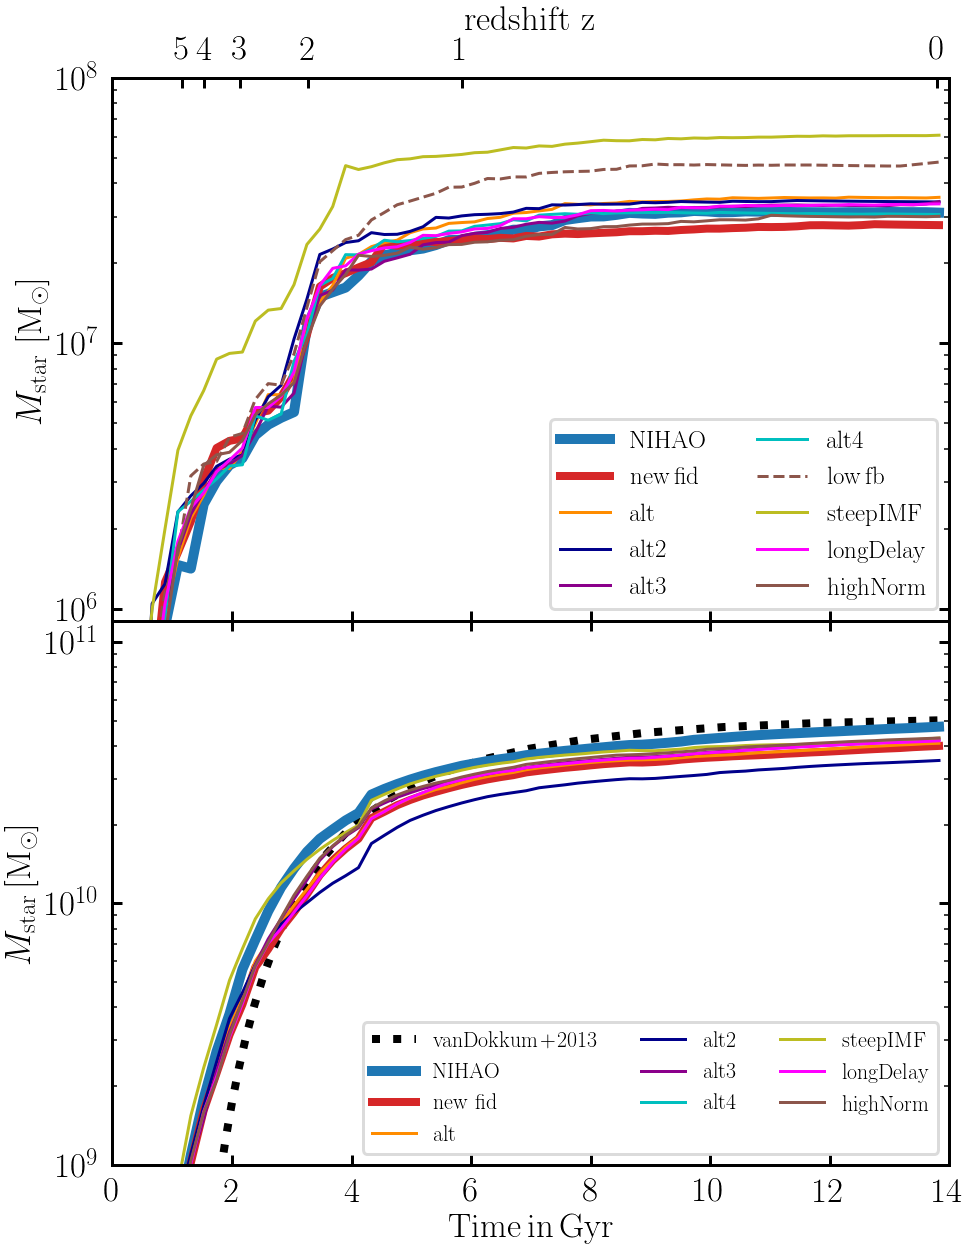

In [501]:
# combine both plots
fig = plt.figure(figsize=(15,20))
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[.5,.5])
gs.update(hspace=0.0, wspace=0.0)

#g2.83e11
# fiducial NIHAO
mg_fid = pickle.load(open('./data/mass_growth/g2.83e10_fiducial_mass_growth.dat','rb'), encoding='latin1')

# alternative yields
mg = pickle.load(open('./data/mass_growth/g2.83e10_mass_growth.dat','rb'), encoding='latin1')
mg_alt = pickle.load(open('./data/mass_growth/g2.83e10_alt_yield_mass_growth.dat','rb'), encoding='latin1')
mg_alt2 = pickle.load(open('./data/mass_growth/g2.83e10_alt_yield_2_mass_growth.dat','rb'), encoding='latin1')
mg_alt3 = pickle.load(open('./data/mass_growth/g2.83e10_alt_yield_3_mass_growth.dat','rb'), encoding='latin1')
mg_alt4 = pickle.load(open('./data/mass_growth/g2.83e10_alt_yield_4_mass_growth.dat','rb'), encoding='latin1')

mg_low_fb = pickle.load(open('./data/mass_growth/g2.83e10_e0.06_mass_growth.dat','rb'), encoding='latin1')
mg_steep_IMF = pickle.load(open('./data/mass_growth/g2.83e10_steep_IMF_mass_growth.dat','rb'), encoding='latin1')
mg_long_delay = pickle.load(open('./data/mass_growth/g2.83e10_long_delay_mass_growth.dat','rb'), encoding='latin1')
mg_long_delay2 = pickle.load(open('./data/mass_growth/g2.83e10_long_delay_2_mass_growth.dat','rb'), encoding='latin1')
mg_high_Ia = pickle.load(open('./data/mass_growth/g2.83e10_high_Ia_norm_mass_growth.dat','rb'), encoding='latin1')

mstar = mg_fid['mstar'][:16]+mg_fid['mstar'][17:]
time = mg_fid['time'][:16]+mg_fid['time'][17:]

ax = plt.subplot(gs[0])

ax.set_xlim([0,13.85])
ax.set_xticks([0,2,4,6,8,10,12,14])
ax.set_xticklabels([])
#mstar = mg_fid['time'][:16]+mg_fid['time'][17:]
ax.plot(time, mstar, c=cmap(0), lw=10, label=r'$\rm{NIHAO}$')

ax.plot(mg['time'],mg['mstar'], c=cmap(3), lw=8, label=r'$\rm{new\, fid}$')
ax.plot(mg_alt2['time'],mg_alt2['mstar'], c='darkorange', label=r'$\rm{alt}$')
ax.plot(mg_alt3['time'],mg_alt3['mstar'], c='darkblue', label=r'$\rm{alt2}$')
ax.plot(mg_alt4['time'],mg_alt4['mstar'], c='darkmagenta', label=r'$\rm{alt3}$')
ax.plot(mg_alt['time'],mg_alt['mstar'], c='c', label=r'$\rm{alt4}$')

ax.plot(mg_low_fb['time'],mg_low_fb['mstar'], c='tab:brown', ls='dashed', label=r'$\rm{low\, fb}$')
ax.plot(mg_steep_IMF['time'],mg_steep_IMF['mstar'], c='tab:olive', label=r'$\rm{steepIMF}$')

ax.plot(mg_long_delay2['time'],mg_long_delay2['mstar'], c='magenta', label=r'$\rm{longDelay}$')
plt.plot(mg_high_Ia['time'],mg_high_Ia['mstar'], c='tab:brown', label=r'$\rm{highNorm}$')

red = np.linspace(0,15, 100)
cosmology = pickle.load(open('./data/cosmology.dat','rb'), encoding='latin1')
cos = cosmology['cosmo']
#cos = cosmo.Cosmology(sim=s)
times = np.asarray([13.8 * cos.Exp2Time(1.0 / (1 + z)) / cos.Exp2Time(1) for z in red])

old_axis = ax
pz = plt.twiny()
labelzs = np.arange(5, - 1, -1)
times = [13.8 * cos.Exp2Time(1.0 / (1 + z)) / cos.Exp2Time(1) for z in labelzs]
pz.set_xticks(times)
pz.set_xticklabels([r'$%i$'%x for x in labelzs])
pz.set_xlim( old_axis.get_xlim() )
pz.set_xlabel(r'$\rm{redshift}\,\,z$')
plt.sca(old_axis)

#ax.set_xlabel(r'$\rm{Time\, in\, Gyr}$')
ax.set_ylabel(r'$M_{\rm{star}}\,\, [\rm{M_{\odot}}]$')
ax.set_xlim([0,14])
ax.set_ylim([9e5,1e8])
ax.set_yscale("log")
#plt.xscale("log")
ax.legend(ncol=2,fontsize=25)

ax2 = plt.subplot(gs[1])

# fiducial NIHAO
mg_fid = pickle.load(open('./data/mass_growth/g8.26e11_fiducial_mass_growth.dat','rb'), encoding='latin1')

# alternative yields
mg = pickle.load(open('./data/mass_growth/g8.26e11_mass_growth.dat','rb'), encoding='latin1')
mg_alt = pickle.load(open('./data/mass_growth/g2.83e10_alt_yield_mass_growth.dat','rb'), encoding='latin1')
mg_alt2 = pickle.load(open('./data/mass_growth/g8.26e11_alt_yield_2_mass_growth.dat','rb'), encoding='latin1')
mg_alt3 = pickle.load(open('./data/mass_growth/g8.26e11_alt_yield_3_mass_growth.dat','rb'), encoding='latin1')
mg_alt4 = pickle.load(open('./data/mass_growth/g8.26e11_alt_yield_4_mass_growth.dat','rb'), encoding='latin1')

mg_steep_IMF = pickle.load(open('./data/mass_growth/g8.26e11_steep_IMF_mass_growth.dat','rb'), encoding='latin1')
mg_long_delay = pickle.load(open('./data/mass_growth/g8.26e11_long_delay_mass_growth.dat','rb'), encoding='latin1')
mg_long_delay2 = pickle.load(open('./data/mass_growth/g8.26e11_long_delay_2_mass_growth.dat','rb'), encoding='latin1')
mg_high_Ia = pickle.load(open('./data/mass_growth/g8.26e11_high_Ia_norm_mass_growth.dat','rb'), encoding='latin1')

ax2.set_xlim([0,13.85])
ax2.set_xticks([0,2,4,6,8,10,12,14])
ax2.set_ylim([1e9,1.2e11])
ax2.set_yscale('log')
ax2.set_xlabel(r'$\rm{Time\, in\, Gyr}$')
ax2.set_ylabel(r'$M_{\rm{star}}\, [\rm{M_{\odot}]}$')

red = np.linspace(0,15, 100)
cosmology = pickle.load(open('./data/cosmology.dat','rb'), encoding='latin1')
cos = cosmology['cosmo']
#cos = cosmo.Cosmology(sim=s)
times = np.asarray([13.8 * cos.Exp2Time(1.0 / (1 + z)) / cos.Exp2Time(1) for z in red])

# van Dokkum+2013
ax2.plot(times,vanDokkum2013(red),c='k',zorder=0,ls='dotted',lw=8,label=r'$\rm{vanDokkum\!+\!2013}$')

#times_moster = np.asarray([13.8 * cos.Exp2Time(1.0 / (1 + z)) / cos.Exp2Time(1) for z in moster_data[:,0]])
#ax2.plot(times_moster,10**moster_data[:,1]+10**moster_data[:,2],c='k',zorder=0,lw=8,label=r'$\rm{Moster\!+\!2018}$')
#ax2.plot(times_moster,10**moster_data[:,1],c='k',zorder=-1,alpha=0.5,lw=6,ls='dotted',label='ex-situ')
    
plt.plot(mg_fid['time'],mg_fid['mstar'], c=cmap(0), lw=10, label=r'$\rm{NIHAO}$')

plt.plot(mg['time'],mg['mstar'], c=cmap(3), lw=8, label=r'$\rm{new\ fid}$')
plt.plot(mg_alt2['time'],mg_alt2['mstar'], c='darkorange', label=r'$\rm{alt}$')
plt.plot(mg_alt3['time'],mg_alt3['mstar'], c='darkblue', label=r'$\rm{alt2}$')
plt.plot(mg_alt4['time'],mg_alt4['mstar'], c='darkmagenta', label=r'$\rm{alt3}$')
plt.plot(mg_alt['time'],mg_alt['mstar'], c='c', label=r'$\rm{alt4}$')

plt.plot(mg_steep_IMF['time'],mg_steep_IMF['mstar'], c='tab:olive', label=r'$\rm{steepIMF}$')
plt.plot(mg_long_delay2['time'],mg_long_delay2['mstar'], c='magenta', label=r'$\rm{longDelay}$')
plt.plot(mg_high_Ia['time'],mg_high_Ia['mstar'], c='tab:brown', label=r'$\rm{highNorm}$')


#old_axis = ax
#pz = plt.twiny()
#labelzs = np.arange(5, - 1, -1)
#times = [13.8 * cos.Exp2Time(1.0 / (1 + z)) / cos.Exp2Time(1) for z in labelzs]
#pz.set_xticks(times)
#pz.set_xticklabels([r'$%i$'%x for x in labelzs])
#pz.set_xlim( old_axis.get_xlim() )
#pz.set_xlabel(r'$\rm{redshift}\,\,z$')
#plt.sca(old_axis)

ax2.legend(loc=4,ncol=3,fontsize=22)

plt.savefig('./paper_plots/massgrowth.pdf', bbox_inches='tight')
    

## simulation data

### MZR data

In [251]:
# get all the NIHAO simulation data
data_z0 = pickle.load(open('./data/NIHAO_01024_chemistry.dat','rb'), encoding='latin1')
data_z03 = pickle.load(open('./data/NIHAO_00768_chemistry.dat','rb'), encoding='latin1')
data_z08 = pickle.load(open('./data/NIHAO_00512_chemistry.dat','rb'), encoding='latin1')
data_z14 = pickle.load(open('./data/NIHAO_00336_chemistry.dat','rb'), encoding='latin1')
data_z208 = pickle.load(open('./data/NIHAO_00208_chemistry.dat','rb'), encoding='latin1')

In [252]:
# get the NIHAO simulation data for the specific galaxies rerun with new yields
data_fiducial_z0 = pickle.load(open('./data/NC_fiducial_01024_chemistry.dat','rb'), encoding='latin1')
data_fiducial_z03 = pickle.load(open('./data/NC_fiducial_00768_chemistry.dat','rb'), encoding='latin1')
data_fiducial_z08 = pickle.load(open('./data/NC_fiducial_00512_chemistry.dat','rb'), encoding='latin1')
data_fiducial_z14 = pickle.load(open('./data/NC_fiducial_00336_chemistry.dat','rb'), encoding='latin1')
data_fiducial_z208 = pickle.load(open('./data/NC_fiducial_00208_chemistry.dat','rb'), encoding='latin1')

In [253]:
# get the new simulation data
data_new_z0 = pickle.load(open('./data/new_CE/NC_01024_chemistry.dat','rb'), encoding='latin1')
data_new_z03 = pickle.load(open('./data/new_CE/NC_00768_chemistry.dat','rb'), encoding='latin1')
data_new_z08 = pickle.load(open('./data/new_CE/NC_00512_chemistry.dat','rb'), encoding='latin1')
data_new_z14 = pickle.load(open('./data/new_CE/NC_00336_chemistry.dat','rb'), encoding='latin1')
data_new_z208 = pickle.load(open('./data/new_CE/NC_00208_chemistry.dat','rb'), encoding='latin1')

In [375]:
# get the simulation data g2.83e10 with alternative yields
g283e10_alt_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_alt_yield_NC_01024_chemistry.dat','rb'), encoding='latin1')
g283e10_alt2_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_alt_yield_2_NC_01024_chemistry.dat','rb'), encoding='latin1')
g283e10_alt3_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_alt_yield_3_NC_01024_chemistry.dat','rb'), encoding='latin1')
g283e10_alt4_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_alt_yield_4_NC_01024_chemistry.dat','rb'), encoding='latin1')
g283e10_low_fb_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_e0.06_NC_01024_chemistry.dat','rb'), encoding='latin1')
g283e10_steep_IMF_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_steep_IMF_NC_01024_chemistry.dat','rb'), encoding='latin1')
g283e10_long_delay_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_long_delay_NC_01024_chemistry.dat','rb'), encoding='latin1')
g283e10_long_delay_2_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_long_delay_2_NC_01024_chemistry.dat','rb'), encoding='latin1')
g283e10_high_Ia_z0 = pickle.load(open('./data/new_CE/alt_yields/g2.83e10_high_Ia_norm_NC_01024_chemistry.dat','rb'), encoding='latin1')

In [259]:
# get the simulation data g8.26e11 with alternative yields
g826e11_alt_z0 = pickle.load(open('./data/new_CE/alt_yields/g8.26e11_alt_yield_NC_01024_chemistry.dat','rb'), encoding='latin1')
g826e11_alt2_z0 = pickle.load(open('./data/new_CE/alt_yields/g8.26e11_alt_yield_2_NC_01024_chemistry.dat','rb'), encoding='latin1')
g826e11_alt3_z0 = pickle.load(open('./data/new_CE/alt_yields/g8.26e11_alt_yield_3_NC_01024_chemistry.dat','rb'), encoding='latin1')
g826e11_alt4_z0 = pickle.load(open('./data/new_CE/alt_yields/g8.26e11_alt_yield_4_NC_01024_chemistry.dat','rb'), encoding='latin1')

g826e11_steep_IMF_z0 = pickle.load(open('./data/new_CE/alt_yields/g8.26e11_steep_IMF_NC_01024_chemistry.dat','rb'), encoding='latin1')
g826e11_long_delay_z0 = pickle.load(open('./data/new_CE/alt_yields/g8.26e11_long_delay_NC_01024_chemistry.dat','rb'), encoding='latin1')
g826e11_long_delay_2_z0 = pickle.load(open('./data/new_CE/alt_yields/g8.26e11_long_delay_2_NC_01024_chemistry.dat','rb'), encoding='latin1')
g826e11_high_Ia_z0 = pickle.load(open('./data/new_CE/alt_yields/g8.26e11_high_Ia_norm_NC_01024_chemistry.dat','rb'), encoding='latin1')

In [397]:
data_fiducial_z0.keys()

dict_keys(['feh_rh', 'zstar_tot', 'mgas2', 'oh_gas2', 'oh_gas3', 'mstar_rh', 'zstar3', 'feh', 'zstar', 'mgas_tot', 'oh_gas_tot', 'time', 'mstar_tot', 'oh_gas', 'z', 'zstar2', 'mstar2'])

### MDF

In [460]:
# mdf data for g8.26e11
mdf_g826e11 = pickle.load(open('./data/mdf/g8.26e11.01024_mdf.dat','rb'), encoding='latin1')
mdf_g826e11_alt = pickle.load(open('./data/mdf/g8.26e11_alt_yield.01024_mdf.dat','rb'), encoding='latin1')
mdf_g826e11_alt2 = pickle.load(open('./data/mdf/g8.26e11_alt_yield_2.01024_mdf.dat','rb'), encoding='latin1')
mdf_g826e11_alt3 = pickle.load(open('./data/mdf/g8.26e11_alt_yield_3.01024_mdf.dat','rb'), encoding='latin1')
mdf_g826e11_alt4 = pickle.load(open('./data/mdf/g8.26e11_alt_yield_4.01024_mdf.dat','rb'), encoding='latin1')

mdf_g826e11_steep_IMF = pickle.load(open('./data/mdf/g8.26e11_steep_IMF.01024_mdf.dat','rb'), encoding='latin1')
mdf_g826e11_long_delay = pickle.load(open('./data/mdf/g8.26e11_long_delay.01024_mdf.dat','rb'), encoding='latin1')
mdf_g826e11_long_delay_2 = pickle.load(open('./data/mdf/g8.26e11_long_delay_2.01024_mdf.dat','rb'), encoding='latin1')
mdf_g826e11_high_Ia = pickle.load(open('./data/mdf/g8.26e11_high_Ia_norm.01024_mdf.dat','rb'), encoding='latin1')

mdf_g826e11_fid = pickle.load(open('./data/mdf/g8.26e11_fiducial.01024_mdf.dat','rb'), encoding='latin1')

In [78]:
# get the mdf data for g2.83e10
mdf = pickle.load(open('./data/mdf/g2.83e10.01024_mdf.dat','rb'), encoding='latin1')
mdf_alt = pickle.load(open('./data/mdf/g2.83e10_alt_yield.01024_mdf.dat','rb'), encoding='latin1')
mdf_alt2 = pickle.load(open('./data/mdf/g2.83e10_alt_yield_2.01024_mdf.dat','rb'), encoding='latin1')
mdf_alt3 = pickle.load(open('./data/mdf/g2.83e10_alt_yield_3.01024_mdf.dat','rb'), encoding='latin1')
mdf_alt4 = pickle.load(open('./data/mdf/g2.83e10_alt_yield_4.01024_mdf.dat','rb'), encoding='latin1')

mdf_low_fb = pickle.load(open('./data/mdf/g2.83e10_e0.06.01024_mdf.dat','rb'), encoding='latin1')
mdf_steep_IMF = pickle.load(open('./data/mdf/g2.83e10_steep_IMF.01024_mdf.dat','rb'), encoding='latin1')
mdf_long_delay = pickle.load(open('./data/mdf/g2.83e10_long_delay.01024_mdf.dat','rb'), encoding='latin1')
mdf_long_delay_2 = pickle.load(open('./data/mdf/g2.83e10_long_delay_2.01024_mdf.dat','rb'), encoding='latin1')
mdf_high_Ia = pickle.load(open('./data/mdf/g2.83e10_high_Ia_norm.01024_mdf.dat','rb'), encoding='latin1')

mdf_fid = pickle.load(open('./data/mdf/g2.83e10_fiducial.01024_mdf.dat','rb'), encoding='latin1')

## observational data

In [12]:
# observational data compilation

########## gas phase metallicity ########
# Tremonti+2004
# 12+log(O/H)
def tremonti_fit(mstar):
    '''
    Returns the fitting function from Tremonti et al. 2004 for the 
    gas  phase metallicity, 12 + log(O/H) 
    This fit is valid between 8.5 to 11.25 in log stellar mass.
    '''
    Z_gas = -1.492 + 1.847 * np.log10(mstar) - 0.08026 * np.log10(mstar)**2

    return Z_gas

# Tremonti+2004 binned data
mstar_tremonti = 10**np.asarray([8.57,8.67,8.76,8.86,8.96,9.06,9.16,9.26,9.36,9.46,9.57,9.66,9.76,9.86,9.96,10.06,10.16,10.26,10.36,10.46,10.56,10.66,10.76,10.86,10.95,11.05,11.15,11.25])
z_tremonti = [8.44,8.48,8.57,8.61,8.63,8.66,8.68,8.71,8.74,8.78,8.82,8.84,8.87,8.90,8.94,8.97,8.99,9.01,9.03,9.05,9.07,9.08,9.09,9.10,9.11,9.11,9.11,9.11]
z_tremonti_p25 = [8.18,8.11,8.13,8.14,8.21,8.26,8.37,8.39,8.46,8.53,8.59,8.60,8.63,8.67,8.71,8.74,8.77,8.80,8.82,8.85,8.87,8.89,8.91,8.93,8.93,8.92,8.94,8.93]
z_tremonti_p975 = [8.77,8.84,8.88,8.89,8.95,8.97,8.95,9.04,9.03,9.07,9.08,9.09,9.10,9.12,9.14,9.15,9.16,9.17,9.18,9.21,9.21,9.23,9.24,9.25,9.26,9.27,9.29,9.29]

def Berg_fit(mstar):
    '''
    Returns the fitting function from Berg et al. 2012 Fig. 5 for the 
    gas  phase metallicity, 12 + log(O/H) 
    This fit is valid between 5 to 10 in log stellar mass.
    '''
    Z_gas = 5.61 + 0.29 * np.log10(mstar)
    Z_gas_h = 5.61 + 0.29 * np.log10(mstar) + 0.15
    Z_gas_l = 5.61 + 0.29 * np.log10(mstar) - 0.15

    return Z_gas, Z_gas_h, Z_gas_l

def zahid_fit(mstar, idx):
    '''
    Returns the fitting function from Zahid et al. 2013 for the 
    gas phase metallicity, 12 + log(O/H).
    This fit is valid between 9.0 to 11. in log stellar mass.
    Available redshifts are: 0.08, 0.29, 0.78, 1.40, 2.26, chose the appropriate function
    by passing the index corresponding to the redshift.
    '''

    Z0 = [9.121, 9.130, 9.161, 9.06, 9.06]
    M0 = [8.999, 9.304, 9.661, 9.6, 9.7]
    # gamma is chosen to be negative here, makes the  formula below easier. In original paper, gamma is positive and the formula has the minus sign in exponent
    gamma = [-0.85,-0.77,-0.65,-0.7,-0.6]

    Z_gas = Z0[idx] - np.log10(1+(mstar/10**M0[idx])**gamma[idx])

    return Z_gas



############# stellar metallicity #######################
def panter_fit(mstar):
    '''
    Returns the fit to the mass-metallicity relation by Panter et al. 2008.
    This fit is  valid for 8.8 < log(mstar)  < 11.8
    '''

    A = -0.452
    B = 0.572
    mc = 9.66
    delta = 1.04

    z_star = A + B * np.tanh((np.log10(mstar) - mc)/(delta))

    return 10**z_star

def kirby_fit(mstar):
    '''
    Returns the fit to the LG dwarf galaxy stellar mass-metallicity relation by Kirby et al. 2013.
    Valid in the range 3 < log mstar < 9.
    The scatter around this fit is 0.17 dex. Function returns feh plus scatter range.
    '''

    feh = -1.69 + 0.30 * np.log10(mstar/1e6)

    return feh, feh+0.17, feh-0.17


# Gallazi et al. 2005
galazzi = np.asarray([[8.36939e+8, -5.98631e-1],[9.22994e+8, -6.01102e-1],[1.01790e+9, -6.03461e-1],[1.12256e+9, -6.05034e-1],[1.23798e+9, -6.06831e-1],[1.36527e+9, -6.11886e-1],[1.50051e+9, -6.18608e-1],[1.66046e+9, -6.29410e-1],[1.83119e+9, -6.39408e-1],[2.01948e+9, -6.44575e-1],[2.22712e+9, -6.40531e-1],[2.45611e+9, -6.31994e-1],[2.70865e+9, -6.23007e-1],[2.98716e+9, -6.14470e-1],[3.29430e+9, -6.04023e-1],[3.63302e+9, -5.86499e-1],[4.00658e+9, -5.67402e-1],[4.41853e+9, -5.48979e-1],[4.87285e+9, -5.30894e-1],[5.37388e+9, -5.10898e-1],[5.92643e+9, -4.86971e-1],[6.53579e+9, -4.62258e-1],[7.20781e+9, -4.37545e-1],[7.91363e+9, -4.13719e-1],[8.57339e+9, -3.86503e-1],[9.20588e+9, -3.58855e-1],[9.92911e+9, -3.30091e-1],[1.07091e+10, -2.99234e-1],[1.14992e+10, -2.70505e-1],[1.23475e+10, -2.42548e-1],[1.34366e+10, -2.14226e-1],[1.48182e+10, -1.90523e-1],[1.63418e+10, -1.65136e-1],[1.79420e+10, -1.41130e-1],[1.96990e+10, -1.15821e-1],[2.17245e+10, -9.25684e-2],[2.39582e+10, -7.08880e-2],[2.64216e+10, -5.01063e-2],[2.91383e+10, -2.89876e-2],[3.21344e+10, -7.86888e-3],[3.54384e+10, 3.25214e-3],[3.90823e+10, 1.30252e-2],[4.31007e+10, 2.40338e-2],[4.75324e+10, 3.48179e-2],[5.24197e+10, 4.34675e-2],[5.78095e+10, 5.04322e-2],[6.37536e+10, 5.79586e-2],[7.03087e+10, 6.40246e-2],[7.75379e+10, 7.04276e-2],[8.55105e+10, 7.85156e-2],[9.43027e+10, 8.42446e-2],[1.03999e+11, 9.01983e-2],[1.14692e+11, 9.68260e-2],[1.26485e+11, 1.02330e-1],[1.39490e+11, 1.09520e-1],[1.53833e+11, 1.14125e-1],[1.69650e+11, 1.17158e-1],[1.87094e+11, 1.18956e-1],[2.06331e+11, 1.22272e-1],[2.27546e+11, 1.24179e-1],[2.50942e+11, 1.26819e-1],[2.76744e+11, 1.29290e-1],[3.05199e+11, 1.33447e-1],[3.36580e+11, 1.35019e-1],[3.71188e+11, 1.35693e-1],[4.09354e+11, 1.37940e-1],[4.51444e+11, 1.40187e-1],[4.97861e+11, 1.43332e-1],[5.49052e+11, 1.45916e-1],[6.05506e+11, 1.47151e-1],[6.67765e+11, 1.48612e-1],[7.36425e+11, 1.51982e-1],[7.97820e+11, 1.54212e-1]])
mstar_galazzi = galazzi[:,0]
z_galazzi = 10**galazzi[:,1]

galazzi_p84 = np.asarray([[8.59580e+8, 3.92614e-3],[9.35395e+8, 3.96827e-3],[1.12256e+9, 6.17281e-3],[1.22701e+9, 5.46137e-3],[1.46599e+9, -1.09019e-2],[1.59529e+9, -1.90461e-2],[1.88073e+9, -3.77496e-2],[2.03752e+9, -4.42007e-2],[2.41279e+9, -3.24699e-2],[2.63731e+9, -2.50185e-2],[3.12305e+9, -9.21688e-3],[3.39850e+9, -2.02116e-4],[4.00658e+9, 2.06638e-2],[4.34060e+9, 3.01159e-2],[5.09452e+9, 4.98706e-2],[5.54386e+9, 5.91100e-2],[6.65313e+9, 7.51456e-2],[7.23994e+9, 8.32055e-2],[8.53534e+9, 9.96343e-2],[9.24693e+9, 1.08493e-1],[1.09500e+10, 1.26594e-1],[1.19158e+10, 1.35413e-1],[1.41734e+10, 1.49960e-1],[1.53550e+10, 1.55978e-1],[1.81831e+10, 1.67371e-1],[1.98751e+10, 1.72139e-1],[2.37460e+10, 1.84334e-1],[2.59556e+10, 1.89439e-1],[3.10108e+10, 2.02756e-1],[3.37460e+10, 2.07236e-1],[4.04982e+10, 2.13428e-1],[4.40702e+10, 2.17276e-1],[5.24197e+10, 2.24325e-1],[5.72975e+10, 2.28980e-1],[6.84569e+10, 2.36457e-1],[7.48269e+10, 2.41611e-1],[8.94004e+10, 2.48252e-1],[9.77193e+10, 2.49163e-1],[1.16751e+11, 2.53419e-1],[1.27615e+11, 2.54655e-1],[1.53833e+11, 2.57575e-1],[1.67401e+11, 2.60215e-1],[2.00896e+11, 2.63754e-1],[2.18615e+11, 2.68401e-1],[2.62358e+11, 2.72853e-1],[2.85498e+11, 2.77823e-1],[3.42623e+11, 2.82401e-1],[3.72843e+11, 2.83847e-1],[4.43481e+11, 2.91275e-1],[4.86910e+11, 2.93702e-1],[5.79159e+11, 2.96443e-1],[6.35874e+11, 2.98644e-1],[7.63106e+11, 3.03857e-1],[8.08539e+11, 3.03463e-1]])
mstar_galazzi_p84 = galazzi_p84[:,0]
z_galazzi_p84 = 10**galazzi_p84[:,1]

galazzi_p16 = np.asarray([[8.75013e+8, -1.10290e+0],[9.43755e+8, -1.09696e+0],[1.10276e+9, -1.08301e+0],[1.20537e+9, -1.07534e+0],[1.44014e+9, -1.07672e+0],[1.56716e+9, -1.08218e+0],[1.86407e+9, -1.09368e+0],[2.02848e+9, -1.09825e+0],[2.39142e+9, -1.07504e+0],[2.59079e+9, -1.06239e+0],[3.04079e+9, -1.03718e+0],[3.27968e+9, -1.02756e+0],[3.86649e+9, -1.00741e+0],[4.18884e+9, -9.97607e-1],[4.91640e+9, -9.76408e-1],[5.30264e+9, -9.64745e-1],[6.36364e+9, -9.35631e-1],[6.80278e+9, -9.26645e-1],[7.87851e+9, -9.03279e-1],[8.49745e+9, -8.89987e-1],[9.75398e+9, -8.58683e-1],[1.05203e+10, -8.43443e-1],[1.20759e+10, -8.12065e-1],[1.30163e+10, -7.92133e-1],[1.39606e+10, -7.65884e-1],[1.52190e+10, -7.45001e-1],[1.73919e+10, -6.99394e-1],[1.85921e+10, -6.81056e-1],[2.04127e+10, -6.43853e-1],[2.14365e+10, -6.23906e-1],[2.29158e+10, -5.80657e-1],[2.40651e+10, -5.55944e-1],[2.64216e+10, -5.10224e-1],[2.79947e+10, -4.88600e-1],[2.99266e+10, -4.45420e-1],[3.17083e+10, -4.23110e-1],[3.48134e+10, -3.80142e-1],[3.70506e+10, -3.62356e-1],[4.12253e+10, -3.21055e-1],[4.38746e+10, -3.03044e-1],[4.81710e+10, -2.63585e-1],[5.10390e+10, -2.43732e-1],[5.78095e+10, -2.12046e-1],[6.14824e+10, -1.85728e-1],[7.30183e+10, -1.55587e-1],[7.78837e+10, -1.43849e-1],[8.86085e+10, -1.23572e-1],[9.68538e+10, -1.15497e-1],[1.13388e+11, -9.60988e-2],[1.27049e+11, -8.26830e-2],[1.48454e+11, -7.67293e-2],[1.58699e+11, -7.15620e-2],[1.83794e+11, -4.87583e-2],[2.02692e+11, -5.71833e-2],[2.16679e+11, -5.64250e-2],[2.48719e+11, -5.03309e-2],[2.73075e+11, -4.49951e-2],[3.27715e+11, -3.60646e-2],[3.58210e+11, -3.54530e-2],[4.27976e+11, -2.96616e-2],[4.67800e+11, -2.83136e-2],[5.63905e+11, -2.62916e-2],[6.13641e+11, -2.58422e-2],[7.36425e+11, -2.58422e-2],[8.00487e+11, -2.80047e-2]])
mstar_galazzi_p16 = galazzi_p16[:,0]
z_galazzi_p16 = 10**galazzi_p16[:,1]

In [ ]:
# Berg+2012 data
from astropy.io import ascii
berg_data1 = ascii.read('./data/Berg_table6.tex',Reader=ascii.Latex,data_start=2,names=['Galaxy' ,'RA' ,'DEC' ,'F4.5' ,'F_K_S' , 'D', 'D_err' ,'Ref', 'M_B', 'M_B_err', 'M_4.5', 'M_4.5_err', 'M_K_S', 'M_K_S_err', '(B-V)_0', '(B_V)_0_err', 'logL_4.5', 'log_L4.5_err', 'logM_star', 'logM_star_err'])
berg_data2 = ascii.read('./data/Berg_table7.tex',Reader=ascii.Latex,data_start=2,names=['Galaxy' ,'log(O/H)','log(O/H)_err','log(N/O)','log(N/O)_err','Ref'])

berg_data3 = ascii.read('./data/Berg_table5.tex',Reader=ascii.Latex,data_start=2,names=['Galaxy','Select','log(O/H)','log(O/H)_err','[OIII]/[OII]','[OIII]/[OII]_err','log(N/O)','log(N/O)_err','Previous Literature'])
berg_data4 = ascii.read('./data/Berg_table1.tex',Reader=ascii.Latex,data_start=2,names=['Galaxy', 'RA', 'DEC', 'F_4.5', 'F_K_S', 'D', 'Reference', 'M_B', 'M_4.5', 'M_K_S', '(B-V)_0', 'logL_4.5', 'logM_star', 'logM_star_err'])
# only select the galaxies for which we have O/H measurements
mask = np.isin(berg_data4['Galaxy'],berg_data3['Galaxy'])

In [370]:
# function definition for [O/Fe] vs. Mstar and Z/Zsun vs. Mstar plots

def setup_galazzi_plot_rescaled(axis=None, panter=False):
    '''
    Create a figure object to plot the stellar metallicity vs. stellar mass in comparison to 
    observational data from galazzi et al. 2005.
    If additionally panter is set to true, the fitting function derived by Panter et al. 2008 is added.
    '''
    if axis is None:
        fig = plt.figure(figsize=(17,11))
        axis = plt.subplot(111)
        axis.set_xscale('log')
        axis.set_yscale('log')
        axis.set_xlabel(r'$M_{\rm star}^{\rm2R_{half}}$ [$M_{\odot}$]')
        axis.set_ylabel(r'$Z_{\rm star}/Z_{\odot}$')
    
    # plot Galazzi data
    #axis.plot(mstar_galazzi,z_galazzi*(0.01941/0.0134),c='gray',label='Gallazzi+2005')
    axis.plot(mstar_galazzi,z_galazzi*(0.01941/0.0134),c='k',label=r'$\rm{Gallazzi\!+\!2005}$')
    axis.plot(mstar_galazzi_p84,z_galazzi_p84*(0.01941/0.0134),c='k',ls='dotted',lw=2)
    axis.plot(mstar_galazzi_p16,z_galazzi_p16*(0.01941/0.0134),c='k',ls='dotted',lw=2)
    
    if panter:
        # plot Panter data
        ms = np.linspace(10**8.8,10**11.8,100)
        zs = panter_fit(ms)
        axis.plot(ms,zs*(0.01941/0.0134),c='darkblue',label=r'$\rm{Panter\!+\!2008}$')
    
    axis.legend(loc=0, fontsize=25)
    
    return axis

def setup_galazzi_plot(axis=None, panter=False):
    '''
    Create a figure object to plot the stellar metallicity vs. stellar mass in comparison to 
    observational data from galazzi et al. 2005.
    If additionally panter is set to true, the fitting function derived by Panter et al. 2008 is added.
    '''
    if axis is None:
        fig = plt.figure(figsize=(17,11))
        axis = plt.subplot(111)
        axis.set_xscale('log')
        axis.set_yscale('log')
        axis.set_xlabel(r'$M_{\rm star}$ [$M_{\odot}$]')
        axis.set_ylabel(r'$Z_{\rm star}/Z_{\odot}$')
    
    # plot Galazzi data
    axis.plot(mstar_galazzi,z_galazzi,c='k',label=r'$\rm{Gallazzi+2005}$')
    axis.plot(mstar_galazzi_p84,z_galazzi_p84,c='k',ls='dashed',lw=2)
    axis.plot(mstar_galazzi_p16,z_galazzi_p16,c='k',ls='dashed',lw=2)
    
    if panter:
        # plot Panter data
        ms = np.linspace(10**8.8,10**11.8,100)
        zs = panter_fit(ms)
        axis.plot(ms,zs,c='darkblue',label=r'$\rm{Panter+2008}')
    
    axis.legend(loc=0, fontsize=25)
    
    return axis

def setup_kirby_plot(axis=None, galazzi=False, single=True, MC12=True):
    '''
    Create a figure object to plot the stellar [Fe/H] vs. stellar mass in comparison to 
    observational data from Kirby et al. 2013.
    '''
    if axis is None:
        fig = plt.figure(figsize=(17,11))
        axis = plt.subplot(111)
        axis.set_xscale('log')
        #axis.set_yscale('log')
        axis.set_ylim((-4,.5))
        axis.set_xlabel(r'$M_{\rm star}^{\rm R_{half}}$ [$M_{\odot}$]')
        #axis.set_xlabel(r'$M_{\rm star}$ [$M_{\odot}$]')
        axis.set_ylabel(r'$\rm{\left<[Fe/H]\right>_{star}}$')
    
    # plot Galazzi data
    if galazzi:
        axis.plot(mstar_galazzi,np.log10(z_galazzi),c='gray',alpha=0.3,ls='dashed',label=r'$\rm{Gallazzi\!+\!2005}$')
        axis.plot(mstar_galazzi_p84,np.log10(z_galazzi_p84),c='gray',alpha=0.3,ls='dotted',lw=1)
        axis.plot(mstar_galazzi_p16,np.log10(z_galazzi_p16),c='gray',alpha=0.3,ls='dotted',lw=1)
    
    # plot Kirby data
    ms = np.linspace(3e4,1e9,100)
    zs, zsh, zsl = kirby_fit(ms)
    axis.plot(ms,zs,c='k',label=r'$\rm{Kirby\!+\!2013}$')
    axis.plot(ms,zsh,c='k',ls='dotted',lw=1)
    axis.plot(ms,zsl,c='k',ls='dotted',lw=1)

    if single: 
        axis.scatter([],[],marker='v',s=150,color='darkgray',lw=1,zorder=-1,label=r'$\rm{Kirby\!+\!2013}$')
        ##isolated
        axis.errorbar(10**kirby_data_feh['M'][0:9],kirby_data_feh['feh'][0:9],xerr=[kirby_data_feh['M_err_l'][0:9],kirby_data_feh['M_err_h'][0:9]],
                      yerr=[kirby_data_feh['feh_err_l'][0:9],kirby_data_feh['feh_err_h'][0:9]],marker='v',markersize=15,color='darkgray',lw=1,ls='none',zorder=-1)
        ##MW
        axis.errorbar(10**kirby_data_feh['M'][9:19],kirby_data_feh['feh'][9:19],xerr=[kirby_data_feh['M_err_l'][9:19],kirby_data_feh['M_err_h'][9:19]],
                      yerr=[kirby_data_feh['feh_err_l'][9:19],kirby_data_feh['feh_err_h'][9:19]],marker='v',markersize=15,color='darkgray',ls='none',zorder=-1,lw=1)
        ##M31
        axis.errorbar(10**kirby_data_feh['M'][19::],kirby_data_feh['feh'][19::],xerr=[kirby_data_feh['M_err_l'][19::],kirby_data_feh['M_err_h'][19::]],
                      yerr=[kirby_data_feh['feh_err_l'][19::],kirby_data_feh['feh_err_h'][19::]],marker='v',markersize=15,color='darkgray',ls='none',lw=1,zorder=-1)#
    
    if MC12:
        
        ##McConnachie
        axis.errorbar(mcmass,mcdat['FeH'],xerr=[mcmassE-mcmass, mcmass-mcmasse],yerr=[mcdat['FeHe'],mcdat['FeHe']],marker='v',color='darkgray',alpha=.25,ls='none',zorder=-1,lw=1, label=r'$\rm{McConnachie+2012}$')
  
    axis.legend(loc=0, fontsize=25)
    
    return axis

def setup_tremonti_plot(axis=None, berg=True, berg_single=True, z_evol=False):
    '''
    Create a figure object to plot the gas phase metallicity vs. stellar mass in comparison to 
    observational data from tremonti et al. 2004 and Zahid et al. 2013.
    If additionally z_evol is set to True, the higher redshift data of Zahid et al. 2013 is plotted as well.
    '''
    if axis is None:
        fig = plt.figure(figsize=(17,11))
        axis = plt.subplot(111)
        axis.set_xscale('log')
        #axis.set_yscale('log')
        axis.set_xlabel(r'$M_{\rm star}^{\rm2R_{half}}$ [$M_{\odot}$]')
        #set_xlabel(r'$M_{\rm star}$ [$M_{\odot}$]')
        axis.set_ylabel(r'$12 + \log\left(\rm{O/H}\right)$')
    
    # plot Tremonti data
    #axis.plot(mstar_tremonti,z_tremonti,c='k',label='Tremonti+2004')
    axis.plot(mstar_tremonti,z_tremonti_p25,c='k',ls='dotted',lw=1, zorder=-1)
    axis.plot(mstar_tremonti,z_tremonti_p975,c='k',ls='dotted',lw=1, zorder=-1)
    
    ms = np.linspace(10**8.5,10**11.25,200)
    zg = tremonti_fit(ms)
    axis.plot(ms,zg,c='k',zorder=-1, label=r'$\rm{Tremonti\!+\!2004}$')
    
    if berg:
        ms = np.linspace(10**5,10**10,200)
        zg, zgh, zgl = Berg_fit(ms)
        axis.plot(ms,zg,c='k', ls='dashed', zorder=-1, label=r'$\rm{Berg\!+\!2012}$')
        axis.plot(ms,zgh,c='k',ls='dotted',lw=1, zorder=-1)
        axis.plot(ms,zgl,c='k',ls='dotted',lw=1, zorder=-1)
    
    if berg_single:
        # L06 data
        mstarh = 10**(berg_data1['logM_star']+berg_data1['logM_star_err']) - 10**berg_data1['logM_star']
        mstarl = 10**berg_data1['logM_star'] - 10**(berg_data1['logM_star']-berg_data1['logM_star_err'])
        axis.errorbar(10**berg_data1['logM_star'],berg_data2['log(O/H)'],xerr=[mstarl,mstarh],yerr=[berg_data2['log(O/H)_err'],berg_data2['log(O/H)_err']],marker='v',markersize=10,color='darkgray',alpha=.75,ls='none',zorder=-10,lw=1)
        
        mstarh = 10**(berg_data4[mask]['logM_star']+berg_data4[mask]['logM_star_err']) - 10**berg_data4[mask]['logM_star']
        mstarl = 10**berg_data4[mask]['logM_star'] - 10**(berg_data4[mask]['logM_star']-berg_data4[mask]['logM_star_err'])
        axis.errorbar(10**berg_data4[mask]['logM_star'],berg_data3['log(O/H)'],xerr=[mstarl,mstarh],yerr=[berg_data3['log(O/H)_err'],berg_data3['log(O/H)_err']],marker='v',markersize=10,color='darkgray',alpha=.75,ls='none',zorder=-10,lw=1, label=r'$\rm{Berg\!+\!2012}$')
    # plot Zahid data
    if not z_evol:
        ms = np.linspace(1e9,1e11,100)
        zg = zahid_fit(ms, 0)
        axis.plot(ms,zg,c='gray',lw=4,label=r'$\rm{Zahid\!+\!2013}$')
    else:
        # plot Zahid data for higher redshift
        ms = np.linspace(1e9,1e11,100)
        if z_evol == 0.3:
            zg = zahid_fit(ms, 1)
            axis.plot(ms,zg,c='gray',lw=4, zorder=-1, label='$z=0.3$')
        if z_evol == 0.8:
            zg = zahid_fit(ms, 2)
            axis.plot(ms,zg,c='gray',lw=4, zorder=-1, label='$z=0.8$')
        if z_evol == 1.4:
            zg = zahid_fit(ms, 3)
            axis.plot(ms,zg,c='gray',lw=4, zorder=-1, label='$z=1.4$')
        if z_evol == 2.3:
            zg = zahid_fit(ms, 4)
            axis.plot(ms,zg,c='gray',lw=4, zorder=-1, label='$z=2.26$')

    axis.legend(loc=0, fontsize=25)
    
    return axis

In [15]:
# Laeman+2012 fit to mdf
def Laeman_fit(Z):
    """
    Fit characterizing the metallicity spread in terms of average metallicity for 
    Local group dwarfs taken from Laeman+2012.
    Returns the square of the scatter of the mdf for given mean metallicity Z.
    """
    a = -0.689
    b = 1.889

    return 10**(a+b*np.log10(Z))

def log_Laeman_fit(Z):
    """
    Fit characterizing the metallicity spread in terms of average metallicity for 
    Local group dwarfs taken from Laeman+2012.
    Returns the square of the scatter of the mdf for given mean metallicity Z.
    """
    a = -0.689
    b = 1.889

    return a+b*np.log10(Z)

In [16]:
# get Kirby+2013 data
from astropy.io import ascii
kirby_data = ascii.read('./data/kirby_data.txt',data_start=2,names=['Name','dist','d_err_l','d_err_h','LV','LV_err_l','LV_err_h','rh','rh_err_l','rh_err_h','sigmav','sigmav_err_l','sigmav_err_h','M','M_err_l','M_err_h']).to_pandas()
kirby_data_feh = ascii.read('./data/kirby_Fe_H_data.txt',data_start=1,names=['name','LV','LV_err_l','LV_err_h','M','M_err_l','M_err_h','feh','feh_err_l','feh_err_h']).to_pandas()


In [371]:
# get McConnachie+2012 data
mcdat = ascii.read('./data/McConnachie2012_extended.dat',data_start=1,names=['SubG','n','Name','MType','E(B-V)','(m-M)','(m-M)E','(m-M)e','D','DE','De','D(MW)','V(MW)','D(M31)','V(M31)','D(LG)','V(LG)','Vmag','VmagE','Vmage','Ell','VMag','VMagE','VMage','R2','R2E','R2e','Mass','sigma*','sigma*E','sigma*e','vsini*','vsini*e','MHI','sigHI','sigHIe','vHI','vHIe','Mdyn','FeH','FeHe'])
idx = np.where(mcdat['FeHe']<90.)
mcdat = mcdat[idx]
mcmass = 10**(0.4*(4.74-mcdat['VMag']))
mcmassE = 10**(0.4*(4.74-(mcdat['VMag']-mcdat['VMage'])))
mcmasse = 10**(0.4*(4.74-(mcdat['VMag']+mcdat['VMage'])))


## Mass metallicity relation

### total metals within 2 Rhalf

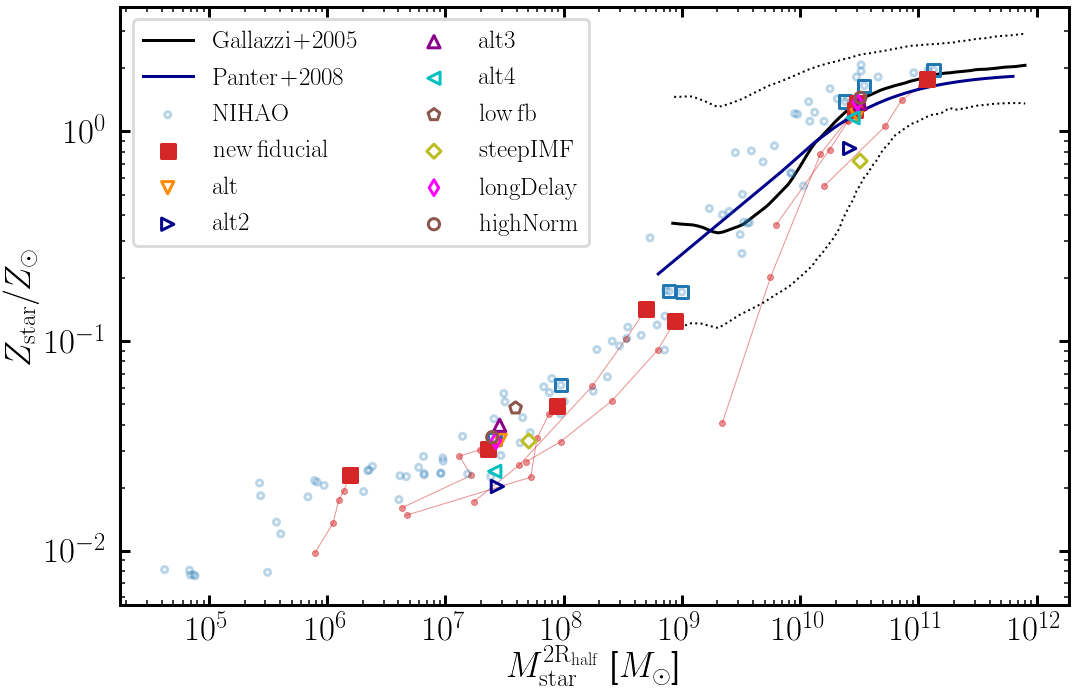

In [376]:
# new paper version Gallazzi data rescaled
zsol = 0.0134 #0.01941 
zsol_new = 0.0134
cmap = plt.get_cmap("tab10")
ax = setup_galazzi_plot_rescaled(panter=True)
#mstar for normal NIHAO is within 2 rhalf
ax.scatter(data_z0['mstar'],np.asarray(data_z0['zstar2'])/zsol_new, label=r'$\rm{NIHAO}$',zorder=10,facecolors='none',edgecolors=cmap(0),alpha=.3)
ax.scatter(data_fiducial_z0['mstar2'],np.asarray(data_fiducial_z0['zstar2'])/zsol_new,marker='s',zorder=10,s=150,facecolors='none',edgecolors=cmap(0)) #label='fiducial'

ax.scatter(data_new_z0['mstar2'],np.asarray(data_new_z0['zstar2'])/zsol_new, label=r'$\rm{new\, fiducial}$',marker='s',zorder=10,s=200,color=cmap(3))

# alt yield
ax.scatter(g283e10_alt2_z0['mstar2'],np.asarray(g283e10_alt2_z0['zstar2'])/zsol_new,label=r'$\rm{alt}$', marker='v',zorder=10,s=150,facecolors='none',edgecolors='darkorange')
ax.scatter(g826e11_alt2_z0['mstar2'],np.asarray(g826e11_alt2_z0['zstar2'])/zsol_new, marker='v',zorder=10,s=150,facecolors='none',edgecolors='darkorange')

ax.scatter(g283e10_alt3_z0['mstar2'],np.asarray(g283e10_alt3_z0['zstar2'])/zsol_new,label=r'$\rm{alt2}$', marker='>',zorder=10,s=150,facecolors='none',edgecolors='darkblue')
ax.scatter(g826e11_alt3_z0['mstar2'],np.asarray(g826e11_alt3_z0['zstar2'])/zsol_new, marker='>',zorder=10,s=150,facecolors='none',edgecolors='darkblue')

ax.scatter(g283e10_alt4_z0['mstar2'],np.asarray(g283e10_alt4_z0['zstar2'])/zsol_new,label=r'$\rm{alt3}$', marker='^',zorder=10,s=150,facecolors='none',edgecolors='darkmagenta')
ax.scatter(g826e11_alt4_z0['mstar2'],np.asarray(g826e11_alt4_z0['zstar2'])/zsol_new, marker='^',zorder=10,s=150,facecolors='none',edgecolors='darkmagenta')

ax.scatter(g283e10_alt_z0['mstar2'],np.asarray(g283e10_alt_z0['zstar2'])/zsol_new,label=r'$\rm{alt4}$', marker='<',zorder=10,s=150,facecolors='none',edgecolors='c')
ax.scatter(g826e11_alt_z0['mstar2'],np.asarray(g826e11_alt_z0['zstar2'])/zsol_new, marker='<',zorder=10,s=150,facecolors='none',edgecolors='c')


# low fb
ax.scatter(g283e10_low_fb_z0['mstar2'],np.asarray(g283e10_low_fb_z0['zstar2'])/zsol_new,label=r'$\rm{low\, fb}$', marker='p',zorder=10,s=150,facecolors='none',edgecolors='tab:brown')#cmap(4))

ax.scatter(g283e10_steep_IMF_z0['mstar2'],np.asarray(g283e10_steep_IMF_z0['zstar2'])/zsol_new,label=r'$\rm{steepIMF}$', marker='D',zorder=10,s=100,facecolors='none',edgecolors='tab:olive')#cmap(5))
ax.scatter(g826e11_steep_IMF_z0['mstar2'],np.asarray(g826e11_steep_IMF_z0['zstar2'])/zsol_new, marker='D',zorder=10,s=100,facecolors='none',edgecolors='tab:olive')#cmap(5))

# long delay time
ax.scatter(g283e10_long_delay_2_z0['mstar2'],np.asarray(g283e10_long_delay_2_z0['zstar2'])/zsol_new,label=r'$\rm{longDelay}$', marker='d',zorder=10,s=125,facecolors='none',edgecolors='magenta')#cmap(5))
ax.scatter(g826e11_long_delay_2_z0['mstar2'],np.asarray(g826e11_long_delay_2_z0['zstar2'])/zsol_new, marker='d',zorder=10,s=125,facecolors='none',edgecolors='magenta')

# high Ia normalization 
ax.scatter(g283e10_high_Ia_z0['mstar2'],np.asarray(g283e10_high_Ia_z0['zstar2'])/zsol_new,label=r'$\rm{highNorm}$', marker='o',zorder=10,s=125,facecolors='none',edgecolors='tab:brown')#cmap(5))
ax.scatter(g826e11_high_Ia_z0['mstar2'],np.asarray(g826e11_high_Ia_z0['zstar2'])/zsol_new, marker='o',zorder=10,s=125,facecolors='none',edgecolors='tab:brown')



for i in range(len(data_new_z0['mstar2'])):    
    ax.plot([data_new_z0['mstar2'][i],data_new_z03['mstar2'][i],data_new_z08['mstar2'][i],data_new_z14['mstar2'][i],data_new_z208['mstar2'][i]],[np.asarray(data_new_z0['zstar2'])[i]/zsol_new,np.asarray(data_new_z03['zstar2'])[i]/zsol_new,np.asarray(data_new_z08['zstar2'])[i]/zsol_new,np.asarray(data_new_z14['zstar2'])[i]/zsol_new,np.asarray(data_new_z208['zstar2'])[i]/zsol_new],marker='o',zorder=1,markerfacecolor=None,c=cmap(3), lw=1, alpha=.5)

#ax.plot([data_new_hr_z0['mstar2'],data_new_hr_z03['mstar2'],data_new_hr_z08['mstar2'],data_new_hr_z14['mstar2'],data_new_hr_z208['mstar2']],[np.asarray(data_new_hr_z0['zstar2'])/zsol_new,np.asarray(data_new_hr_z03['zstar2'])/zsol_new,np.asarray(data_new_hr_z08['zstar2'])/zsol_new,np.asarray(data_new_hr_z14['zstar2'])/zsol_new,np.asarray(data_new_hr_z208['zstar2'])/zsol_new],marker='o',zorder=1,markerfacecolor=None,c=cmap(3), lw=1, alpha=.5)
#ax.plot([data_new_yield2_z0['mstar2'],data_new_yield2_z03['mstar2'],data_new_yield2_z08['mstar2'],data_new_yield2_z14['mstar2'],data_new_yield2_z208['mstar2']],[np.asarray(data_new_yield2_z0['zstar2'])/zsol_new,np.asarray(data_new_yield2_z03['zstar2'])/zsol_new,np.asarray(data_new_yield2_z08['zstar2'])/zsol_new,np.asarray(data_new_yield2_z14['zstar2'])/zsol_new,np.asarray(data_new_yield2_z208['zstar2'])/zsol_new],marker='>',zorder=1,markerfacecolor=None,c=cmap(7), lw=1, alpha=.5)

ax.legend(loc=2, fontsize=25, ncol=2)

# Create inset of mixed specifications in the second subplot;
# width is 30% of parent axes' bounding box and
# height is 1 inch at the upper left corner (loc=2)

#axins = inset_axes(ax, width="40%", height="40%", loc=2, borderpad=7)
#axins.bar(mdf_fid['zhist'][1][:-1], mdf_fid['zhist'][0], width=.25, align='edge', color='lightgray', edgecolor='lightgray', label='NIHAO',zorder=-2)
#axins.step(mdf['zhist'][1][:-1], mdf['zhist'][0], where='post', lw=9, color=cmap(3), label='new',zorder=-1)
#axins.step(mdf_alt2['zhist'][1][:-1], mdf_alt2['zhist'][0], where='post', lw=7, color='darkorange', label='alt', zorder=0)
#axins.step(mdf_alt3['zhist'][1][:-1], mdf_alt3['zhist'][0], where='post', lw=5, color='darkblue', label='alt2', zorder=1)
#axins.step(mdf_alt4['zhist'][1][:-1], mdf_alt4['zhist'][0], where='post', lw=5, color='darkmagenta', label='alt3',zorder=2)
#axins.step(mdf_alt['zhist'][1][:-1], mdf_alt['zhist'][0], where='post', lw=3, color='c', label='alt4',zorder=3)

#axins.step(mdf_low_fb['zhist'][1][:-1], mdf_low_fb['zhist'][0], where='post', lw=4, color='c', label='low fb',zorder=2)
#axins.step(mdf_steep_IMF['zhist'][1][:-1], mdf_steep_IMF['zhist'][0], where='post', lw=6, ls='dashed', color=cmap(5), label='steepIMF', zorder=1)

#axins.step(data_low_fb['zhist'][1][:-1], data_low_fb['zhist'][0], where='post', lw=4, color=cmap(4), label='low fb')
#axins.set_xlabel(r'$\log\left(Z_{\rm star}/Z_{\odot}\right)$', fontsize=20)
#axins.set_ylabel(r'${\rm{d}}N/\rm{d}\log\left(Z_{\rm star}/Z_{\odot}\right)$', fontsize=20)
#axins.set_title("g2.83e10", fontsize=20)
#axins.set_xlim((-3,-0.5))
#axins.legend(loc=0, fontsize=15)
#axins.tick_params(labelsize=20)
#plt.savefig('./paper_plots/galazzi_inset.pdf', bbox_inches='tight')

plt.savefig('./paper_plots/galazzi.pdf', bbox_inches='tight')

### iron abundance

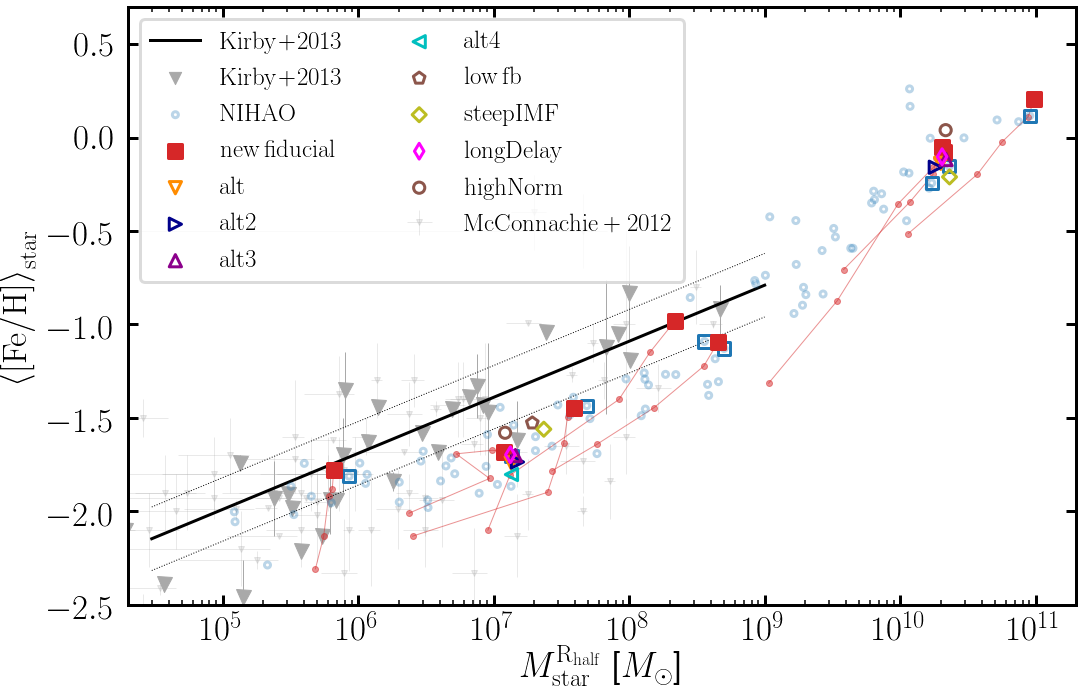

In [377]:
# new paper version
cmap = plt.get_cmap("tab10")
ax = setup_kirby_plot()
     
ax.scatter(data_z0['mstar_rh'],np.asarray(data_z0['feh_rh']), label=r'$\rm{NIHAO}$',zorder=10,facecolors='none',edgecolors=cmap(0),alpha=.3)
ax.scatter(data_fiducial_z0['mstar_rh'],np.asarray(data_fiducial_z0['feh_rh']),marker='s',zorder=10,s=150,facecolors='none',edgecolors=cmap(0)) #label='fiducial'

ax.scatter(data_new_z0['mstar_rh'],np.asarray(data_new_z0['feh_rh']), label=r'$\rm{new\, fiducial}$',marker='s',zorder=10,s=200,color=cmap(3))

# alt yield
ax.scatter(g283e10_alt2_z0['mstar_rh'],np.asarray(g283e10_alt2_z0['feh_rh']),label=r'$\rm{alt}$', marker='v',zorder=10,s=150,facecolors='none',edgecolors='darkorange')
ax.scatter(g826e11_alt2_z0['mstar_rh'],np.asarray(g826e11_alt2_z0['feh_rh']), marker='v',zorder=10,s=150,facecolors='none',edgecolors='darkorange')

ax.scatter(g283e10_alt3_z0['mstar_rh'],np.asarray(g283e10_alt3_z0['feh_rh']),label=r'$\rm{alt2}$', marker='>',zorder=10,s=150,facecolors='none',edgecolors='darkblue')
ax.scatter(g826e11_alt3_z0['mstar_rh'],np.asarray(g826e11_alt3_z0['feh_rh']), marker='>',zorder=10,s=150,facecolors='none',edgecolors='darkblue')

ax.scatter(g283e10_alt4_z0['mstar_rh'],np.asarray(g283e10_alt4_z0['feh_rh']),label=r'$\rm{alt3}$', marker='^',zorder=10,s=150,facecolors='none',edgecolors='darkmagenta')
ax.scatter(g826e11_alt4_z0['mstar_rh'],np.asarray(g826e11_alt4_z0['feh_rh']), marker='^',zorder=10,s=150,facecolors='none',edgecolors='darkmagenta')

ax.scatter(g283e10_alt_z0['mstar_rh'],np.asarray(g283e10_alt_z0['feh_rh']),label=r'$\rm{alt4}$', marker='<',zorder=10,s=150,facecolors='none',edgecolors='c')

# low fb
ax.scatter(g283e10_low_fb_z0['mstar_rh'],np.asarray(g283e10_low_fb_z0['feh_rh']),label=r'$\rm{low\, fb}$', marker='p',zorder=10,s=150,facecolors='none',edgecolors='tab:brown')#cmap(4))

ax.scatter(g283e10_steep_IMF_z0['mstar_rh'],np.asarray(g283e10_steep_IMF_z0['feh_rh']),label=r'$\rm{steepIMF}$', marker='D',zorder=10,s=100,facecolors='none',edgecolors='tab:olive')#cmap(5))
ax.scatter(g826e11_steep_IMF_z0['mstar_rh'],np.asarray(g826e11_steep_IMF_z0['feh_rh']), marker='D',zorder=10,s=100,facecolors='none',edgecolors='tab:olive')#cmap(5))

# long delay time
ax.scatter(g283e10_long_delay_2_z0['mstar_rh'],np.asarray(g283e10_long_delay_2_z0['feh_rh']),label=r'$\rm{longDelay}$', marker='d',zorder=10,s=125,facecolors='none',edgecolors='magenta')#cmap(5))
ax.scatter(g826e11_long_delay_2_z0['mstar_rh'],np.asarray(g826e11_long_delay_2_z0['feh_rh']), marker='d',zorder=10,s=125,facecolors='none',edgecolors='magenta')

# high Ia normalization 
ax.scatter(g283e10_high_Ia_z0['mstar_rh'],np.asarray(g283e10_high_Ia_z0['feh_rh']),label=r'$\rm{highNorm}$', marker='o',zorder=10,s=125,facecolors='none',edgecolors='tab:brown')#cmap(5))
ax.scatter(g826e11_high_Ia_z0['mstar_rh'],np.asarray(g826e11_high_Ia_z0['feh_rh']), marker='o',zorder=10,s=125,facecolors='none',edgecolors='tab:brown')



for i in range(len(data_new_z0['mstar_rh'])):    
    ax.plot([data_new_z0['mstar_rh'][i],data_new_z03['mstar_rh'][i],data_new_z08['mstar_rh'][i],data_new_z14['mstar_rh'][i],data_new_z208['mstar_rh'][i]],[np.asarray(data_new_z0['feh_rh'])[i],np.asarray(data_new_z03['feh_rh'])[i],np.asarray(data_new_z08['feh_rh'])[i],np.asarray(data_new_z14['feh_rh'])[i],np.asarray(data_new_z208['feh_rh'])[i]],marker='o',zorder=1,markerfacecolor=None,c=cmap(3), lw=1, alpha=.5)

#ax.plot([data_new_hr_z0['mstar_rh'],data_new_hr_z03['mstar_rh'],data_new_hr_z08['mstar_rh'],data_new_hr_z14['mstar_rh'],data_new_hr_z208['mstar_rh']],[np.asarray(data_new_hr_z0['feh_rh']),np.asarray(data_new_hr_z03['feh_rh']),np.asarray(data_new_hr_z08['feh_rh']),np.asarray(data_new_hr_z14['feh_rh']),np.asarray(data_new_hr_z208['feh_rh'])],marker='o',zorder=1,markerfacecolor=None,c=cmap(3), lw=1, alpha=.5)

ax.legend(fontsize=25, ncol=2)
ax.set_ylim(-2.5,.7)
ax.set_xlim(2e4,2e11)


# Create inset of mixed specifications in the second subplot;
# width is 30% of parent axes' bounding box and
# height is 1 inch at the upper left corner (loc=2)
#axins = inset_axes(ax, width="40%", height="40%", loc=4, borderpad=7)

#axins.bar(data_fid['feh'][1][:-1], data_fid['feh'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='NIHAO')
#hist = data_hr['feh'][0]
#axins.step(data_hr['feh'][1][:-1], hist, where='post', lw=8, color=cmap(3), label='new')
#axins.step(data_alt2['feh'][1][:-1], data_alt2['feh'][0], where='post', lw=6, color='c', label='alt2')
#axins.step(data_low_fb['feh'][1][:-1], data_low_fb['feh'][0], where='post', lw=4, color=cmap(4), label='low fb')
#axins.step(data_alt3['feh'][1][:-1], data_alt3['feh'][0], where='post', lw=2, color='darkmagenta', label='alt3')
#axins.set_xlabel(r'$\rm{[Fe/H]}$', fontsize=20)
#axins.set_ylabel(r'${\rm{d}}N/\rm{d[Fe/H]}$', fontsize=20)
#axins.set_title("g2.83e10", fontsize=20)
#axins.set_xlim((-4.5,-0.5))
#axins.legend(loc=0, fontsize=15)
#axins.tick_params(labelsize=20)

plt.savefig('./paper_plots/galazzi_feh.pdf', bbox_inches='tight')

### gas phase metallicity

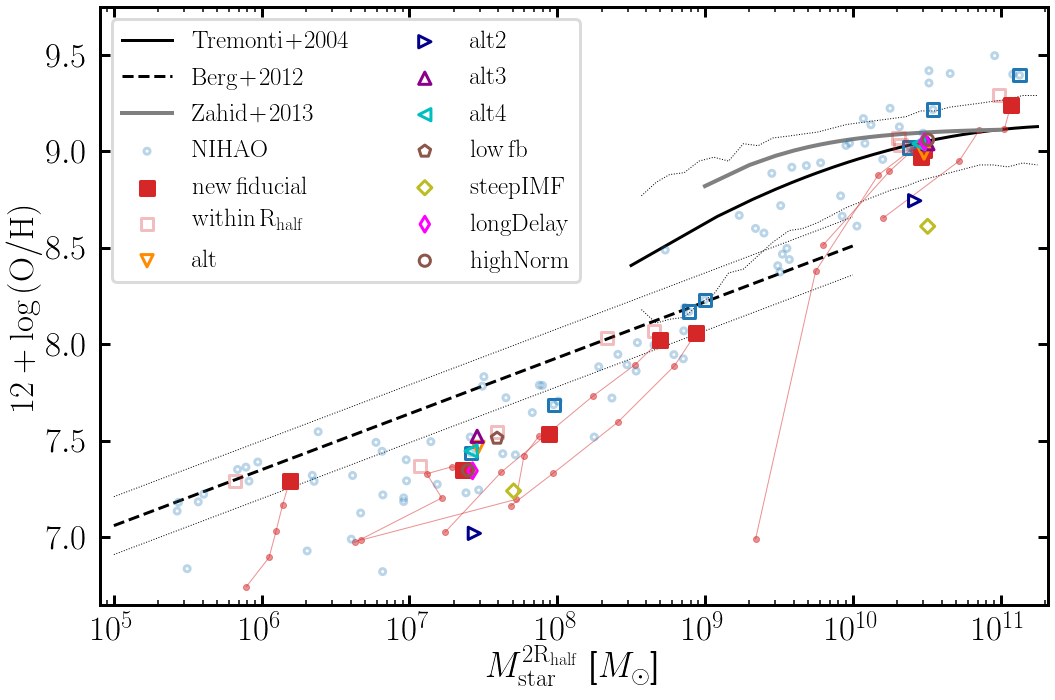

In [380]:
# new oxygen abundance
ax2 = setup_tremonti_plot()

ax2.scatter(data_z0['mstar'],data_z0['oh_gas2'], label=r'$\rm{NIHAO}$',zorder=10,facecolors='none',edgecolors=cmap(0),alpha=.3)

ax2.scatter(data_fiducial_z0['mstar2'],np.asarray(data_fiducial_z0['oh_gas2']),marker='s',zorder=10,s=150,facecolors='none',edgecolors=cmap(0)) #label='fiducial'

ax2.scatter(data_new_z0['mstar2'],np.asarray(data_new_z0['oh_gas2']), label=r'$\rm{new\, fiducial}$',marker='s',zorder=10,s=200,color=cmap(3))

ax2.scatter(data_new_z0['mstar_rh'],np.asarray(data_new_z0['oh_gas']), label=r'$\rm{within\, R_{half}}$',marker='s',zorder=10,s=150,facecolors='none',edgecolors=cmap(3),alpha=0.3)

#ax.scatter(data_new_hr_z0['mstar2'],np.asarray(data_new_hr_z0['oh_gas2']),marker='s',zorder=10,s=150,c=cmap(3))

# alt yield
ax2.scatter(g283e10_alt2_z0['mstar2'],np.asarray(g283e10_alt2_z0['oh_gas2']),label=r'$\rm{alt}$', marker='v',zorder=10,s=150,facecolors='none',edgecolors='darkorange')
ax2.scatter(g826e11_alt2_z0['mstar2'],np.asarray(g826e11_alt2_z0['oh_gas2']), marker='v',zorder=10,s=150,facecolors='none',edgecolors='darkorange')

ax2.scatter(g283e10_alt3_z0['mstar2'],np.asarray(g283e10_alt3_z0['oh_gas2']),label=r'$\rm{alt2}$', marker='>',zorder=10,s=150,facecolors='none',edgecolors='darkblue')
ax2.scatter(g826e11_alt3_z0['mstar2'],np.asarray(g826e11_alt3_z0['oh_gas2']), marker='>',zorder=10,s=150,facecolors='none',edgecolors='darkblue')

ax2.scatter(g283e10_alt4_z0['mstar2'],np.asarray(g283e10_alt4_z0['oh_gas2']),label=r'$\rm{alt3}$', marker='^',zorder=10,s=150,facecolors='none',edgecolors='darkmagenta')
ax2.scatter(g826e11_alt4_z0['mstar2'],np.asarray(g826e11_alt4_z0['oh_gas2']), marker='^',zorder=10,s=150,facecolors='none',edgecolors='darkmagenta')

ax2.scatter(g283e10_alt_z0['mstar2'],np.asarray(g283e10_alt_z0['oh_gas2']),label=r'$\rm{alt4}$', marker='<',zorder=10,s=150,facecolors='none',edgecolors='c')
ax2.scatter(g826e11_alt_z0['mstar2'],np.asarray(g826e11_alt_z0['oh_gas2']), marker='<',zorder=10,s=150,facecolors='none',edgecolors='c')


# low fb
ax2.scatter(g283e10_low_fb_z0['mstar2'],np.asarray(g283e10_low_fb_z0['oh_gas2']),label=r'$\rm{low\, fb}$', marker='p',zorder=10,s=150,facecolors='none',edgecolors='tab:brown')#cmap(4))
ax2.scatter(g283e10_steep_IMF_z0['mstar2'],np.asarray(g283e10_steep_IMF_z0['oh_gas2']),label=r'$\rm{steepIMF}$', marker='D',zorder=10,s=100,facecolors='none',edgecolors='tab:olive')#cmap(5))
ax2.scatter(g826e11_steep_IMF_z0['mstar2'],np.asarray(g826e11_steep_IMF_z0['oh_gas2']), marker='D',zorder=10,s=100,facecolors='none',edgecolors='tab:olive')#cmap(5))

# long delay time
ax2.scatter(g283e10_long_delay_2_z0['mstar2'],np.asarray(g283e10_long_delay_2_z0['oh_gas2']),label=r'$\rm{longDelay}$', marker='d',zorder=10,s=125,facecolors='none',edgecolors='magenta')#cmap(5))
ax2.scatter(g826e11_long_delay_2_z0['mstar2'],np.asarray(g826e11_long_delay_2_z0['oh_gas2']), marker='d',zorder=10,s=125,facecolors='none',edgecolors='magenta')#cmap(5))

# high Ia normalization 
ax2.scatter(g283e10_high_Ia_z0['mstar2'],np.asarray(g283e10_high_Ia_z0['oh_gas2']),label=r'$\rm{highNorm}$', marker='o',zorder=10,s=125,facecolors='none',edgecolors='tab:brown')#cmap(5))
ax2.scatter(g826e11_high_Ia_z0['mstar2'],np.asarray(g826e11_high_Ia_z0['oh_gas2']), marker='o',zorder=10,s=125,facecolors='none',edgecolors='tab:brown')


for i in range(len(data_new_z0['mstar2'])):    
    ax2.plot([data_new_z0['mstar2'][i],data_new_z03['mstar2'][i],data_new_z08['mstar2'][i],data_new_z14['mstar2'][i],data_new_z208['mstar2'][i]],[np.asarray(data_new_z0['oh_gas2'])[i],np.asarray(data_new_z03['oh_gas2'])[i],np.asarray(data_new_z08['oh_gas2'])[i],np.asarray(data_new_z14['oh_gas2'])[i],np.asarray(data_new_z208['oh_gas2'])[i]],marker='o',zorder=1,markerfacecolor=None,c=cmap(3), lw=1, alpha=.5)


ax2.set_ylim([6.65,9.75])
ax2.set_xlim(8e4,2.1e11)
ax2.legend(ncol=2, fontsize=25)
plt.savefig('./paper_plots/oxygen.pdf', bbox_inches='tight')

# Metallicity Distribution Function 

Let's investigate the metallicity distribution function (MDF) for several elements of the simulations.
Comparison to observations can be of qualitative nature (mean and scatter) and comparison to fiducial runs is only possible for [Fe/H] and maybe for [O/Fe] where this is a proxy for [$\alpha$/Fe].
In the data folder for the MDF there are two sets of data for the simulation for different bin width.

### Galah data

In [34]:
from astropy.io import fits
hdul = fits.open('./data/GALAH_DR3_main_allstar_v2.fits') #Buder_2019.fits')

In [156]:
dr3 = hdul[1].data
select_fe = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0))
select_alpha = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3['flag_alpha_fe'] == 0))
select_o_fe = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3['flag_o_fe'] == 0))
select_c_fe = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3['flag_c_fe'] == 0))
select_si_fe = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3['flag_si_fe'] == 0))
select_mg_fe = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3['flag_mg_fe'] == 0))

### g8.26e11

#### total metallicity

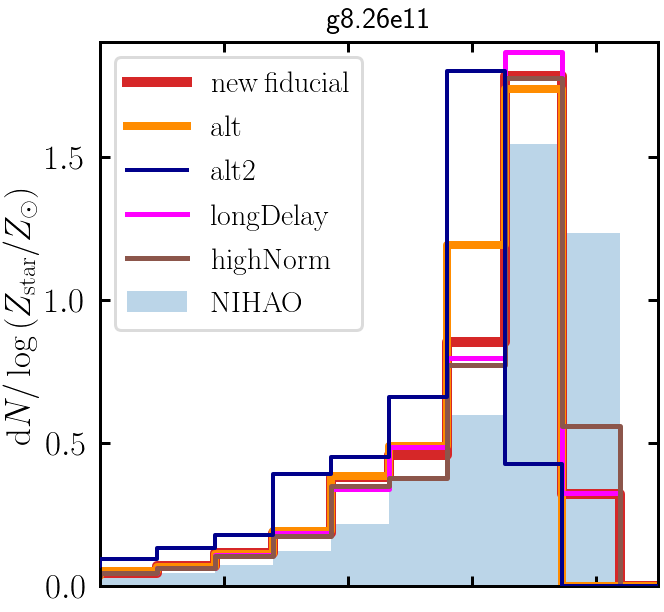

In [237]:
# total metallicity
cmap = plt.get_cmap("tab10")
plt.figure(figsize=(10,10))
plt.bar(mdf_g826e11_fid['zhist'][1][:-1], mdf_g826e11_fid['zhist'][0], width=.2335, align='edge', color=cmap(0), edgecolor='none', alpha=.3, label=r'$\rm{NIHAO}$')

plt.step(mdf_g826e11['zhist'][1][:-1], mdf_g826e11['zhist'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt2['zhist'][1][:-1], mdf_g826e11_alt2['zhist'][0], where='post', lw=8, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_g826e11_alt3['zhist'][1][:-1], mdf_g826e11_alt3['zhist'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_g826e11_long_delay_2['zhist'][1][:-1], mdf_g826e11_long_delay_2['zhist'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')
plt.step(mdf_g826e11_high_Ia['zhist'][1][:-1], mdf_g826e11_high_Ia['zhist'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')


#plt.xlabel(r'$\log\left(Z_{\rm star}/Z_{\odot}\right)$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'${\rm{d}}N/\log\left(Z_{\rm star}/Z_{\odot}\right)$')
plt.xlim((-1.5,.75))
plt.ylim((0,1.9))
plt.legend(loc=0, fontsize=30)
plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_zhist.pdf', bbox_inches='tight')

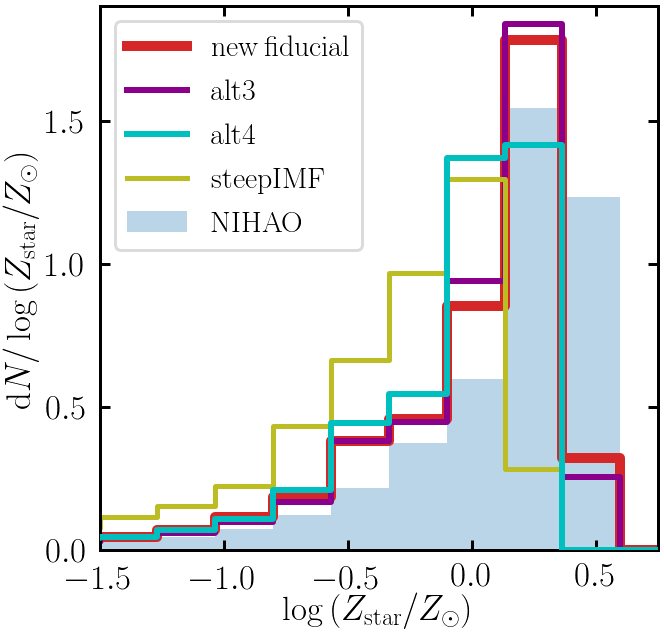

In [236]:
# total metallicity
plt.figure(figsize=(10,10))
plt.bar(mdf_g826e11_fid['zhist'][1][:-1], mdf_g826e11_fid['zhist'][0], width=.2335, align='edge', color=cmap(0), edgecolor='none', alpha=.3, label=r'$\rm{NIHAO}$')


plt.step(mdf_g826e11['zhist'][1][:-1], mdf_g826e11['zhist'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))
plt.step(mdf_g826e11_alt4['zhist'][1][:-1], mdf_g826e11_alt4['zhist'][0], where='post', lw=6, label=r'$\rm{alt3}$', color='darkmagenta')

plt.step(mdf_g826e11_alt['zhist'][1][:-1], mdf_g826e11_alt['zhist'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_g826e11_steep_IMF['zhist'][1][:-1], mdf_g826e11_steep_IMF['zhist'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))
#plt.step(mdf_g826e11_high_Ia['zhist'][1][:-1], mdf_g826e11_high_Ia['zhist'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')


#plt.step(mdf_g826e11_long_delay['zhist'][1][:-1], mdf_g826e11_long_delay['zhist'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')


plt.xlabel(r'$\log\left(Z_{\rm star}/Z_{\odot}\right)$')
plt.ylabel(r'${\rm{d}}N/\log\left(Z_{\rm star}/Z_{\odot}\right)$')
plt.xlim((-1.5,.75))
plt.ylim((0,1.9))
plt.legend(loc=0, fontsize=30)

plt.savefig('./paper_plots/g826e11_zhist2.pdf', bbox_inches='tight')

#### iron abundance

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':


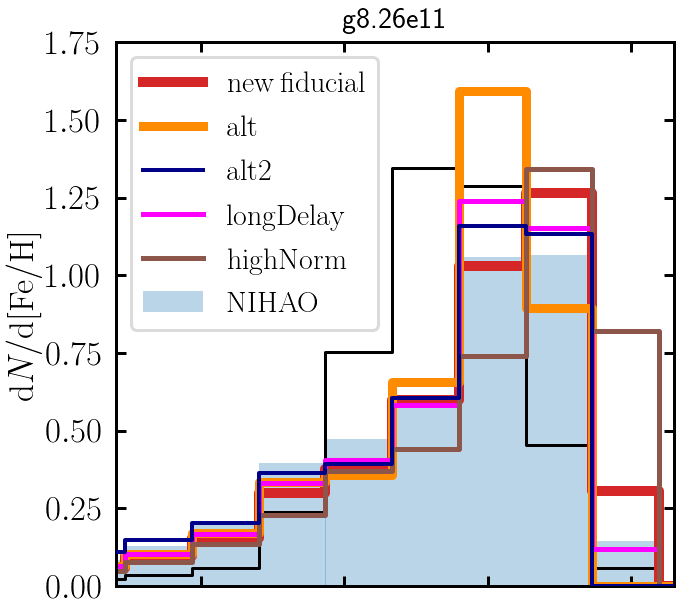

In [249]:
# [Fe/H]
plt.figure(figsize=(10,10))
#plt.plot([-2.27,-2.27],[0,1.9],c='k',lw=2,ls='dotted')
#plt.plot([-1.37,-1.37],[0,1.9],c='k',lw=2,ls='dotted',label=r'$\rm{Kirby\!+\!2019}$')

plt.bar(mdf_g826e11_fid['feh'][1][:-1], mdf_g826e11_fid['feh'][0], width=.234, align='edge', color=cmap(0), edgecolor='none', alpha=0.3, label=r'$\rm{NIHAO}$')

#hist, xe = np.histogram(hdul[1].data['__Fe_H_'], normed=True, range=(-5,2), bins=30)
#plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
#plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

hist, xe = np.histogram(dr3[select_fe]['fe_h'], normed=True, range=(-5,2), bins=30)
#plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2)#, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['feh'][1][:-1], mdf_g826e11['feh'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt2['feh'][1][:-1], mdf_g826e11_alt2['feh'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_g826e11_alt3['feh'][1][:-1], mdf_g826e11_alt3['feh'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)
#plt.step(mdf_g826e11_alt4['feh'][1][:-1], mdf_g826e11_alt4['feh'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')

#plt.step(mdf_g826e11_alt4['feh'][1][:-1], mdf_g826e11_alt4['feh'][0], where='post', lw=6, label=r'$\rm{alt3}$', color='darkmagenta')

plt.step(mdf_g826e11_long_delay_2['feh'][1][:-1], mdf_g826e11_long_delay_2['feh'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')
plt.step(mdf_g826e11_high_Ia['feh'][1][:-1], mdf_g826e11_high_Ia['feh'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')

#plt.xlabel(r'$\rm{[Fe/H]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'${\rm{d}}N/\rm{d[Fe/H]}$')
plt.xlim((-1.3,.65))
plt.ylim((0,1.75))
plt.legend(loc=2, fontsize=30)
plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_Fehist.pdf', bbox_inches='tight')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # This is added back by InteractiveShellApp.init_path()


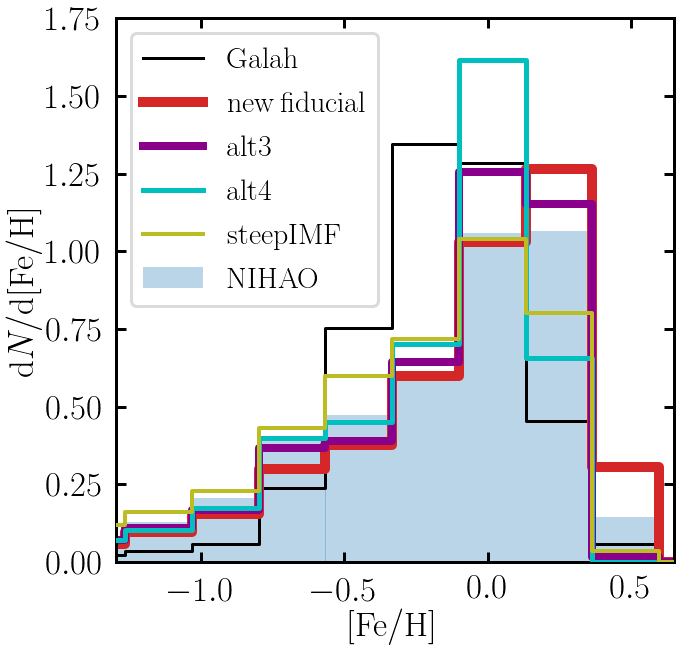

In [250]:
# [Fe/H]
plt.figure(figsize=(10,10))
#plt.plot([-2.27,-2.27],[0,1.9],c='k',lw=2,ls='dotted')
#plt.plot([-1.37,-1.37],[0,1.9],c='k',lw=2,ls='dotted',label=r'$\rm{Kirby\!+\!2019}$')

plt.bar(mdf_g826e11_fid['feh'][1][:-1], mdf_g826e11_fid['feh'][0], width=.234, align='edge', color=cmap(0), edgecolor='none', alpha=0.3, label=r'$\rm{NIHAO}$')

#hist, xe = np.histogram(hdul[1].data['__Fe_H_'], normed=True, range=(-5,2), bins=30)
#plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=10, label=r'$\rm{Galah}$')

hist, xe = np.histogram(dr3[select_fe]['fe_h'], normed=True, range=(-5,2), bins=30)
#plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')


plt.step(mdf_g826e11['feh'][1][:-1], mdf_g826e11['feh'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt4['feh'][1][:-1], mdf_g826e11_alt4['feh'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_g826e11_alt['feh'][1][:-1], mdf_g826e11_alt['feh'][0], where='post', lw=5, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_g826e11_steep_IMF['feh'][1][:-1], mdf_g826e11_steep_IMF['feh'][0], where='post', lw=4, label=r'$\rm{steepIMF}$', color='tab:olive', zorder=6)#cmap(5))


plt.xlabel(r'$\rm{[Fe/H]}$')
plt.ylabel(r'${\rm{d}}N/\rm{d[Fe/H]}$')
plt.xlim((-1.3,.65))
plt.ylim((0,1.75))
plt.legend(loc=2, fontsize=30)
#plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_Fehist2.pdf', bbox_inches='tight')

#### oxygen abundance

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


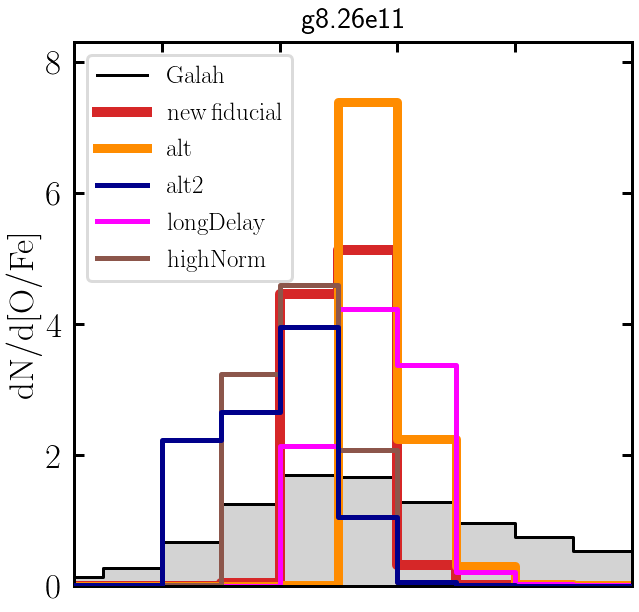

In [170]:
# [O/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_g826e11_fid['ofe'][1][:-1], mdf_g826e11_fid['ofe'][0], width=.095, align='edge', color='lightgray', edgecolor='lightgray', label=r'$\rm{NIHAO}$')

hist, xe = np.histogram(dr3[select_o_fe]['o_fe'], normed=True, range=(-1,1), bins=20)
#hist, xe = np.histogram(hdul[1].data['__alpha_Fe_'], normed=True, range=(-1,1), bins=20)

plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['ofe'][1][:-1], mdf_g826e11['ofe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt2['ofe'][1][:-1], mdf_g826e11_alt2['ofe'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_g826e11_alt3['ofe'][1][:-1], mdf_g826e11_alt3['ofe'][0], where='post', lw=5, label=r'$\rm{alt2}$', color='darkblue',zorder=5)


plt.step(mdf_g826e11_long_delay_2['ofe'][1][:-1], mdf_g826e11_long_delay_2['ofe'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')
plt.step(mdf_g826e11_high_Ia['ofe'][1][:-1], mdf_g826e11_high_Ia['ofe'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')

#plt.xlabel(r'$\rm{[O/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[O/Fe]}$')
plt.legend(loc=2,fontsize=25)
plt.xlim((-.35,.6))
plt.ylim((0,8.3))
plt.legend(loc=2, fontsize=25)
plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_Ohist.pdf', bbox_inches='tight')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


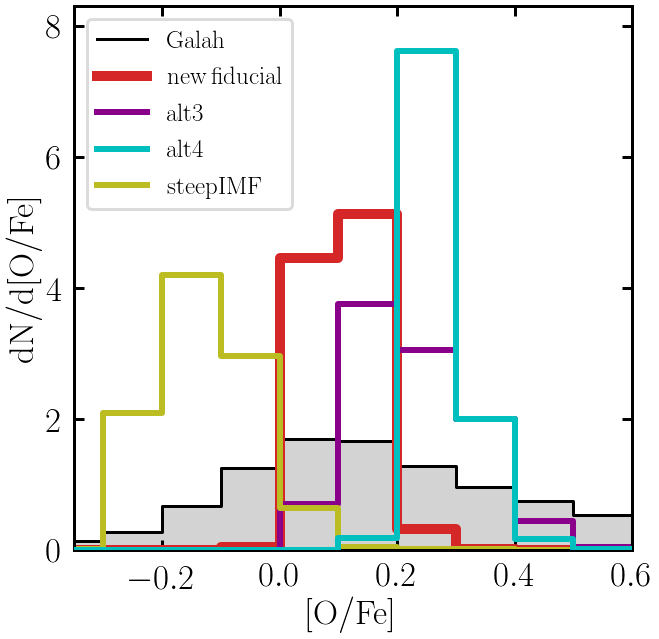

In [172]:
# [O/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_g826e11_fid['ofe'][1][:-1], mdf_g826e11_fid['ofe'][0], width=.095, align='edge', color='lightgray', edgecolor='lightgray', label=r'$\rm{NIHAO}$')

hist, xe = np.histogram(dr3[select_o_fe]['o_fe'], normed=True, range=(-1,1), bins=20)
plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['ofe'][1][:-1], mdf_g826e11['ofe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt4['ofe'][1][:-1], mdf_g826e11_alt4['ofe'][0], where='post', lw=6, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_g826e11_alt['ofe'][1][:-1], mdf_g826e11_alt['ofe'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

#plt.step(mdf_g826e11_alt4['ofe'][1][:-1], mdf_g826e11_alt4['ofe'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')

plt.step(mdf_g826e11_steep_IMF['ofe'][1][:-1], mdf_g826e11_steep_IMF['ofe'][0], where='post', lw=6, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))
#plt.step(mdf_g826e11_long_delay['ofe'][1][:-1], mdf_g826e11_long_delay['ofe'][0], where='post', lw=8, label=r'$\rm{longDelay}$',color='magenta')

plt.xlabel(r'$\rm{[O/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[O/Fe]}$')
plt.legend(loc=2,ncol=1,fontsize=25)
plt.xlim((-.35,.6))
plt.ylim((0,8.3))
plt.savefig('./paper_plots/g826e11_Ohist2.pdf', bbox_inches='tight')

#### carbon abundance

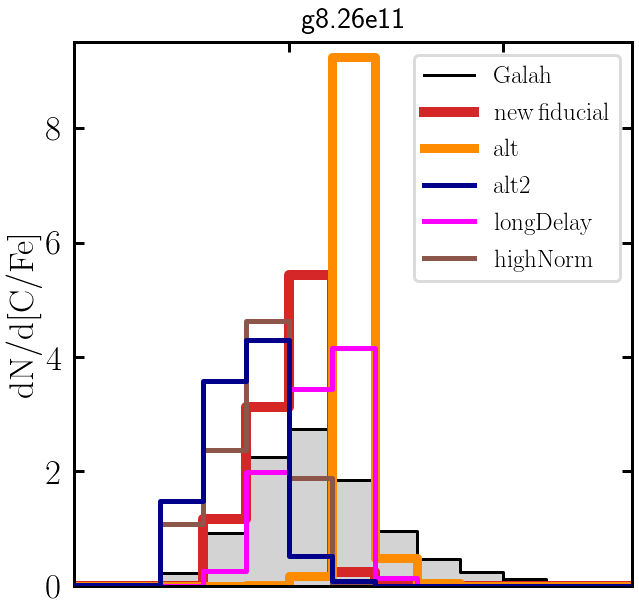

In [467]:
# [C/Fe]
plt.figure(figsize=(10,10))

hist, xe = np.histogram(dr3[select_c_fe]['c_fe'], normed=True, range=(-1,1), bins=20)
#hist, xe = np.histogram(hdul[1].data['__alpha_Fe_'], normed=True, range=(-1,1), bins=20)

plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['cfe'][1][:-1], mdf_g826e11['cfe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt2['cfe'][1][:-1], mdf_g826e11_alt2['cfe'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_g826e11_alt3['cfe'][1][:-1], mdf_g826e11_alt3['cfe'][0], where='post', lw=5, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_g826e11_long_delay_2['cfe'][1][:-1], mdf_g826e11_long_delay_2['cfe'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')
plt.step(mdf_g826e11_high_Ia['cfe'][1][:-1], mdf_g826e11_high_Ia['cfe'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')

ax= plt.gca()
ax.set_xticklabels([])
#plt.xlabel(r'$\rm{[C/Fe]}$')
#ax= plt.gca()
#ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[C/Fe]}$')
#plt.legend(loc=2,fontsize=25)
plt.xlim((-.5,.8))
plt.ylim((0,9.5))
plt.legend(loc=1, fontsize=25)
plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_Chist.pdf', bbox_inches='tight')

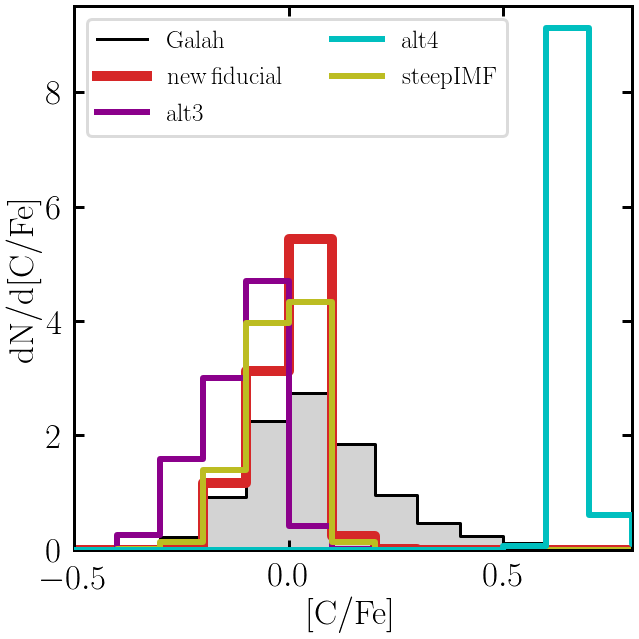

In [465]:
# [C/Fe]
plt.figure(figsize=(10,10))

hist, xe = np.histogram(dr3[select_c_fe]['c_fe'], normed=True, range=(-1,1), bins=20)
plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['cfe'][1][:-1], mdf_g826e11['cfe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt4['cfe'][1][:-1], mdf_g826e11_alt4['cfe'][0], where='post', lw=6, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_g826e11_alt['cfe'][1][:-1], mdf_g826e11_alt['cfe'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_g826e11_steep_IMF['cfe'][1][:-1], mdf_g826e11_steep_IMF['cfe'][0], where='post', lw=6, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))

plt.xlabel(r'$\rm{[C/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[C/Fe]}$')
plt.legend(loc=2,ncol=2,fontsize=25)
plt.xlim((-.5,.8))
plt.ylim((0,9.5))
#plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_Chist2.pdf', bbox_inches='tight')

#### manganese abundance

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


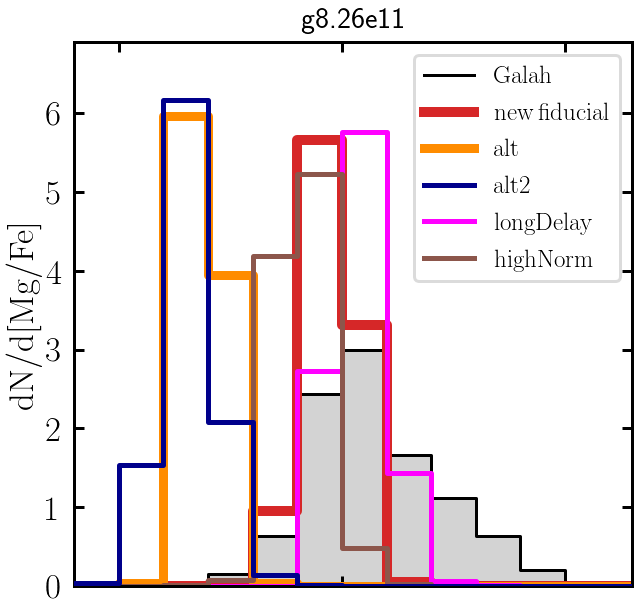

In [180]:
# [Mg/Fe]
plt.figure(figsize=(10,10))

hist, xe = np.histogram(dr3[select_mg_fe]['mg_fe'], normed=True, range=(-1,1), bins=20)
#hist, xe = np.histogram(hdul[1].data['__alpha_Fe_'], normed=True, range=(-1,1), bins=20)

plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['mgfe'][1][:-1], mdf_g826e11['mgfe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt2['mgfe'][1][:-1], mdf_g826e11_alt2['mgfe'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_g826e11_alt3['mgfe'][1][:-1], mdf_g826e11_alt3['mgfe'][0], where='post', lw=5, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_g826e11_long_delay_2['mgfe'][1][:-1], mdf_g826e11_long_delay_2['mgfe'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')
plt.step(mdf_g826e11_high_Ia['mgfe'][1][:-1], mdf_g826e11_high_Ia['mgfe'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')


#plt.xlabel(r'$\rm{[Mg/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[Mg/Fe]}$')
plt.legend(loc=1,fontsize=25)

plt.xticks([-1,-0.5,0,0.5,1,1.5])
plt.ylim((0,6.9))
plt.xlim((-.6,.65))
#plt.legend(loc=1, fontsize=25)
plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_Mghist.pdf', bbox_inches='tight')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


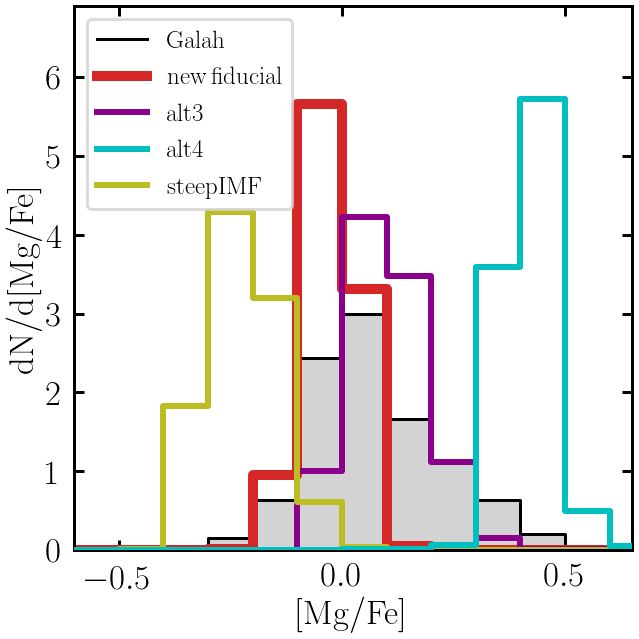

In [179]:
# [Mg/Fe]
plt.figure(figsize=(10,10))

hist, xe = np.histogram(dr3[select_mg_fe]['mg_fe'], normed=True, range=(-1,1), bins=20)
plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['mgfe'][1][:-1], mdf_g826e11['mgfe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt4['mgfe'][1][:-1], mdf_g826e11_alt4['mgfe'][0], where='post', lw=6, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_g826e11_alt['mgfe'][1][:-1], mdf_g826e11_alt['mgfe'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_g826e11_steep_IMF['mgfe'][1][:-1], mdf_g826e11_steep_IMF['mgfe'][0], where='post', lw=6, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))


plt.xlabel(r'$\rm{[Mg/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[Mg/Fe]}$')
plt.legend(loc=2,ncol=1,fontsize=25)

plt.xticks([-1,-0.5,0,0.5,1,1.5])
plt.ylim((0,6.9))
plt.xlim((-.6,.65))
plt.savefig('./paper_plots/g826e11_Mghist2.pdf', bbox_inches='tight')

#### silicon abundance

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


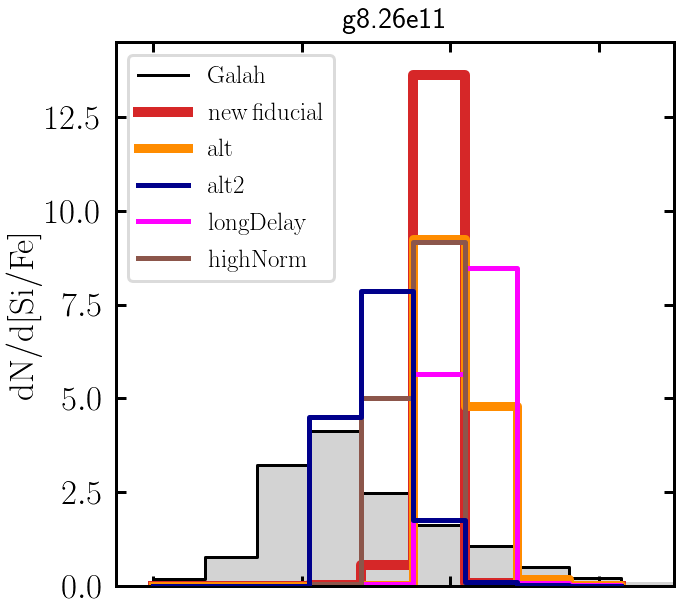

In [186]:
# [Si/Fe]
plt.figure(figsize=(10,10))

hist, xe = np.histogram(dr3[select_si_fe]['si_fe'], normed=True, range=(-.2,.5), bins=10)
plt.bar(xe[:-1], hist, width=.07, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['sife'][1][:-1], mdf_g826e11['sife'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt2['sife'][1][:-1], mdf_g826e11_alt2['sife'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_g826e11_alt3['sife'][1][:-1], mdf_g826e11_alt3['sife'][0], where='post', lw=5, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_g826e11_long_delay_2['sife'][1][:-1], mdf_g826e11_long_delay_2['sife'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')
plt.step(mdf_g826e11_high_Ia['sife'][1][:-1], mdf_g826e11_high_Ia['sife'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')


#plt.xlabel(r'$\rm{[Si/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[Si/Fe]}$')
plt.legend(loc=2,fontsize=25)

plt.xlim((-.25,.5))
plt.ylim((0,14.5))

plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_Sihist.pdf', bbox_inches='tight')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


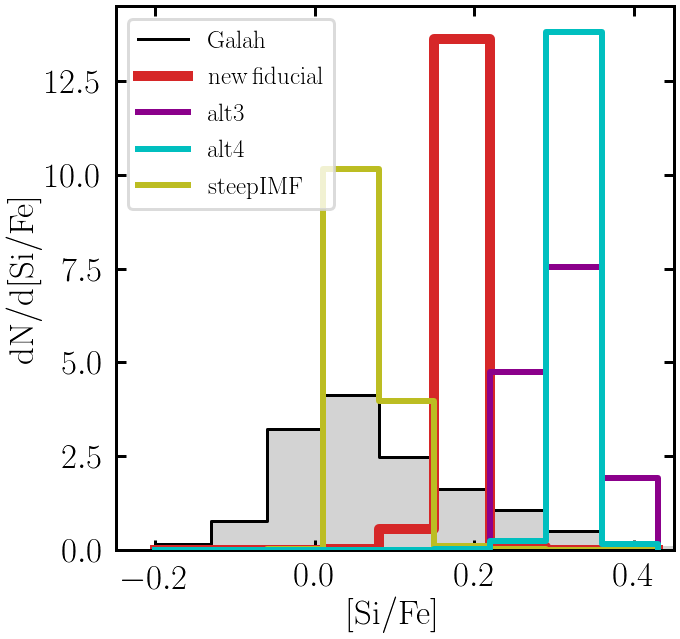

In [185]:
# [Si/Fe]
plt.figure(figsize=(10,10))

hist, xe = np.histogram(dr3[select_si_fe]['si_fe'], normed=True, range=(-.2,.5), bins=10)
plt.bar(xe[:-1], hist, width=.07, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['sife'][1][:-1], mdf_g826e11['sife'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt4['sife'][1][:-1], mdf_g826e11_alt4['sife'][0], where='post', lw=6, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_g826e11_alt['sife'][1][:-1], mdf_g826e11_alt['sife'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_g826e11_steep_IMF['sife'][1][:-1], mdf_g826e11_steep_IMF['sife'][0], where='post', lw=6, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))

plt.xlabel(r'$\rm{[Si/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[Si/Fe]}$')
plt.legend(loc=2,ncol=1,fontsize=25)

plt.xlim((-.25,.45))
plt.ylim((0,14.5))

plt.savefig('./paper_plots/g826e11_Sihist2.pdf', bbox_inches='tight')

#### sulfur abundance

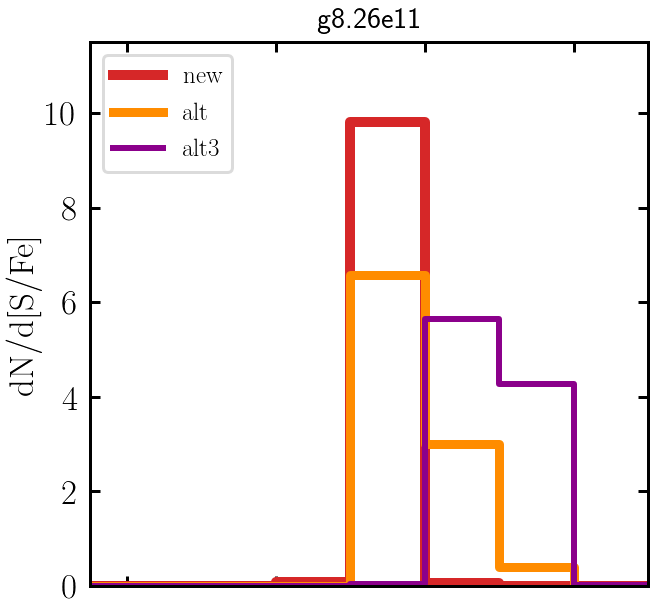

In [148]:
# [S/Fe]
plt.figure(figsize=(10,10))

plt.step(mdf_g826e11['sfe'][1][:-1], mdf_g826e11['sfe'][0], where='post', lw=10, label=r'$\rm{new}$', color=cmap(3))

plt.step(mdf_g826e11_alt2['sfe'][1][:-1], mdf_g826e11_alt2['sfe'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_g826e11_alt4['sfe'][1][:-1], mdf_g826e11_alt4['sfe'][0], where='post', lw=6, label=r'$\rm{alt3}$', color='darkmagenta')


#plt.step(mdf_g826e11_alt['sfe'][1][:-1], mdf_g826e11_alt['sfe'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

#plt.xlabel(r'$\rm{[Si/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[S/Fe]}$')
plt.legend(loc=2,fontsize=25)

plt.xlim((-.25,.5))
plt.ylim((0,11.5))

plt.title(r'g8.26e11', fontsize=30, pad=15)
plt.savefig('./paper_plots/g826e11_Shist.pdf', bbox_inches='tight')

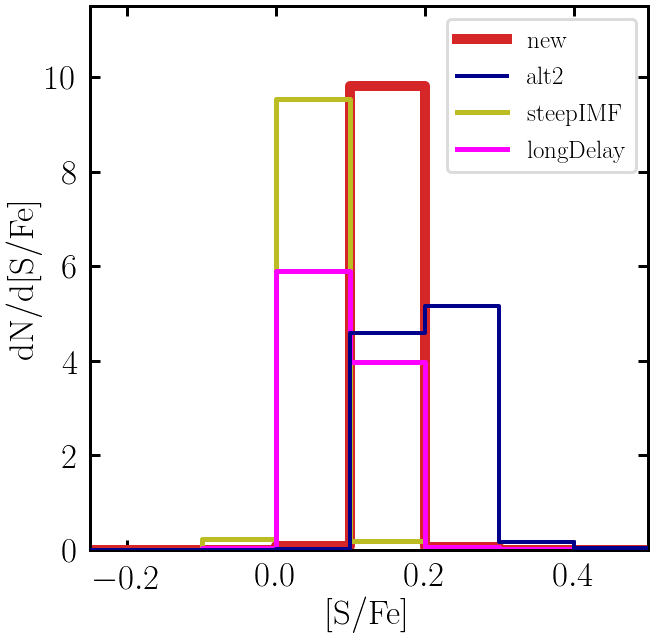

In [149]:
# [S/Fe]
plt.figure(figsize=(10,10))

plt.step(mdf_g826e11['sfe'][1][:-1], mdf_g826e11['sfe'][0], where='post', lw=10, label=r'$\rm{new}$', color=cmap(3))

plt.step(mdf_g826e11_alt3['sfe'][1][:-1], mdf_g826e11_alt3['sfe'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)
#plt.step(mdf_g826e11_alt4['sfe'][1][:-1], mdf_g826e11_alt4['sfe'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')

plt.step(mdf_g826e11_steep_IMF['sfe'][1][:-1], mdf_g826e11_steep_IMF['sfe'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))
plt.step(mdf_g826e11_long_delay['sfe'][1][:-1], mdf_g826e11_long_delay['sfe'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')

plt.xlabel(r'$\rm{[S/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[S/Fe]}$')
plt.legend(loc=1,ncol=1,fontsize=25)

plt.xlim((-.25,.5))
plt.ylim((0,11.5))

plt.savefig('./paper_plots/g826e11_Shist2.pdf', bbox_inches='tight')

#### alpha abundance

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


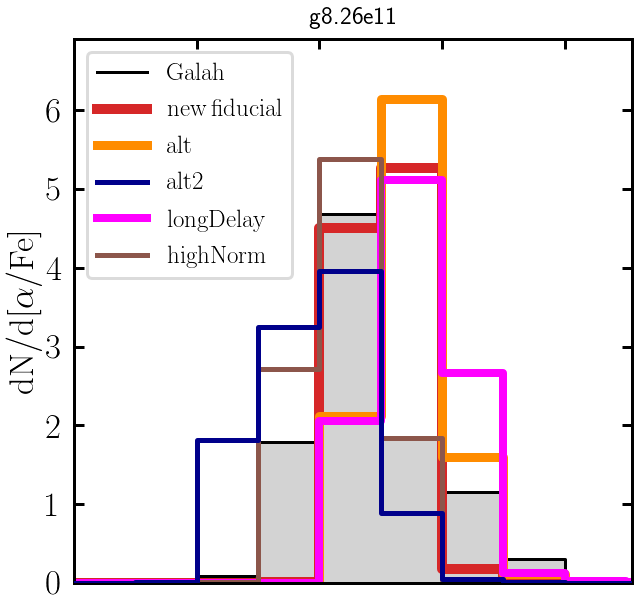

In [187]:
# [alpha/Fe]
plt.figure(figsize=(10,10))
#plt.fill_between([0.07,0.27],[0,0],[6.65,6.65], color='lightgray',label=r'$\rm{Kirby\!+\!2019}$')
hist, xe = np.histogram(dr3[select_alpha]['alpha_fe'], normed=True, range=(-1,1), bins=20)
#hist, xe = np.histogram(hdul[1].data['__alpha_Fe_'], normed=True, range=(-1,1), bins=20)

plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')

plt.step(mdf_g826e11['alpha'][1][:-1], mdf_g826e11['alpha'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt2['alpha'][1][:-1], mdf_g826e11_alt2['alpha'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_g826e11_alt3['alpha'][1][:-1], mdf_g826e11_alt3['alpha'][0], where='post', lw=5, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_g826e11_long_delay_2['alpha'][1][:-1], mdf_g826e11_long_delay_2['alpha'][0], where='post', lw=8, label=r'$\rm{longDelay}$',color='magenta')
plt.step(mdf_g826e11_high_Ia['alpha'][1][:-1], mdf_g826e11_high_Ia['alpha'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')


#plt.xlabel(r'$\rm{[\alpha/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[\alpha/Fe]}$')
#plt.legend(loc=0, fontsize=25)
#plt.xlim((-.75,.75))
plt.xlim((-.4,.51))
plt.ylim((0,6.9))
plt.legend(loc=2, fontsize=25)
plt.title(r'g8.26e11', fontsize=25, pad=15)
plt.savefig('./paper_plots/g826e11_alphahist.pdf', bbox_inches='tight')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


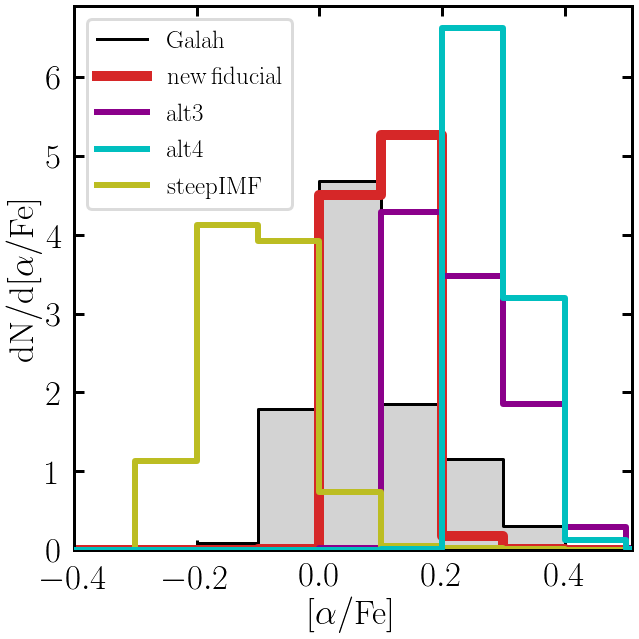

In [154]:
# [alpha/Fe]
plt.figure(figsize=(10,10))
#plt.fill_between([0.07,0.27],[0,0],[6.65,6.65], color='lightgray',label=r'$\rm{Kirby\!+\!2019}$')
hist, xe = np.histogram(dr3[select_alpha]['alpha_fe'], normed=True, range=(-1,1), bins=20)
#hist, xe = np.histogram(hdul[1].data['__alpha_Fe_'], normed=True, range=(-1,1), bins=20)

plt.bar(xe[:-1], hist, width=.095, align='edge', color='lightgray', edgecolor='lightgray')
plt.step(xe[:-1], hist, where='post', color='k', lw=3, zorder=2, label=r'$\rm{Galah}$')


plt.step(mdf_g826e11['alpha'][1][:-1], mdf_g826e11['alpha'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_g826e11_alt4['alpha'][1][:-1], mdf_g826e11_alt4['alpha'][0], where='post', lw=6, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_g826e11_alt['alpha'][1][:-1], mdf_g826e11_alt['alpha'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_g826e11_steep_IMF['alpha'][1][:-1], mdf_g826e11_steep_IMF['alpha'][0], where='post', lw=6, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))

plt.xlabel(r'$\rm{[\alpha/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[\alpha/Fe]}$')
plt.legend(loc=2, ncol=1, fontsize=25)
plt.xlim((-.4,.51))
plt.ylim((0,6.9))
plt.savefig('./paper_plots/g826e11_alphahist2.pdf', bbox_inches='tight')

### g2.83e10

#### total metallicity

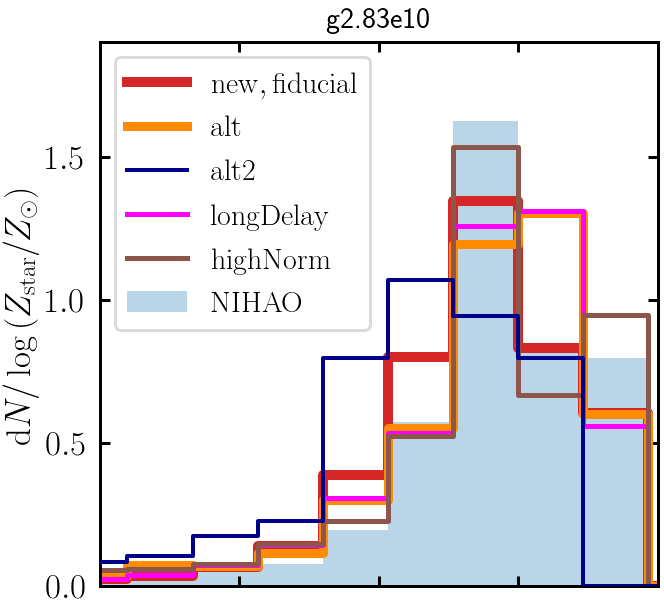

In [108]:
# total metallicity
plt.figure(figsize=(10,10))
plt.bar(mdf_fid['zhist'][1][:-1], mdf_fid['zhist'][0], width=.2335, align='edge', color=cmap(0), edgecolor='none', alpha=.3, label=r'$\rm{NIHAO}$')

plt.step(mdf['zhist'][1][:-1], mdf['zhist'][0], where='post', lw=10, label=r'$\rm{new, fiducial}$', color=cmap(3))

plt.step(mdf_alt2['zhist'][1][:-1], mdf_alt2['zhist'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_alt3['zhist'][1][:-1], mdf_alt3['zhist'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_long_delay_2['zhist'][1][:-1], mdf_long_delay_2['zhist'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))
plt.step(mdf_high_Ia['zhist'][1][:-1], mdf_high_Ia['zhist'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')#cmap(5))



#plt.step(mdf_alt4['zhist'][1][:-1], mdf_alt4['zhist'][0], where='post', lw=8, label='alt3', color='darkmagenta')

#plt.step(mdf_steep_IMF['feh'][1][:-1], mdf_steep_IMF['feh'][0], where='post', lw=4, label='steepIMF',color='magenta')#cmap(5))

#plt.xlabel(r'$\log\left(Z_{\rm star}/Z_{\odot}\right)$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'${\rm{d}}N/\log\left(Z_{\rm star}/Z_{\odot}\right)$')
plt.xlim((-3.,-1.))
plt.ylim((0,1.9))
plt.legend(loc=0, fontsize=30)
plt.title(r'g2.83e10', fontsize=30, pad=15)
plt.savefig('./paper_plots/g283e10_zhist.pdf', bbox_inches='tight')

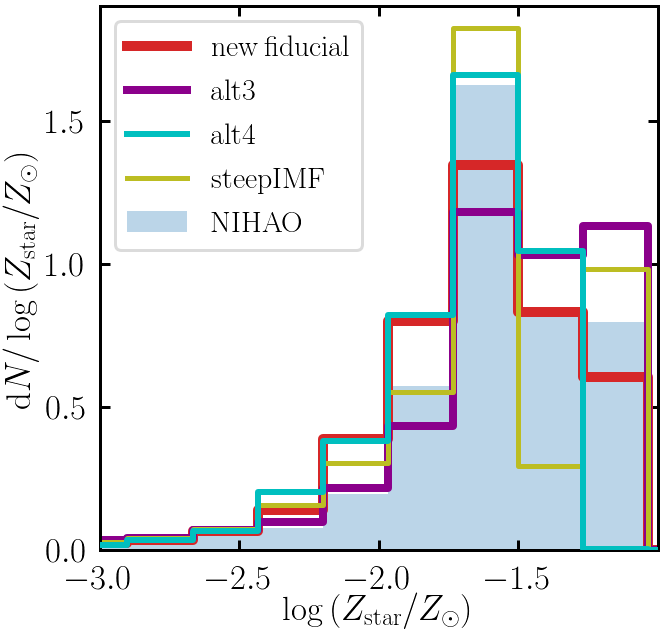

In [500]:
# total metallicity
plt.figure(figsize=(10,10))
plt.bar(mdf_fid['zhist'][1][:-1], mdf_fid['zhist'][0], width=.2335, align='edge', color=cmap(0), edgecolor='none', alpha=.3, label=r'$\rm{NIHAO}$')


plt.step(mdf['zhist'][1][:-1], mdf['zhist'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

#plt.step(mdf_alt2['zhist'][1][:-1], mdf_alt2['zhist'][0], where='post', lw=8, label='alt', color='darkorange')
#plt.step(mdf_alt['zhist'][1][:-1], mdf_alt['zhist'][0], where='post', lw=6, label='alt4', color='c',zorder=4)
plt.step(mdf_alt4['zhist'][1][:-1], mdf_alt4['zhist'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_alt['zhist'][1][:-1], mdf_alt['zhist'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)


#plt.step(mdf_low_fb['zhist'][1][:-1], mdf_low_fb['zhist'][0], where='post', lw=5, label=r'$\rm{low\, fb}$',color='tab:brown')#cmap(4))

plt.step(mdf_steep_IMF['zhist'][1][:-1], mdf_steep_IMF['zhist'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))


plt.xlabel(r'$\log\left(Z_{\rm star}/Z_{\odot}\right)$')
plt.ylabel(r'${\rm{d}}N/\log\left(Z_{\rm star}/Z_{\odot}\right)$')
plt.xticks([-3,-2.5,-2,-1.5])
plt.xlim((-3.,-1.))
plt.ylim((0,1.9))
plt.legend(loc=0, fontsize=30)

plt.savefig('./paper_plots/g283e10_zhist2.pdf', bbox_inches='tight')

#### iron abundance

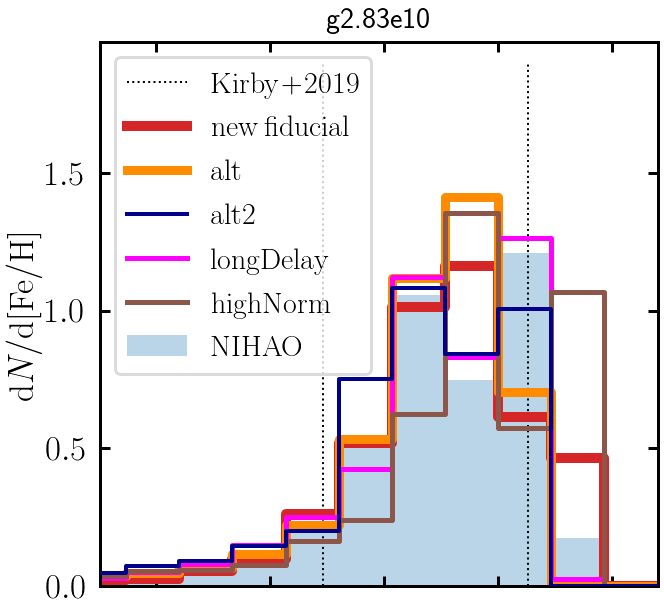

In [100]:
# [Fe/H]
plt.figure(figsize=(10,10))
plt.plot([-2.27,-2.27],[0,1.9],c='k',lw=2,ls='dotted')
plt.plot([-1.37,-1.37],[0,1.9],c='k',lw=2,ls='dotted',label=r'$\rm{Kirby\!+\!2019}$')

plt.bar(mdf_fid['feh'][1][:-1], mdf_fid['feh'][0], width=.2333, align='edge', color=cmap(0), edgecolor='none', alpha=.3, label=r'$\rm{NIHAO}$')

plt.step(mdf['feh'][1][:-1], mdf['feh'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt2['feh'][1][:-1], mdf_alt2['feh'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
#plt.step(mdf_alt4['feh'][1][:-1], mdf_alt4['feh'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')

plt.step(mdf_alt3['feh'][1][:-1], mdf_alt3['feh'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)
#plt.step(mdf_alt['feh'][1][:-1], mdf_alt['feh'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

#plt.step(mdf_steep_IMF['feh'][1][:-1], mdf_steep_IMF['feh'][0], where='post', lw=4, label='steepIMF',color='magenta')#cmap(5))
plt.step(mdf_long_delay_2['feh'][1][:-1], mdf_long_delay_2['feh'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))
plt.step(mdf_high_Ia['feh'][1][:-1], mdf_high_Ia['feh'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')#cmap(5))



#plt.xlabel(r'$\rm{[Fe/H]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'${\rm{d}}N/\rm{d[Fe/H]}$')
plt.xlim((-3.25,-0.8))
plt.ylim((0,1.975))
plt.legend(loc=2, fontsize=30)
plt.title(r'g2.83e10', fontsize=30, pad=15)
plt.savefig('./paper_plots/g283e10_Fehist.pdf', bbox_inches='tight')

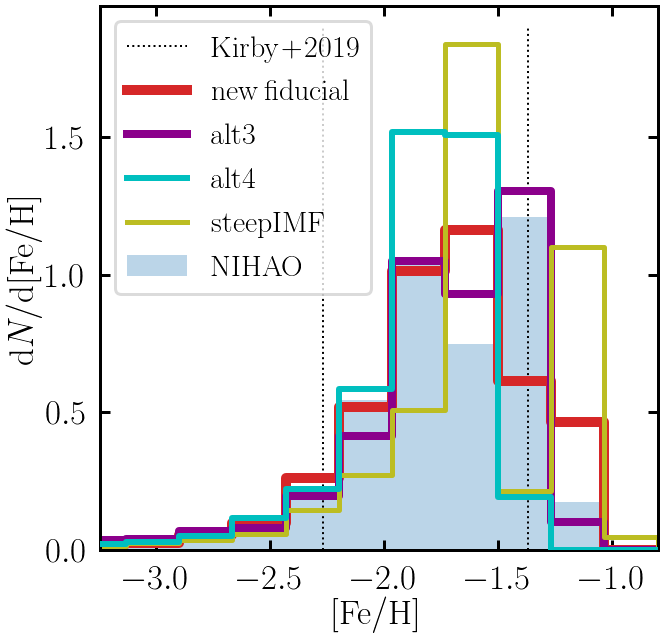

In [101]:
# [Fe/H]
plt.figure(figsize=(10,10))
plt.plot([-2.27,-2.27],[0,1.9],c='k',lw=2,ls='dotted')
plt.plot([-1.37,-1.37],[0,1.9],c='k',lw=2,ls='dotted',label=r'$\rm{Kirby\!+\!2019}$')

plt.bar(mdf_fid['feh'][1][:-1], mdf_fid['feh'][0], width=.2333, align='edge', color=cmap(0), edgecolor='none', alpha=.3, label=r'$\rm{NIHAO}$')

plt.step(mdf['feh'][1][:-1], mdf['feh'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

#plt.step(mdf_alt2['feh'][1][:-1], mdf_alt2['feh'][0], where='post', lw=8, label='alt', color='darkorange')
#plt.step(mdf_alt3['feh'][1][:-1], mdf_alt3['feh'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)
plt.step(mdf_alt4['feh'][1][:-1], mdf_alt4['feh'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_alt['feh'][1][:-1], mdf_alt['feh'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)
plt.step(mdf_steep_IMF['feh'][1][:-1], mdf_steep_IMF['feh'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))


#plt.step(mdf_low_fb['feh'][1][:-1], mdf_low_fb['feh'][0], where='post', lw=3, label=r'$\rm{low\, fb}$',color='k', zorder=-1)#cmap(4))
#plt.step(mdf_long_delay['feh'][1][:-1], mdf_long_delay['feh'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))


plt.xlabel(r'$\rm{[Fe/H]}$')
plt.ylabel(r'${\rm{d}}N/\rm{d[Fe/H]}$')
plt.xlim((-3.25,-0.8))
plt.ylim((0,1.975))
plt.legend(loc=2, fontsize=30)
plt.savefig('./paper_plots/g283e10_Fehist2.pdf', bbox_inches='tight')

#### oxygen abundance

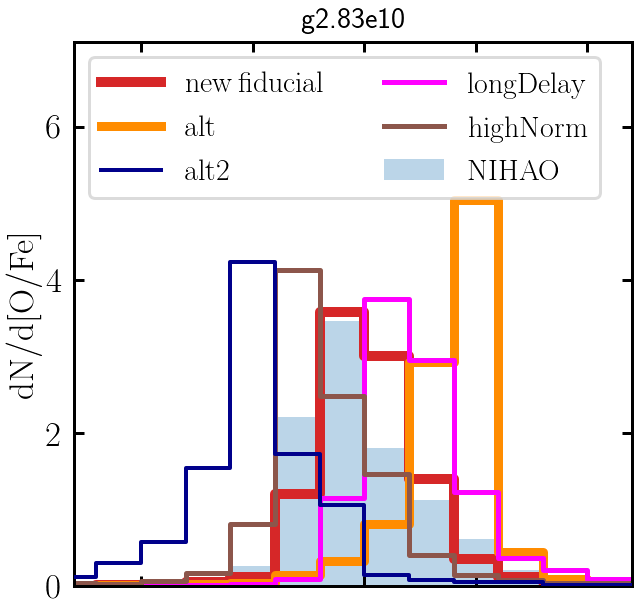

In [201]:
# [O/Fe]
plt.figure(figsize=(10,10))
plt.bar(mdf_fid['ofe'][1][:-1], mdf_fid['ofe'][0], width=.1, align='edge', color=cmap(0), edgecolor='none', alpha=0.3, label=r'$\rm{NIHAO}$')

plt.step(mdf['ofe'][1][:-1], mdf['ofe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt2['ofe'][1][:-1], mdf_alt2['ofe'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_alt3['ofe'][1][:-1], mdf_alt3['ofe'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_long_delay_2['ofe'][1][:-1], mdf_long_delay_2['ofe'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))
plt.step(mdf_high_Ia['ofe'][1][:-1], mdf_high_Ia['ofe'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')#cmap(5))

#plt.xlabel(r'$\rm{[O/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[O/Fe]}$')
plt.legend(loc=2,fontsize=25)
plt.xlim((-.65,.6))
plt.ylim((0,7.1))
plt.legend(loc=2, ncol=2, fontsize=30)
plt.title(r'g2.83e10', fontsize=30, pad=15)
plt.savefig('./paper_plots/g283e10_Ohist.pdf', bbox_inches='tight')

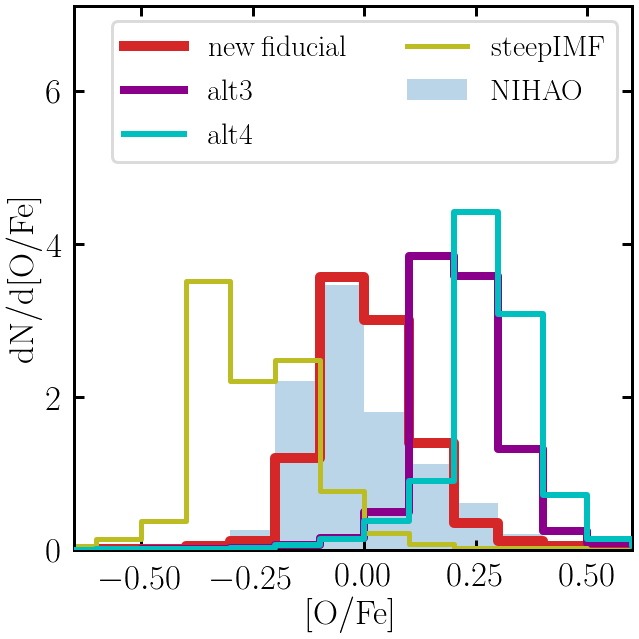

In [202]:
# [O/Fe]
plt.figure(figsize=(10,10))
plt.bar(mdf_fid['ofe'][1][:-1], mdf_fid['ofe'][0], width=.1, align='edge', color=cmap(0), edgecolor='none', alpha=0.3, label=r'$\rm{NIHAO}$')

plt.step(mdf['ofe'][1][:-1], mdf['ofe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt4['ofe'][1][:-1], mdf_alt4['ofe'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_alt['ofe'][1][:-1], mdf_alt['ofe'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

#plt.step(mdf_low_fb['ofe'][1][:-1], mdf_low_fb['ofe'][0], where='post', lw=5, label=r'$\rm{low\, fb}$',color='tab:brown')#cmap(4))
plt.step(mdf_steep_IMF['ofe'][1][:-1], mdf_steep_IMF['ofe'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))


plt.xlabel(r'$\rm{[O/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[O/Fe]}$')
plt.legend(loc=1,ncol=2,fontsize=30)
plt.xlim((-.65,.6))
plt.ylim((0,7.1))
plt.savefig('./paper_plots/g283e10_Ohist2.pdf', bbox_inches='tight')

#### carbon abundance

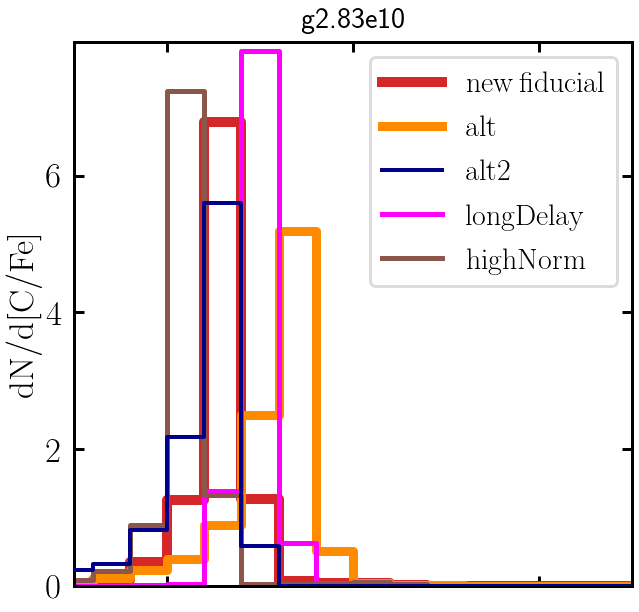

In [211]:
# [C/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_fid['cfe'][1][:-1], mdf_fid['cfe'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='fiducial')

plt.step(mdf['cfe'][1][:-1], mdf['cfe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt2['cfe'][1][:-1], mdf_alt2['cfe'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_alt3['cfe'][1][:-1], mdf_alt3['cfe'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_long_delay_2['cfe'][1][:-1], mdf_long_delay_2['cfe'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))
plt.step(mdf_high_Ia['cfe'][1][:-1], mdf_high_Ia['cfe'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')#cmap(5))


ax= plt.gca()
ax.set_xticklabels([])
#plt.xlabel(r'$\rm{[C/Fe]}$')
#ax= plt.gca()
#ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[C/Fe]}$')
#plt.legend(loc=2,fontsize=25)
plt.xlim((-.25,1.25))
plt.ylim((0,7.95))
plt.legend(loc=1, fontsize=30)
plt.title(r'g2.83e10', fontsize=30, pad=15)
plt.savefig('./paper_plots/g283e10_Chist.pdf', bbox_inches='tight')

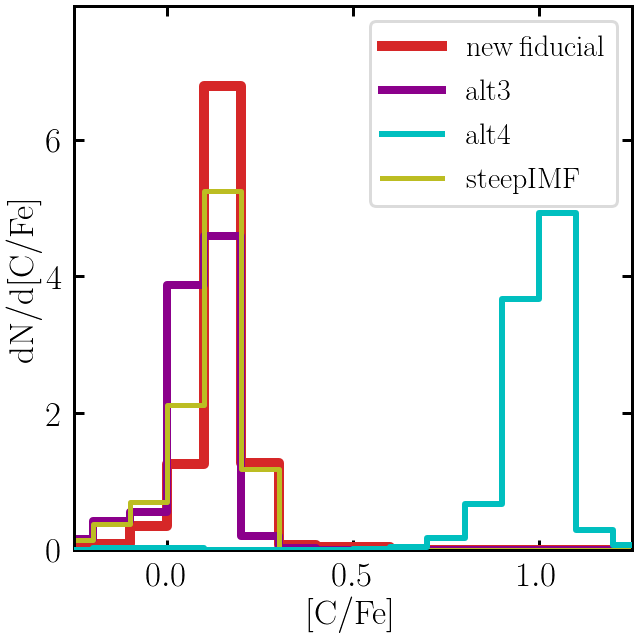

In [210]:
# [C/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_fid['cfe'][1][:-1], mdf_fid['cfe'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='fiducial')

plt.step(mdf['cfe'][1][:-1], mdf['cfe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt4['cfe'][1][:-1], mdf_alt4['cfe'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_alt['cfe'][1][:-1], mdf_alt['cfe'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_steep_IMF['cfe'][1][:-1], mdf_steep_IMF['cfe'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))



plt.xlabel(r'$\rm{[C/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[C/Fe]}$')
plt.legend(loc=1,ncol=1,fontsize=30)
plt.xlim((-.25,1.25))
plt.ylim((0,7.95))
#plt.title(r'g2.83e10', fontsize=30, pad=15)
plt.savefig('./paper_plots/g283e10_Chist2.pdf', bbox_inches='tight')

#### Manganese 

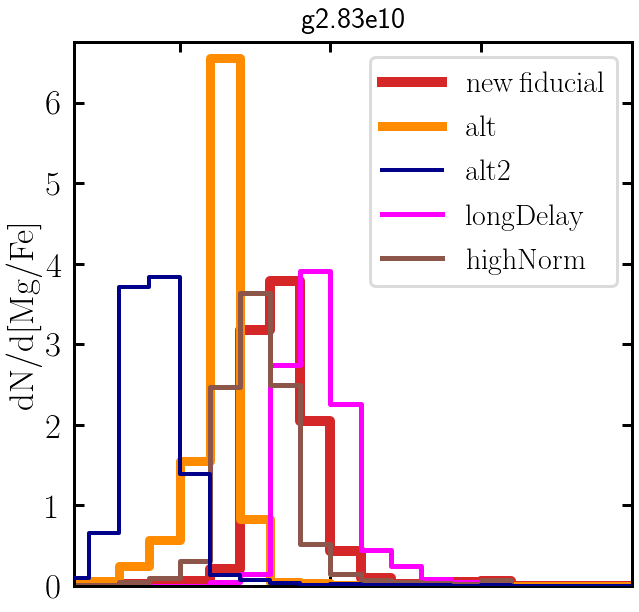

In [225]:
# [Mg/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_fid['mgfe'][1][:-1], mdf_fid['mgfe'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='fiducial')

plt.step(mdf['mgfe'][1][:-1], mdf['mgfe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt2['mgfe'][1][:-1], mdf_alt2['mgfe'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_alt3['mgfe'][1][:-1], mdf_alt3['mgfe'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_long_delay_2['mgfe'][1][:-1], mdf_long_delay_2['mgfe'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))
plt.step(mdf_high_Ia['mgfe'][1][:-1], mdf_high_Ia['mgfe'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')#cmap(5))


#plt.xlabel(r'$\rm{[Mg/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[Mg/Fe]}$')
plt.legend(loc=1,fontsize=30)
plt.xlim((-.85,1.))
plt.xticks([-0.5,0,0.5,1])
plt.ylim((0,6.75))
#plt.legend(loc=1, fontsize=25)
plt.title(r'g2.83e10', fontsize=30, pad=15)
plt.savefig('./paper_plots/g283e10_Mghist.pdf', bbox_inches='tight')

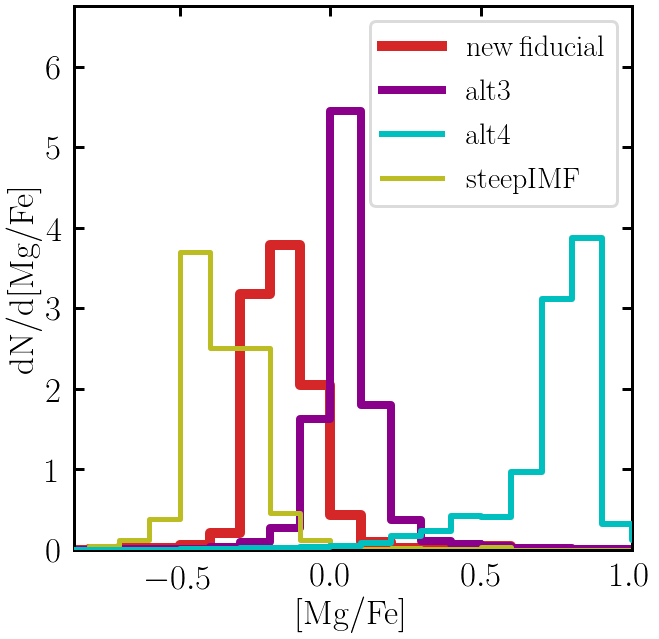

In [224]:
# [Mg/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_fid['mgfe'][1][:-1], mdf_fid['mgfe'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='fiducial')

plt.step(mdf['mgfe'][1][:-1], mdf['mgfe'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt4['mgfe'][1][:-1], mdf_alt4['mgfe'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_alt['mgfe'][1][:-1], mdf_alt['mgfe'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_steep_IMF['mgfe'][1][:-1], mdf_steep_IMF['mgfe'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))



plt.xlabel(r'$\rm{[Mg/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[Mg/Fe]}$')
plt.legend(loc=1,ncol=1,fontsize=30)
plt.xlim((-.85,1.))
plt.xticks([-0.5,0,0.5,1])
plt.ylim((0,6.75))
plt.savefig('./paper_plots/g283e10_Mghist2.pdf', bbox_inches='tight')

#### silicon

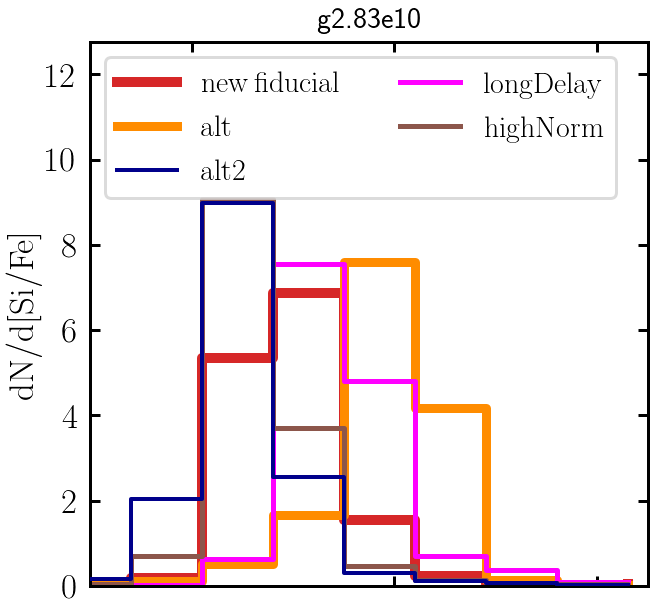

In [234]:
# [Si/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_fid['sife'][1][:-1], mdf_fid['sife'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='fiducial')

plt.step(mdf['sife'][1][:-1], mdf['sife'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt2['sife'][1][:-1], mdf_alt2['sife'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_alt3['sife'][1][:-1], mdf_alt3['sife'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_long_delay_2['sife'][1][:-1], mdf_long_delay_2['sife'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))
plt.step(mdf_high_Ia['sife'][1][:-1], mdf_high_Ia['sife'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')#cmap(5))


#plt.xlabel(r'$\rm{[Si/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[Si/Fe]}$')
plt.legend(loc=2, ncol=2, fontsize=30)

plt.xlim((-.1,.45))
plt.ylim((0,12.75))

plt.title(r'g2.83e10', fontsize=30, pad=15)
plt.savefig('./paper_plots/g283e10_Sihist.pdf', bbox_inches='tight')

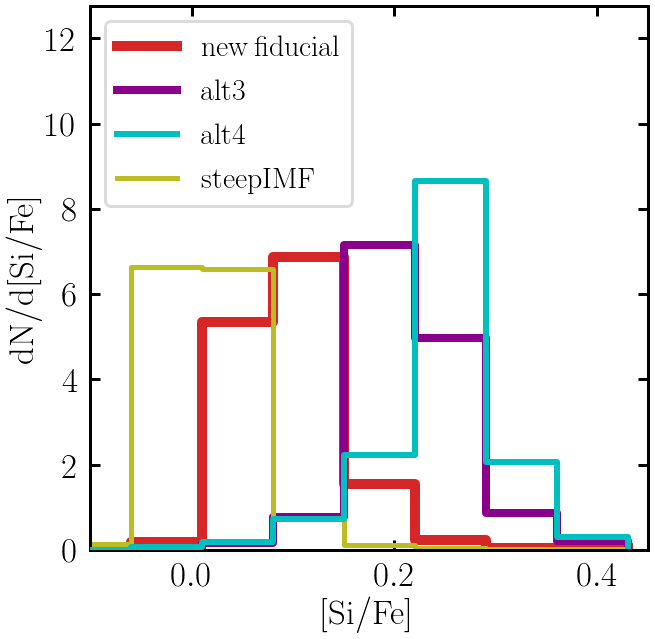

In [233]:
# [Si/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_fid['sife'][1][:-1], mdf_fid['sife'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='fiducial')
plt.step(mdf['sife'][1][:-1], mdf['sife'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt4['sife'][1][:-1], mdf_alt4['sife'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_alt['sife'][1][:-1], mdf_alt['sife'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

plt.step(mdf_steep_IMF['sife'][1][:-1], mdf_steep_IMF['sife'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))


plt.xlabel(r'$\rm{[Si/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[Si/Fe]}$')
plt.legend(loc=2,ncol=1,fontsize=30)

plt.xlim((-.1,.45))
plt.ylim((0,12.75))

plt.savefig('./paper_plots/g283e10_Sihist2.pdf', bbox_inches='tight')

#### sulfur abundance

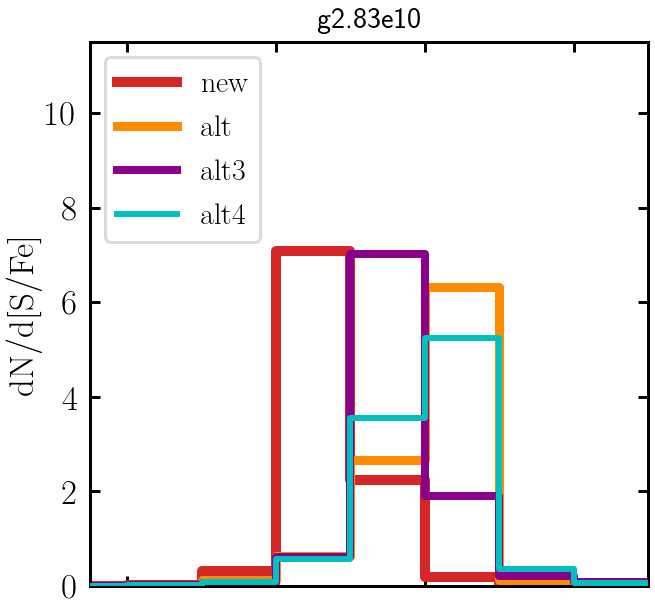

In [132]:
# [S/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_fid['sfe'][1][:-1], mdf_fid['sfe'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='fiducial')

plt.step(mdf['sfe'][1][:-1], mdf['sfe'][0], where='post', lw=10, label=r'$\rm{new}$', color=cmap(3))

plt.step(mdf_alt2['sfe'][1][:-1], mdf_alt2['sfe'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
#plt.step(mdf_alt3['sfe'][1][:-1], mdf_alt3['sfe'][0], where='post', lw=4, label='alt2', color='darkblue',zorder=5)
plt.step(mdf_alt4['sfe'][1][:-1], mdf_alt4['sfe'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_alt['sfe'][1][:-1], mdf_alt['sfe'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

#plt.step(mdf_steep_IMF['sfe'][1][:-1], mdf_steep_IMF['sfe'][0], where='post', lw=4, label='steepIMF',color='magenta')#cmap(5))

#plt.xlabel(r'$\rm{[Si/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[S/Fe]}$')
plt.legend(loc=2,fontsize=30)

plt.xlim((-.25,.5))
plt.ylim((0,11.5))

plt.title(r'g2.83e10', fontsize=30, pad=15)
plt.savefig('./paper_plots/g283e10_Shist.pdf', bbox_inches='tight')

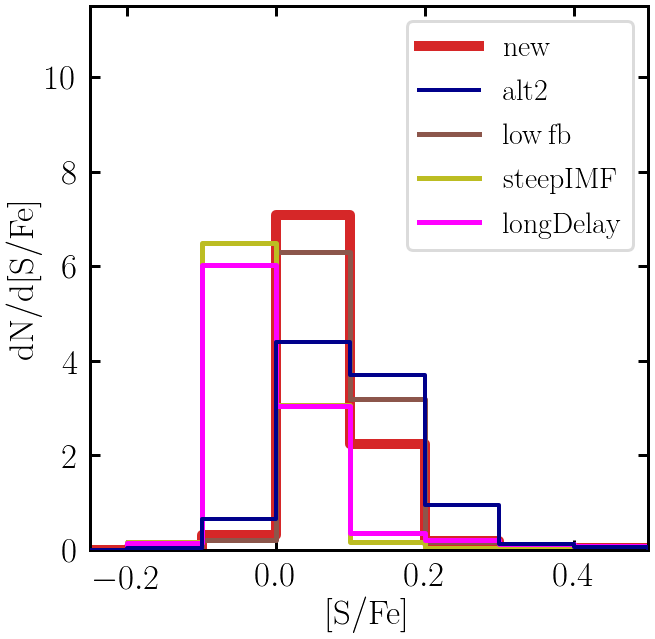

In [133]:
# [S/Fe]
plt.figure(figsize=(10,10))
#plt.bar(mdf_fid['sfe'][1][:-1], mdf_fid['sfe'][0], width=.215, align='edge', color='lightgray', edgecolor='lightgray', label='fiducial')

plt.step(mdf['sfe'][1][:-1], mdf['sfe'][0], where='post', lw=10, label=r'$\rm{new}$', color=cmap(3))

#plt.step(mdf_alt2['sfe'][1][:-1], mdf_alt2['sfe'][0], where='post', lw=8, label='alt', color='darkorange')
plt.step(mdf_alt3['sfe'][1][:-1], mdf_alt3['sfe'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)
#plt.step(mdf_alt['sfe'][1][:-1], mdf_alt['sfe'][0], where='post', lw=6, label='alt4', color='c',zorder=4)

plt.step(mdf_low_fb['sfe'][1][:-1], mdf_low_fb['sfe'][0], where='post', lw=5, label=r'$\rm{low\, fb}$',color='tab:brown')#cmap(4))
plt.step(mdf_steep_IMF['sfe'][1][:-1], mdf_steep_IMF['sfe'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))
plt.step(mdf_long_delay['sfe'][1][:-1], mdf_long_delay['sfe'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))

plt.xlabel(r'$\rm{[S/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[S/Fe]}$')
plt.legend(loc=1,ncol=1,fontsize=30)

plt.xlim((-.25,.5))
plt.ylim((0,11.5))

plt.savefig('./paper_plots/g283e10_Shist2.pdf', bbox_inches='tight')

#### alpha abundance

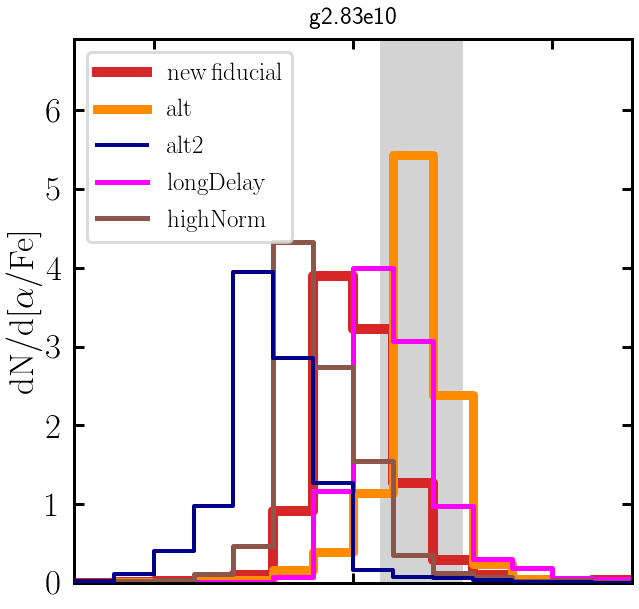

In [134]:
# [alpha/Fe]
plt.figure(figsize=(10,10))
plt.fill_between([0.07,0.27],[0,0],[6.9,6.9], color='lightgray')#,label=r'$\rm{Kirby\!+\!2019}$')

plt.step(mdf['alpha'][1][:-1], mdf['alpha'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

plt.step(mdf_alt2['alpha'][1][:-1], mdf_alt2['alpha'][0], where='post', lw=9, label=r'$\rm{alt}$', color='darkorange')
plt.step(mdf_alt3['alpha'][1][:-1], mdf_alt3['alpha'][0], where='post', lw=4, label=r'$\rm{alt2}$', color='darkblue',zorder=5)

plt.step(mdf_long_delay_2['alpha'][1][:-1], mdf_long_delay_2['alpha'][0], where='post', lw=5, label=r'$\rm{longDelay}$',color='magenta')#cmap(5))
plt.step(mdf_high_Ia['alpha'][1][:-1], mdf_high_Ia['alpha'][0], where='post', lw=5, label=r'$\rm{highNorm}$',color='tab:brown')#cmap(5))



#plt.xlabel(r'$\rm{[\alpha/Fe]}$')
ax= plt.gca()
ax.set_xticklabels([])
plt.ylabel(r'$\rm{d}N/\rm{d[\alpha/Fe]}$')
#plt.legend(loc=0, fontsize=25)
#plt.xlim((-.75,.75))
plt.xlim((-.7,.7))
plt.ylim((0,6.9))
plt.legend(loc=2, ncol=1, fontsize=25)
plt.title(r'g2.83e10', fontsize=25, pad=15)
plt.savefig('./paper_plots/g283e10_alphahist.pdf', bbox_inches='tight')

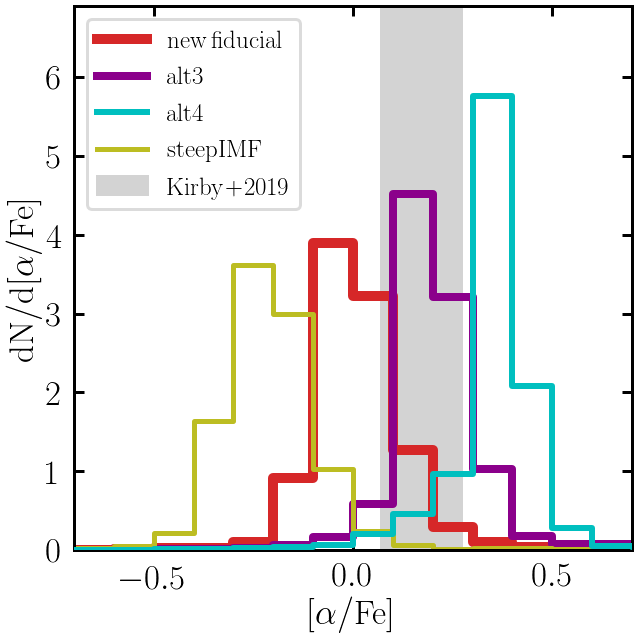

In [136]:
# [alpha/Fe]
plt.figure(figsize=(10,10))
plt.fill_between([0.07,0.27],[0,0],[6.9,6.9], color='lightgray',label=r'$\rm{Kirby\!+\!2019}$')

plt.step(mdf['alpha'][1][:-1], mdf['alpha'][0], where='post', lw=10, label=r'$\rm{new\, fiducial}$', color=cmap(3))

#plt.step(mdf_alt2['alpha'][1][:-1], mdf_alt2['alpha'][0], where='post', lw=8, label='alt', color='darkorange')
#plt.step(mdf_alt['alpha'][1][:-1], mdf_alt['alpha'][0], where='post', lw=6, label='alt4', color='c',zorder=4)
plt.step(mdf_alt4['alpha'][1][:-1], mdf_alt4['alpha'][0], where='post', lw=8, label=r'$\rm{alt3}$', color='darkmagenta')
plt.step(mdf_alt['alpha'][1][:-1], mdf_alt['alpha'][0], where='post', lw=6, label=r'$\rm{alt4}$', color='c',zorder=4)

#plt.step(mdf_low_fb['alpha'][1][:-1], mdf_low_fb['alpha'][0], where='post', lw=5, label=r'$\rm{low\, fb}$',color='tab:brown')#cmap(4))
plt.step(mdf_steep_IMF['alpha'][1][:-1], mdf_steep_IMF['alpha'][0], where='post', lw=5, label=r'$\rm{steepIMF}$',color='tab:olive')#cmap(5))


plt.xlabel(r'$\rm{[\alpha/Fe]}$')
plt.ylabel(r'$\rm{d}N/\rm{d[\alpha/Fe]}$')
plt.legend(loc=2, ncol=1, fontsize=25)
plt.xlim((-.7,.7))
plt.ylim((0,6.9))
plt.savefig('./paper_plots/g283e10_alphahist2.pdf', bbox_inches='tight')

# Abundance tracks 

Let's have a look at different element abundance tracks in qualitative comparison with the Galah data. 
This comparison goes beyond simple MDFs and the slopes of the tracks might give a hint at the relative 
contribution of the different sources to the enrichment and the different timescales involved.  

In [443]:
def setup_abundance_plot(axes=None, elem='alphafe',label=r'$\rm{[\alpha/Fe]}$', galah='./data/GALAH_DR3_main_allstar_v2.fits'):
    '''
    Create a figure object to plot the stellar abundance tracks [X/Fe] vs. [Fe/H] for several elements X 
    as provided by elem_list. 
    If additionally galah is set to the path where the Galah data is, the observational data of the solar 
    neighbourhood from the Galah survey is plotted as well.
    '''
    
    import matplotlib.gridspec as gridspec
    
    N_lines = 2
    N_cols = 4
    
    if axes is None:
        fig = plt.figure(figsize=(10*N_cols,5*N_lines))
        gs = gridspec.GridSpec(N_lines+1, N_cols, width_ratios=[1]*N_cols, height_ratios=[0.05]+[.5]*N_lines)
        gs.update(hspace=0.0, wspace=0.0)
                         
        cbaxis = plt.subplot(gs[0:N_cols])
        axis = []
        for i in range(N_cols*N_lines):
            axis.append(plt.subplot(gs[N_cols+i]))
            if i < N_cols:
                axis[-1].set_xticklabels([])
            if not (i%N_cols == 0):
                axis[-1].set_yticklabels([])
            if (i%N_cols == 0):
                axis[-1].set_ylabel(label)
            #axis[-1].text( 0.8, 0.85, label[i], color='k', fontsize=35, transform=axis[-1].transAxes )
            if i >= (N_cols*N_lines)-N_cols:
                axis[-1].set_xlabel(r'$\rm{[Fe/H]}$')
            axis[-1].set_ylim(-.4,.6)
            axis[-1].set_xlim(-2.5,1)
        
    if galah:
        from astropy.io import fits
        if os.path.isfile(galah):
            hdul = fits.open(galah)
            dr3 = hdul[1].data
            
            for i in range(N_cols*N_lines):
                #try:
                if elem == 'alphafe':
                    select_alpha = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3['flag_alpha_fe'] == 0))
                    obs_data = dr3['alpha_fe'][select_alpha]
                else:
                    key = 'flag_'+elem+'_fe'
                    select_alpha = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3[key] == 0))
                    obs_data = dr3[elem+'_fe'][select_alpha]
                
                Fe_data = dr3['fe_h'][select_alpha]
                hist, xe, ye = np.histogram2d(Fe_data,obs_data,bins=50, range=((-2.,.75),(-.75,1.)))
                    #X, Y = np.meshgrid(xe[:-1], ye[:-1])
                    #axis[i].contour(X, Y, np.log10(hist), 5, cmap='RdGy_r')
                axis[i].contour(np.log10(hist).T/np.max(np.log10(hist)),extent=[xe[0],xe[-1],ye[0],ye[-1]], cmap='RdGy_r', levels=[0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.95], alpha=0.75, zorder=-5)
        
                #except:
                #    print("Element %s not in Galah table."%elem_list[i])
                
                axis[i].plot([-4,1],[0,0], c='gray')
                axis[i].plot([0,0],[-.5,.75], c='gray')
        else:
            print('Could not open Galah data at path: %s.'%galah)

    return axis, cbaxis, fig

In [386]:
# load alpha data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_alphafe_feh.dat','rb'), encoding='latin1')
g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_alphafe_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_alphafe_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_alphafe_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_alphafe_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_alphafe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_alphafe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay2 = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_2_alphafe_feh.dat','rb'), encoding='latin1')
g826e11_high_Ia = pickle.load(open('./data/abundance_ratio/g8.26e11_high_Ia_norm_alphafe_feh.dat','rb'), encoding='latin1')


/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by ze

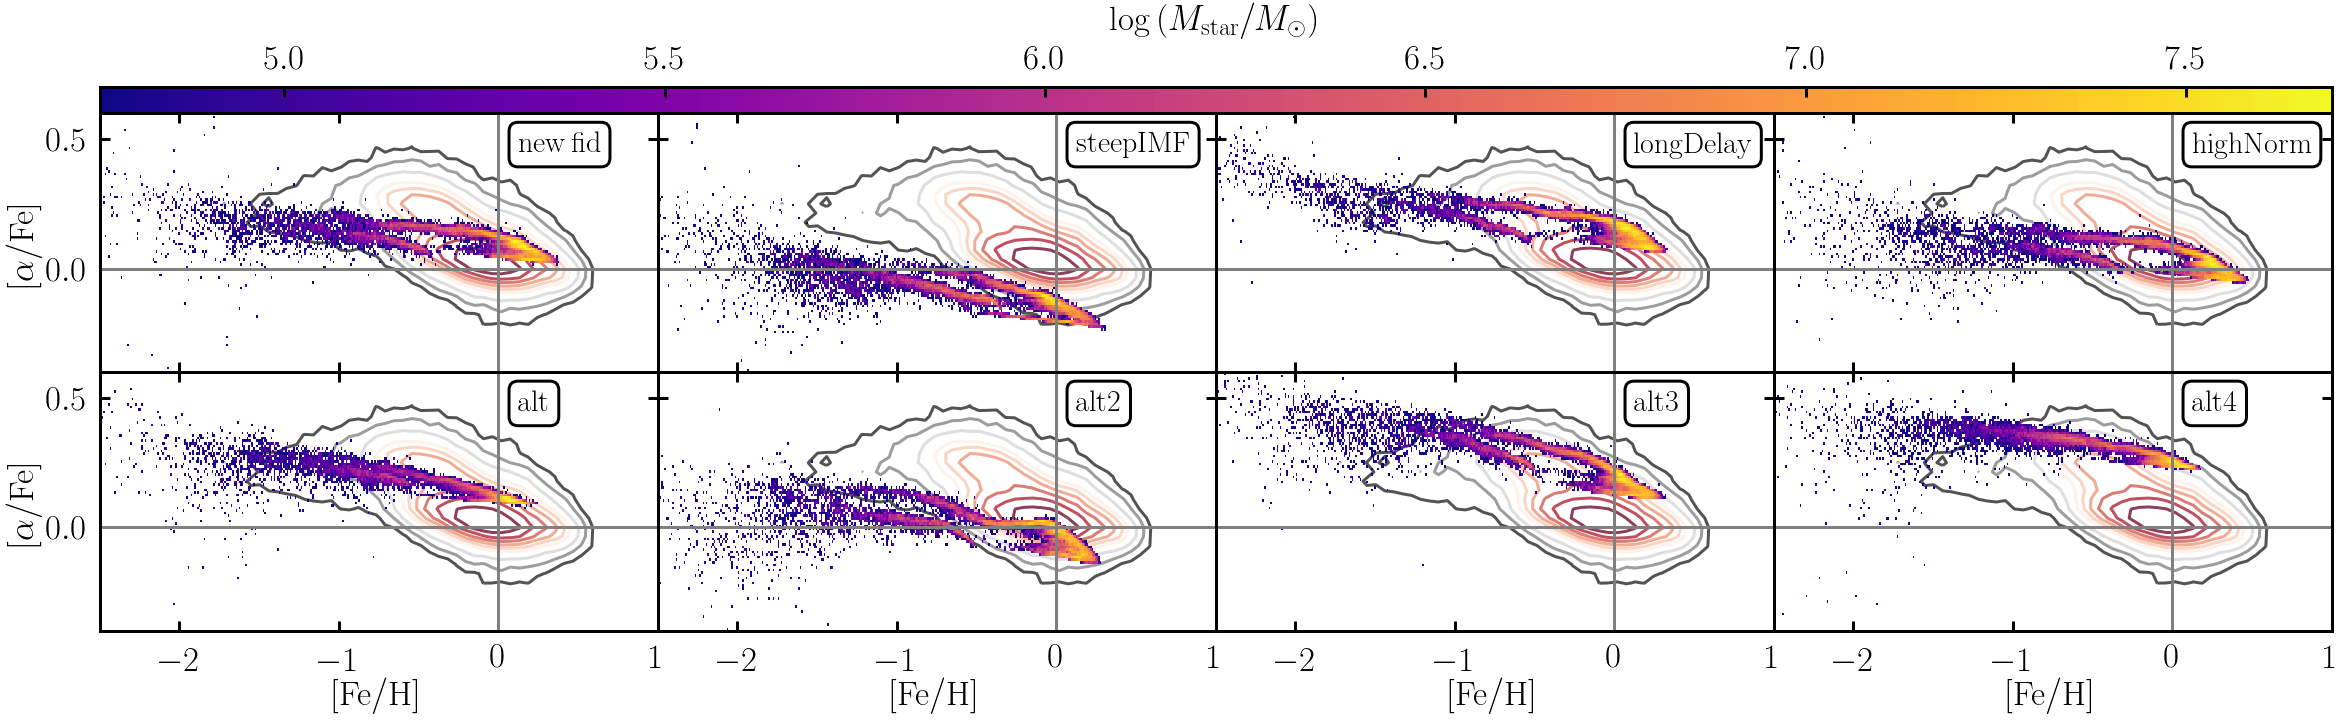

In [433]:
# plot alpha data
axis, cbaxis, fig = setup_abundance_plot()

err_feh = np.nanmedian(dr3['e_fe_h'])
err_alpha = np.nanmedian(dr3['e_alpha_fe'])

a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, fid}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
axis[0].errorbar(0.75,-0.25,xerr=[err_feh], yerr=[err_alpha],c='gray')
a = axis[1].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
axis[1].errorbar(0.75,-0.25,xerr=[err_feh], yerr=[err_alpha],c='gray')
a = axis[2].imshow(np.log10(g826e11_long_delay2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
axis[2].errorbar(0.75,-0.25,xerr=[err_feh], yerr=[err_alpha],c='gray')
a = axis[3].imshow(np.log10(g826e11_high_Ia['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{highNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
axis[3].errorbar(0.75,-0.25,xerr=[err_feh], yerr=[err_alpha],c='gray')

a = axis[4].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
axis[4].errorbar(0.75,-0.25,xerr=[err_feh], yerr=[err_alpha],c='gray')
a = axis[5].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )
axis[5].errorbar(0.75,-0.25,xerr=[err_feh], yerr=[err_alpha],c='gray')
a = axis[6].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[6].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )
axis[6].errorbar(0.75,-0.25,xerr=[err_feh], yerr=[err_alpha],c='gray')
a = axis[7].imshow(np.log10(g826e11_alt['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )
axis[7].errorbar(0.75,-0.25,xerr=[err_feh], yerr=[err_alpha],c='gray')

cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

fig.savefig('./paper_plots/alpha_feh_galah.pdf', bbox_inches='tight')

In [435]:
# load [O/Fe] data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_ofe_feh.dat','rb'), encoding='latin1')
g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_ofe_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_ofe_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_ofe_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_ofe_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_ofe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_ofe_feh.dat','rb'), encoding='latin1')
g826e11_high_Ia = pickle.load(open('./data/abundance_ratio/g8.26e11_high_Ia_norm_ofe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay2 = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_2_ofe_feh.dat','rb'), encoding='latin1')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by ze

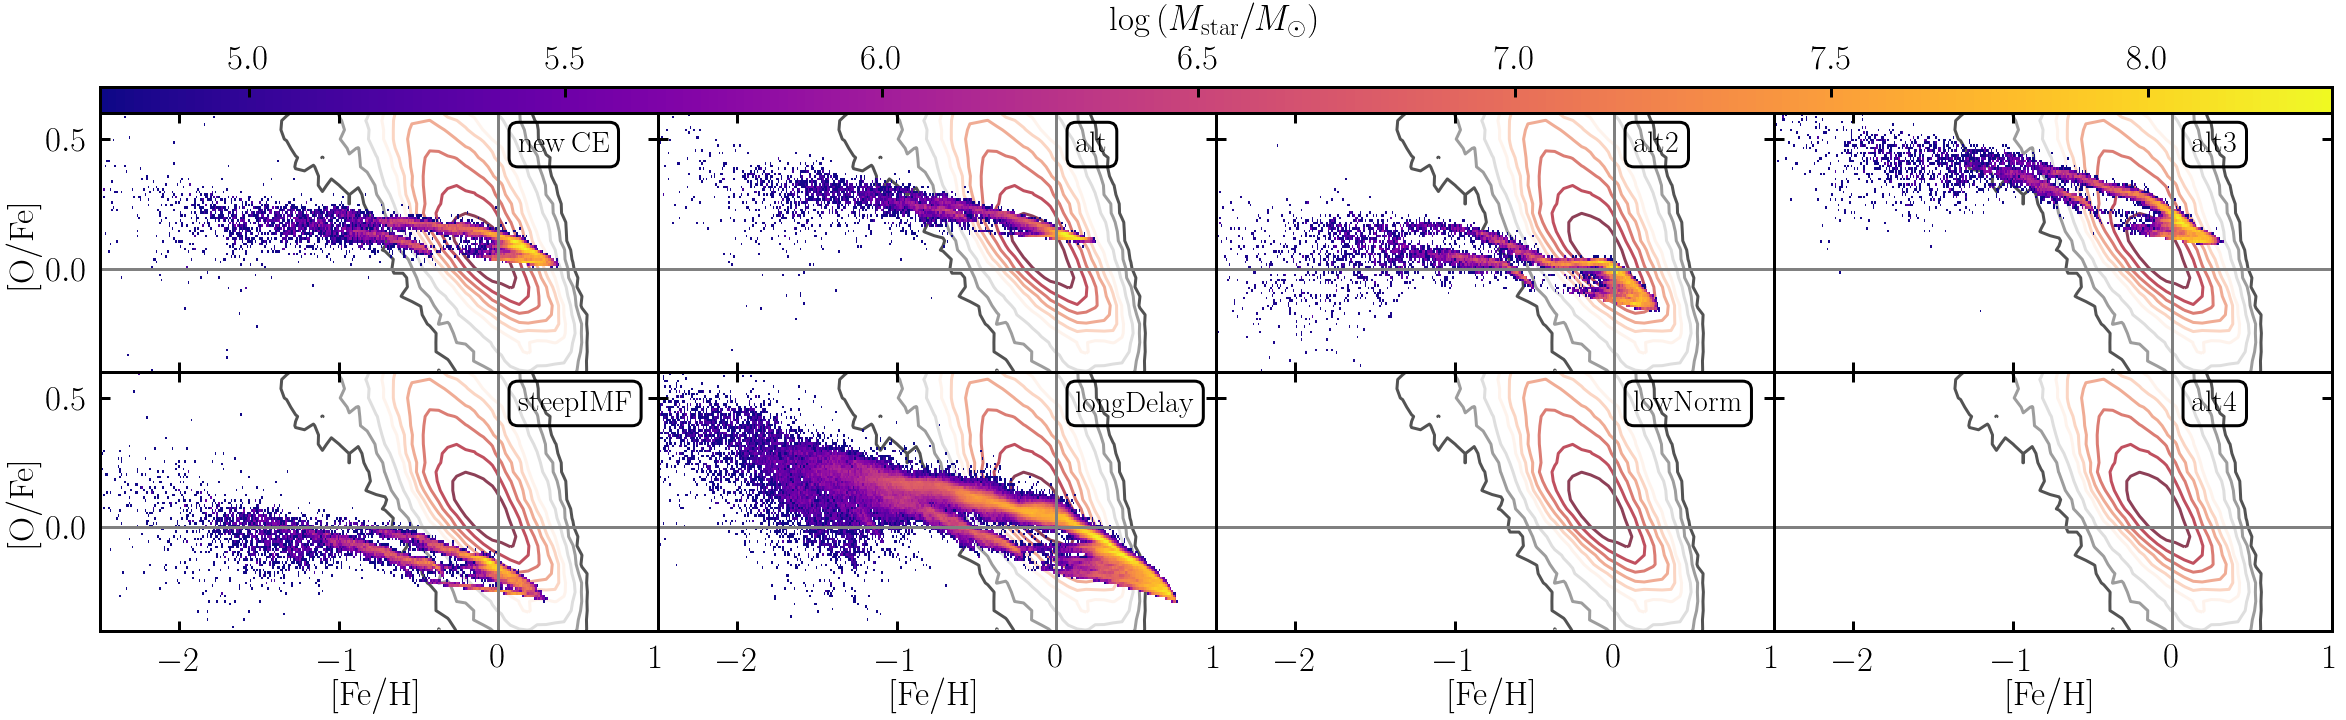

In [444]:
# plot [O/Fe]
axis, cbaxis, fig = setup_abundance_plot(elem='o', label=r'$\rm{[O/Fe]}$')
a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, CE}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
a = axis[1].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
a = axis[2].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
a = axis[3].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
a = axis[4].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
a = axis[5].imshow(np.log10(g826e11_long_delay['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )

axis[6].text( 0.75, 0.85, r'$\rm{lowNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )

axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )


cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

fig.savefig('./paper_plots/O_feh_galah.pdf', bbox_inches='tight')

### Individual element plots using the Galah-DR2

In [335]:
# load [Mg/Fe] data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_mgfe_feh.dat','rb'), encoding='latin1')
#g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_mgfe_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_mgfe_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_mgfe_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_mgfe_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_mgfe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_mgfe_feh.dat','rb'), encoding='latin1')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by ze

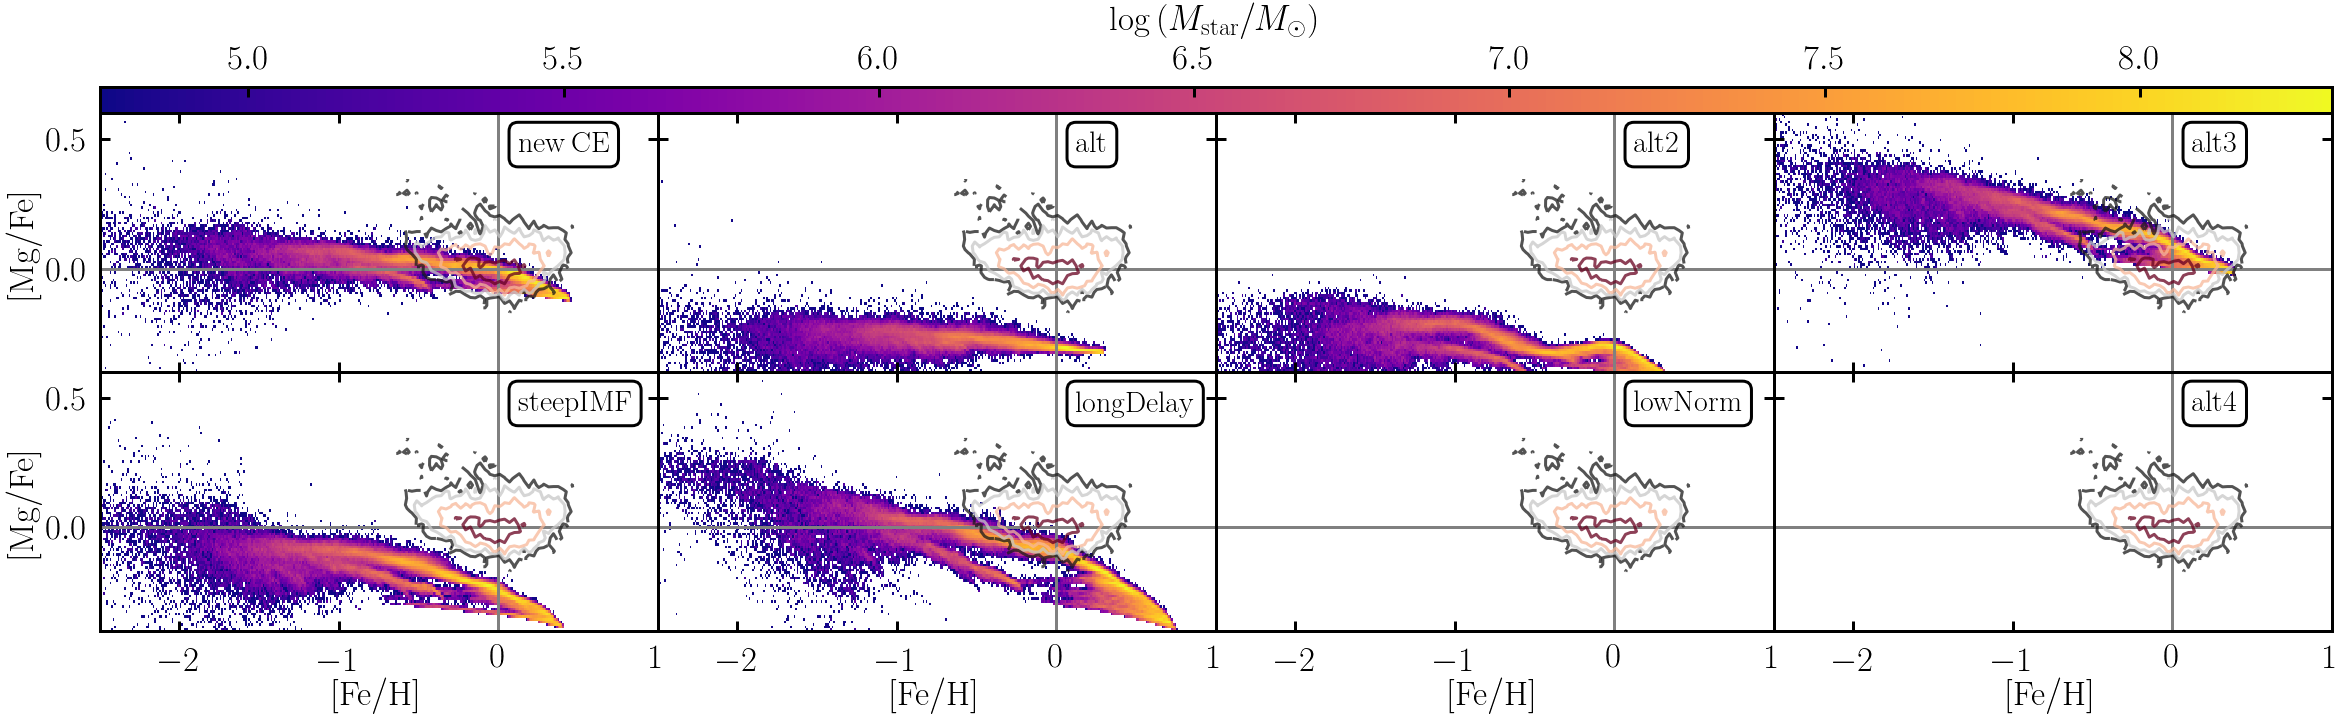

In [336]:
# plot [mg/Fe] data
axis, cbaxis, fig = setup_abundance_plot(elem='Mg', label=r'$\rm{[Mg/Fe]}$')
a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, CE}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
a = axis[1].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
a = axis[2].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
a = axis[3].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
a = axis[4].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
a = axis[5].imshow(np.log10(g826e11_long_delay['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )

axis[6].text( 0.75, 0.85, r'$\rm{lowNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )

axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )


cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

fig.savefig('./paper_plots/Mg_feh_galah.pdf', bbox_inches='tight')

In [312]:
# load [C/Fe] data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_cfe_feh.dat','rb'), encoding='latin1')
#g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_cfe_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_cfe_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_cfe_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_cfe_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_cfe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_cfe_feh.dat','rb'), encoding='latin1')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by ze

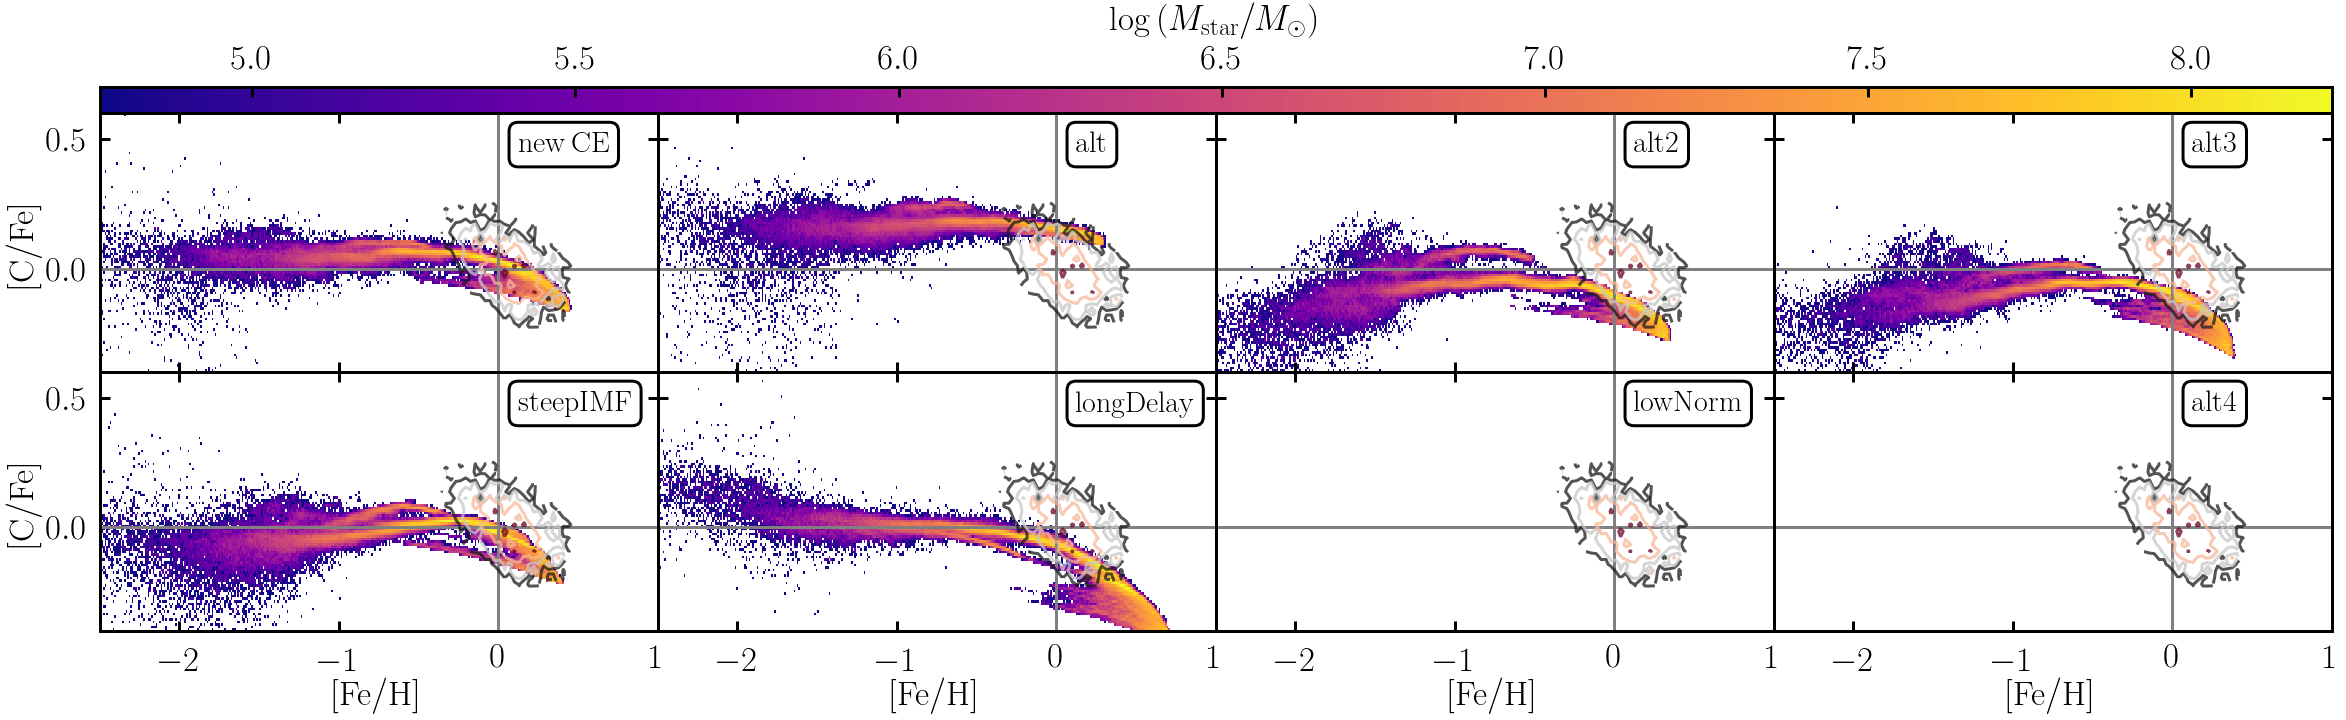

In [314]:
# plot [C/Fe] data
axis, cbaxis, fig = setup_abundance_plot(elem='C', label=r'$\rm{[C/Fe]}$')
a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, CE}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
a = axis[1].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
a = axis[2].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
a = axis[3].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
a = axis[4].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
a = axis[5].imshow(np.log10(g826e11_long_delay['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )

axis[6].text( 0.75, 0.85, r'$\rm{lowNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )

axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )


cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


In [317]:
# load [Si/Fe] data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_sife_feh.dat','rb'), encoding='latin1')
#g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_sife_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_sife_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_sife_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_sife_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_sife_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_sife_feh.dat','rb'), encoding='latin1')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by ze

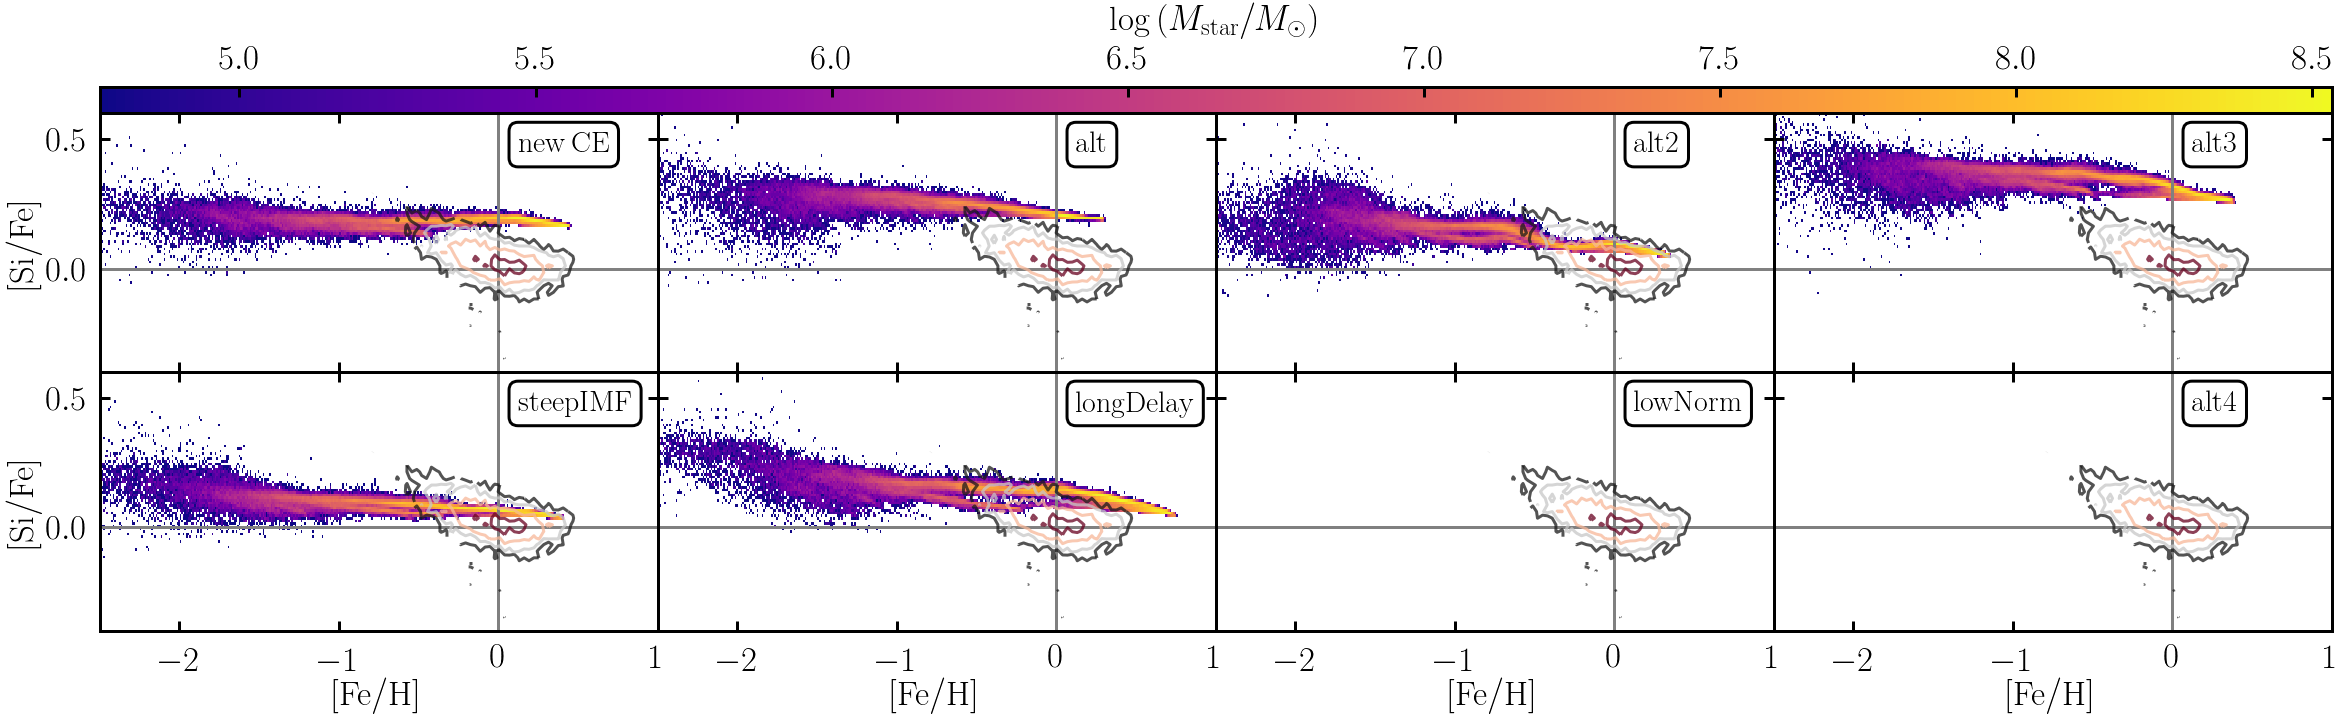

In [318]:
# plor [Si/Fe] data
axis, cbaxis, fig = setup_abundance_plot(elem='Si', label=r'$\rm{[Si/Fe]}$')
a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, CE}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
a = axis[1].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
a = axis[2].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
a = axis[3].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
a = axis[4].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
a = axis[5].imshow(np.log10(g826e11_long_delay['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )

axis[6].text( 0.75, 0.85, r'$\rm{lowNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )

axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )


cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')







In [320]:
# load [Al/Fe] data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_alfe_feh.dat','rb'), encoding='latin1')
#g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_alfe_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_alfe_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_alfe_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_alfe_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_alfe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_alfe_feh.dat','rb'), encoding='latin1')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by ze

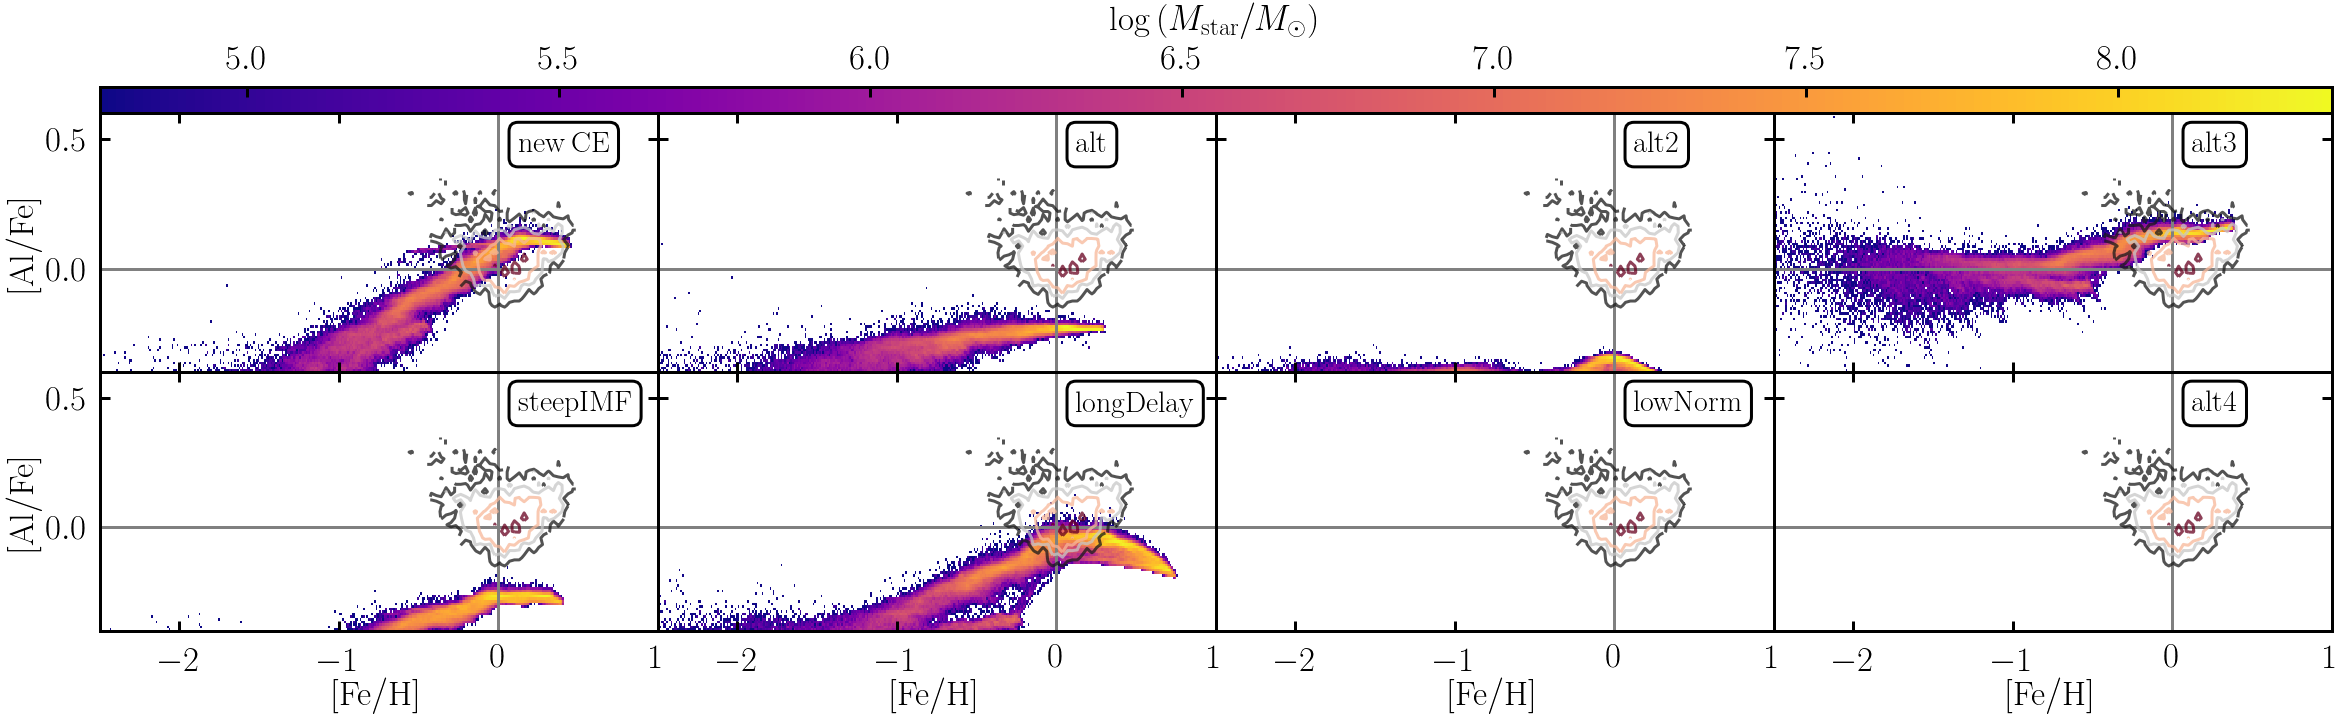

In [321]:
# plot [Al/Fe] data
axis, cbaxis, fig = setup_abundance_plot(elem='Al', label=r'$\rm{[Al/Fe]}$')
a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, CE}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
a = axis[1].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
a = axis[2].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
a = axis[3].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
a = axis[4].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
a = axis[5].imshow(np.log10(g826e11_long_delay['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )

axis[6].text( 0.75, 0.85, r'$\rm{lowNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )

axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )


cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


In [322]:
# load [Ca/Fe] data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_cafe_feh.dat','rb'), encoding='latin1')
#g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_cafe_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_cafe_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_cafe_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_cafe_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_cafe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_cafe_feh.dat','rb'), encoding='latin1')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by ze

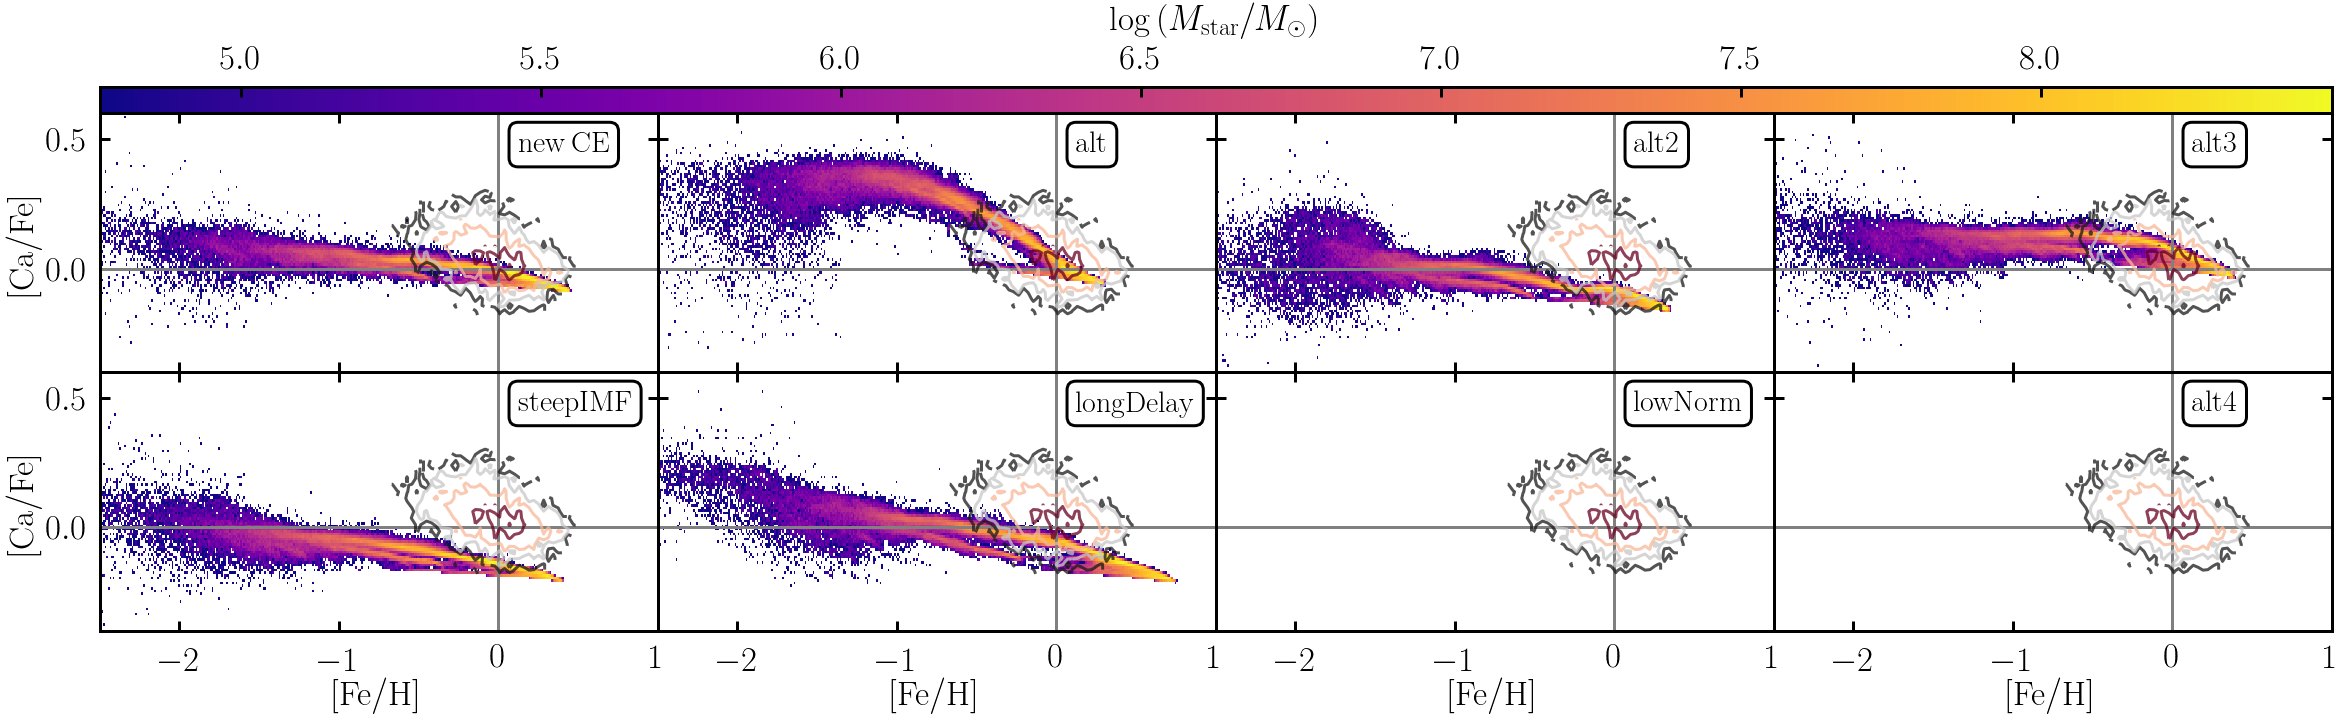

In [323]:
# plot [Ca/Fe] data
axis, cbaxis, fig = setup_abundance_plot(elem='Ca', label=r'$\rm{[Ca/Fe]}$')
a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, CE}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
a = axis[1].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
a = axis[2].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
a = axis[3].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
a = axis[4].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
a = axis[5].imshow(np.log10(g826e11_long_delay['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )

axis[6].text( 0.75, 0.85, r'$\rm{lowNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )

axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )


cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')



In [324]:
# load [Na/Fe] data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_nafe_feh.dat','rb'), encoding='latin1')
#g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_nafe_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_nafe_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_nafe_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_nafe_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_nafe_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_nafe_feh.dat','rb'), encoding='latin1')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by ze

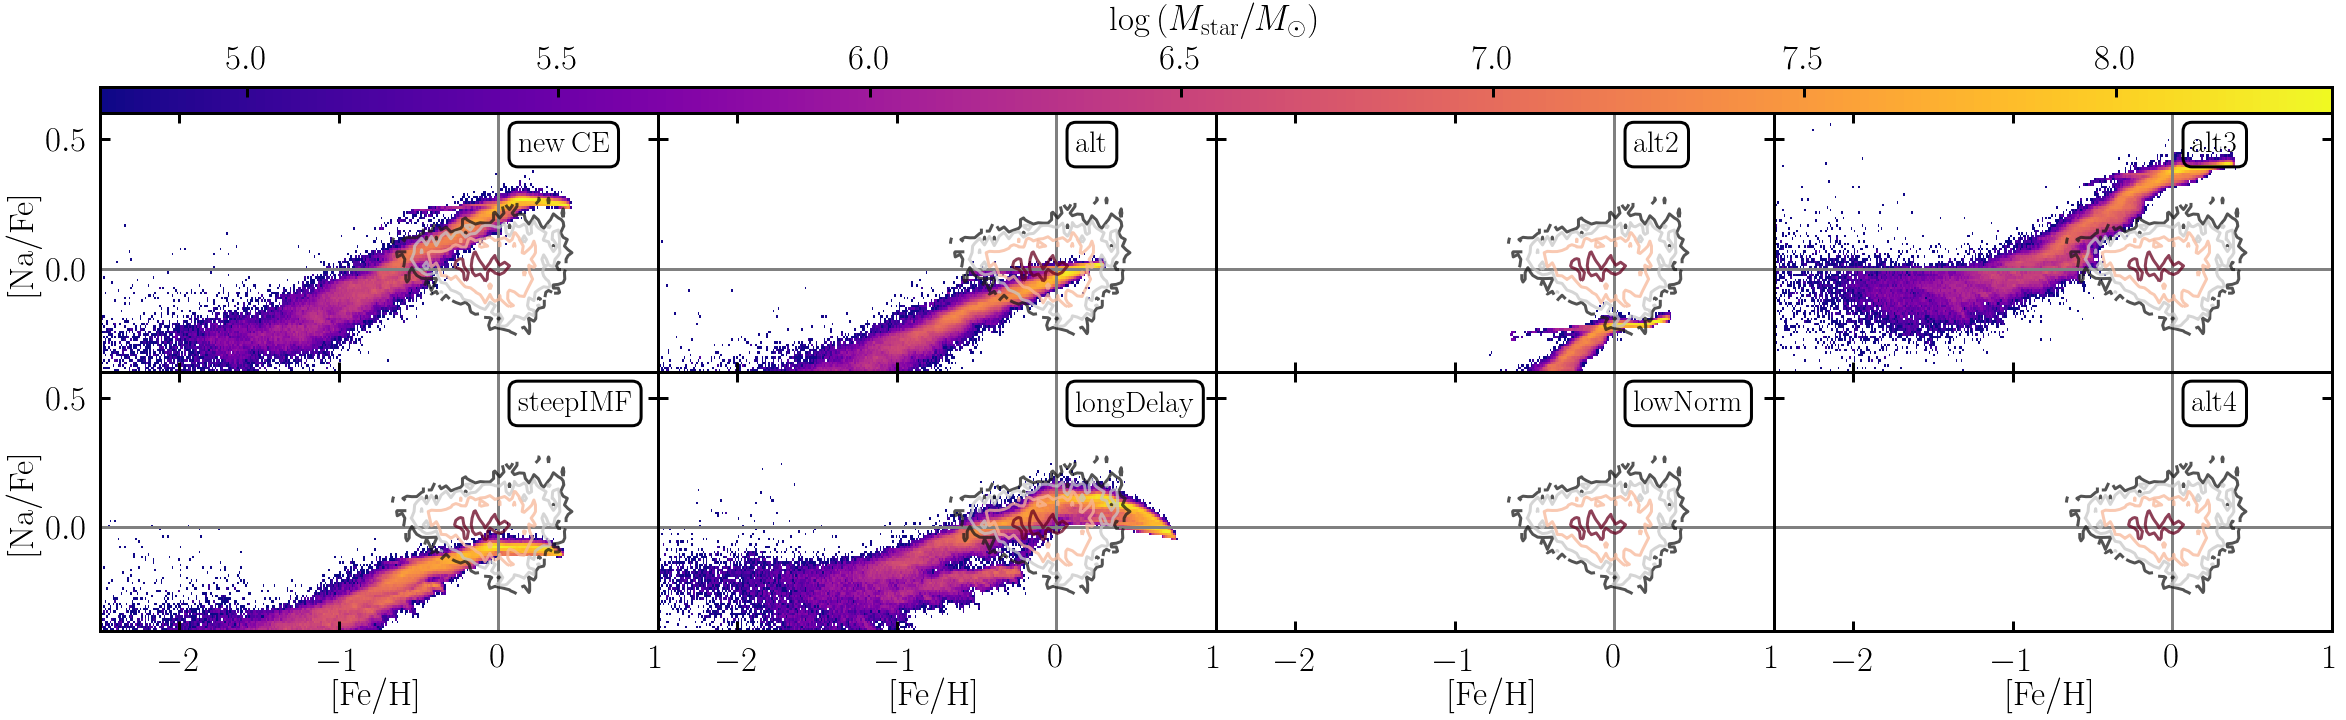

In [325]:
# plot [Na/Fe] data
axis, cbaxis, fig = setup_abundance_plot(elem='Na', label=r'$\rm{[Na/Fe]}$')
a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, CE}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
a = axis[1].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
a = axis[2].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
a = axis[3].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
a = axis[4].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
a = axis[5].imshow(np.log10(g826e11_long_delay['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )

axis[6].text( 0.75, 0.85, r'$\rm{lowNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )

axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )


cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


In [326]:
# load [Ti/Fe] data
g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_tife_feh.dat','rb'), encoding='latin1')
#g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_tife_feh.dat','rb'), encoding='latin1')
g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_tife_feh.dat','rb'), encoding='latin1')
g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_tife_feh.dat','rb'), encoding='latin1')
g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_tife_feh.dat','rb'), encoding='latin1')
g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_tife_feh.dat','rb'), encoding='latin1')
g826e11_long_delay = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_tife_feh.dat','rb'), encoding='latin1')

/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/buck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by ze

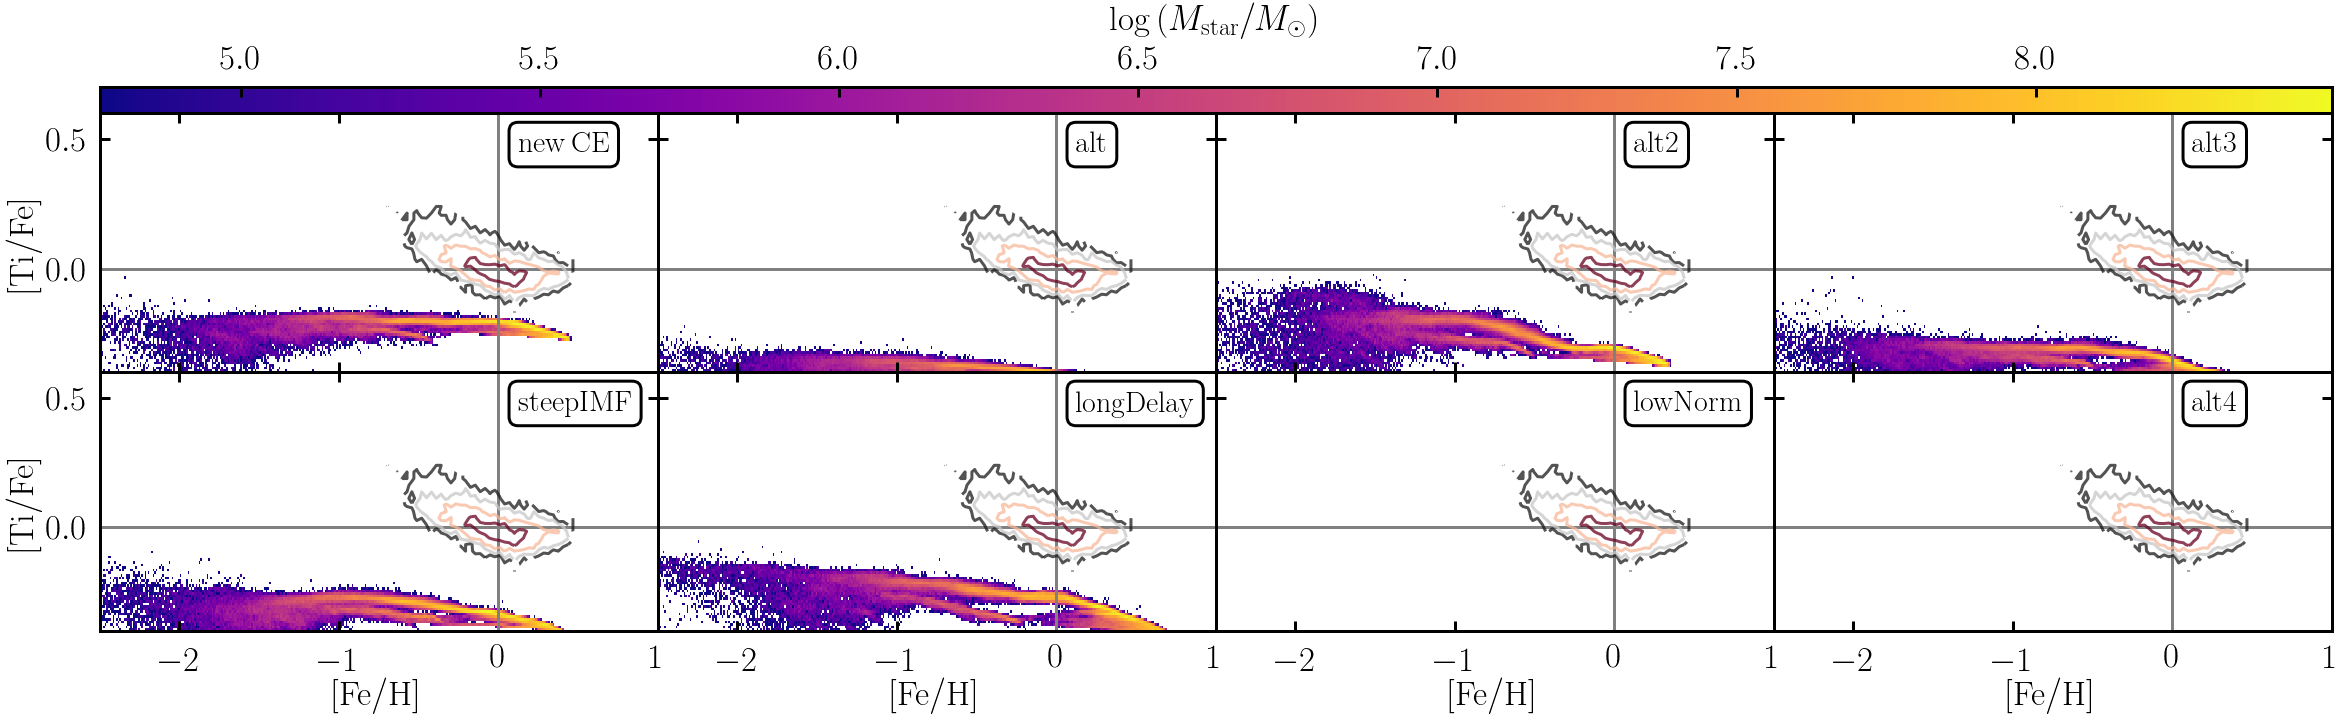

In [327]:
# plot [Ti/Fe] data
axis, cbaxis, fig = setup_abundance_plot(elem='Ti', label=r'$\rm{[Ti/Fe]}$')
a = axis[0].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[0].text( 0.75, 0.85, r'$\rm{new\, CE}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[0].transAxes )
a = axis[1].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[1].text( 0.75, 0.85, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[1].transAxes )
a = axis[2].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[2].text( 0.75, 0.85, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[2].transAxes )
a = axis[3].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[3].text( 0.75, 0.85, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[3].transAxes )
a = axis[4].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[4].text( 0.75, 0.85, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[4].transAxes )
a = axis[5].imshow(np.log10(g826e11_long_delay['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
axis[5].text( 0.75, 0.85, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[5].transAxes )

axis[6].text( 0.75, 0.85, r'$\rm{lowNorm}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[6].transAxes )

axis[7].text( 0.75, 0.85, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='none', boxstyle='round'), transform=axis[7].transAxes )


cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')


## abundance tracks comparison

In [456]:
def setup_abundance_comparison(axes=None, elem=['o','c','mg','ca'],label=r'$\rm{[X/Fe]}$', galah='./data/GALAH_DR3_main_allstar_v2.fits'):
    '''
    Create a figure object to plot the stellar abundance tracks [X/Fe] vs. [Fe/H] for several elements X 
    as provided by elem_list. 
    If additionally galah is set to the path where the Galah data is, the observational data of the solar 
    neighbourhood from the Galah survey is plotted as well.
    '''
    
    import matplotlib.gridspec as gridspec
    
    N_lines = 8
    N_cols = 4
    
    if axes is None:
        fig = plt.figure(figsize=(10*N_cols,5*N_lines))
        gs = gridspec.GridSpec(N_lines+1, N_cols, width_ratios=[1]*N_cols, height_ratios=[0.05]+[.5]*N_lines)
        gs.update(hspace=0.0, wspace=0.0)
                         
        cbaxis = plt.subplot(gs[0:N_cols])
        axis = []
        for i in range(N_cols*N_lines):
            axis.append(plt.subplot(gs[N_cols+i]))
            if i < N_cols:
                axis[-1].set_xticklabels([])
            if not (i%N_cols == 0):
                axis[-1].set_yticklabels([])
            if (i%N_cols == 0):
                axis[-1].set_ylabel(label)
                axis[-1].set_yticks([0,0.5])
            #axis[-1].text( 0.8, 0.85, label[i], color='k', fontsize=35, transform=axis[-1].transAxes )
            if i >= (N_cols*N_lines)-N_cols:
                axis[-1].set_xlabel(r'$\rm{[Fe/H]}$')
            axis[-1].set_ylim(-.5,.5)
            axis[-1].set_xlim(-2.5,1)
        
    if galah:
        from astropy.io import fits
        if os.path.isfile(galah):
            hdul = fits.open(galah)
            dr3 = hdul[1].data
            for i in range(N_cols*N_lines):
                #try:
                if elem[i%N_cols] == 'alphafe':
                    select_alpha = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3['flag_alpha_fe'] == 0))
                    obs_data = dr3['alpha_fe'][select_alpha]
                else:
                    select_alpha = ((dr3['flag_sp'] == 0) & (dr3['flag_fe_h'] == 0) & (dr3['flag_'+elem[i%N_cols]+'_fe'] == 0))
                    obs_data = dr3[elem[i%N_cols]+'_fe'][select_alpha]
                Fe_data = dr3['fe_h'][select_alpha]
                hist, xe, ye = np.histogram2d(Fe_data,obs_data,bins=50, range=((-2.,.75),(-.75,1.)))
                    #X, Y = np.meshgrid(xe[:-1], ye[:-1])
                    #axis[i].contour(X, Y, np.log10(hist), 5, cmap='RdGy_r')
                axis[i].contour(np.log10(hist).T/np.max(np.log10(hist)),extent=[xe[0],xe[-1],ye[0],ye[-1]], cmap='RdGy_r', levels=[0.3,0.5,0.7,.75,.8,.85,.9,.95], alpha=0.75, zorder=-55)
        
                #except:
                #    print("Element %s not in Galah table."%elem_list[i])
                
                axis[i].plot([-4,1],[0,0], c='gray')
                axis[i].plot([0,0],[-.5,.75], c='gray')
        else:
            print('Could not open Galah data at path: %s.'%galah)

    return axis, cbaxis, fig

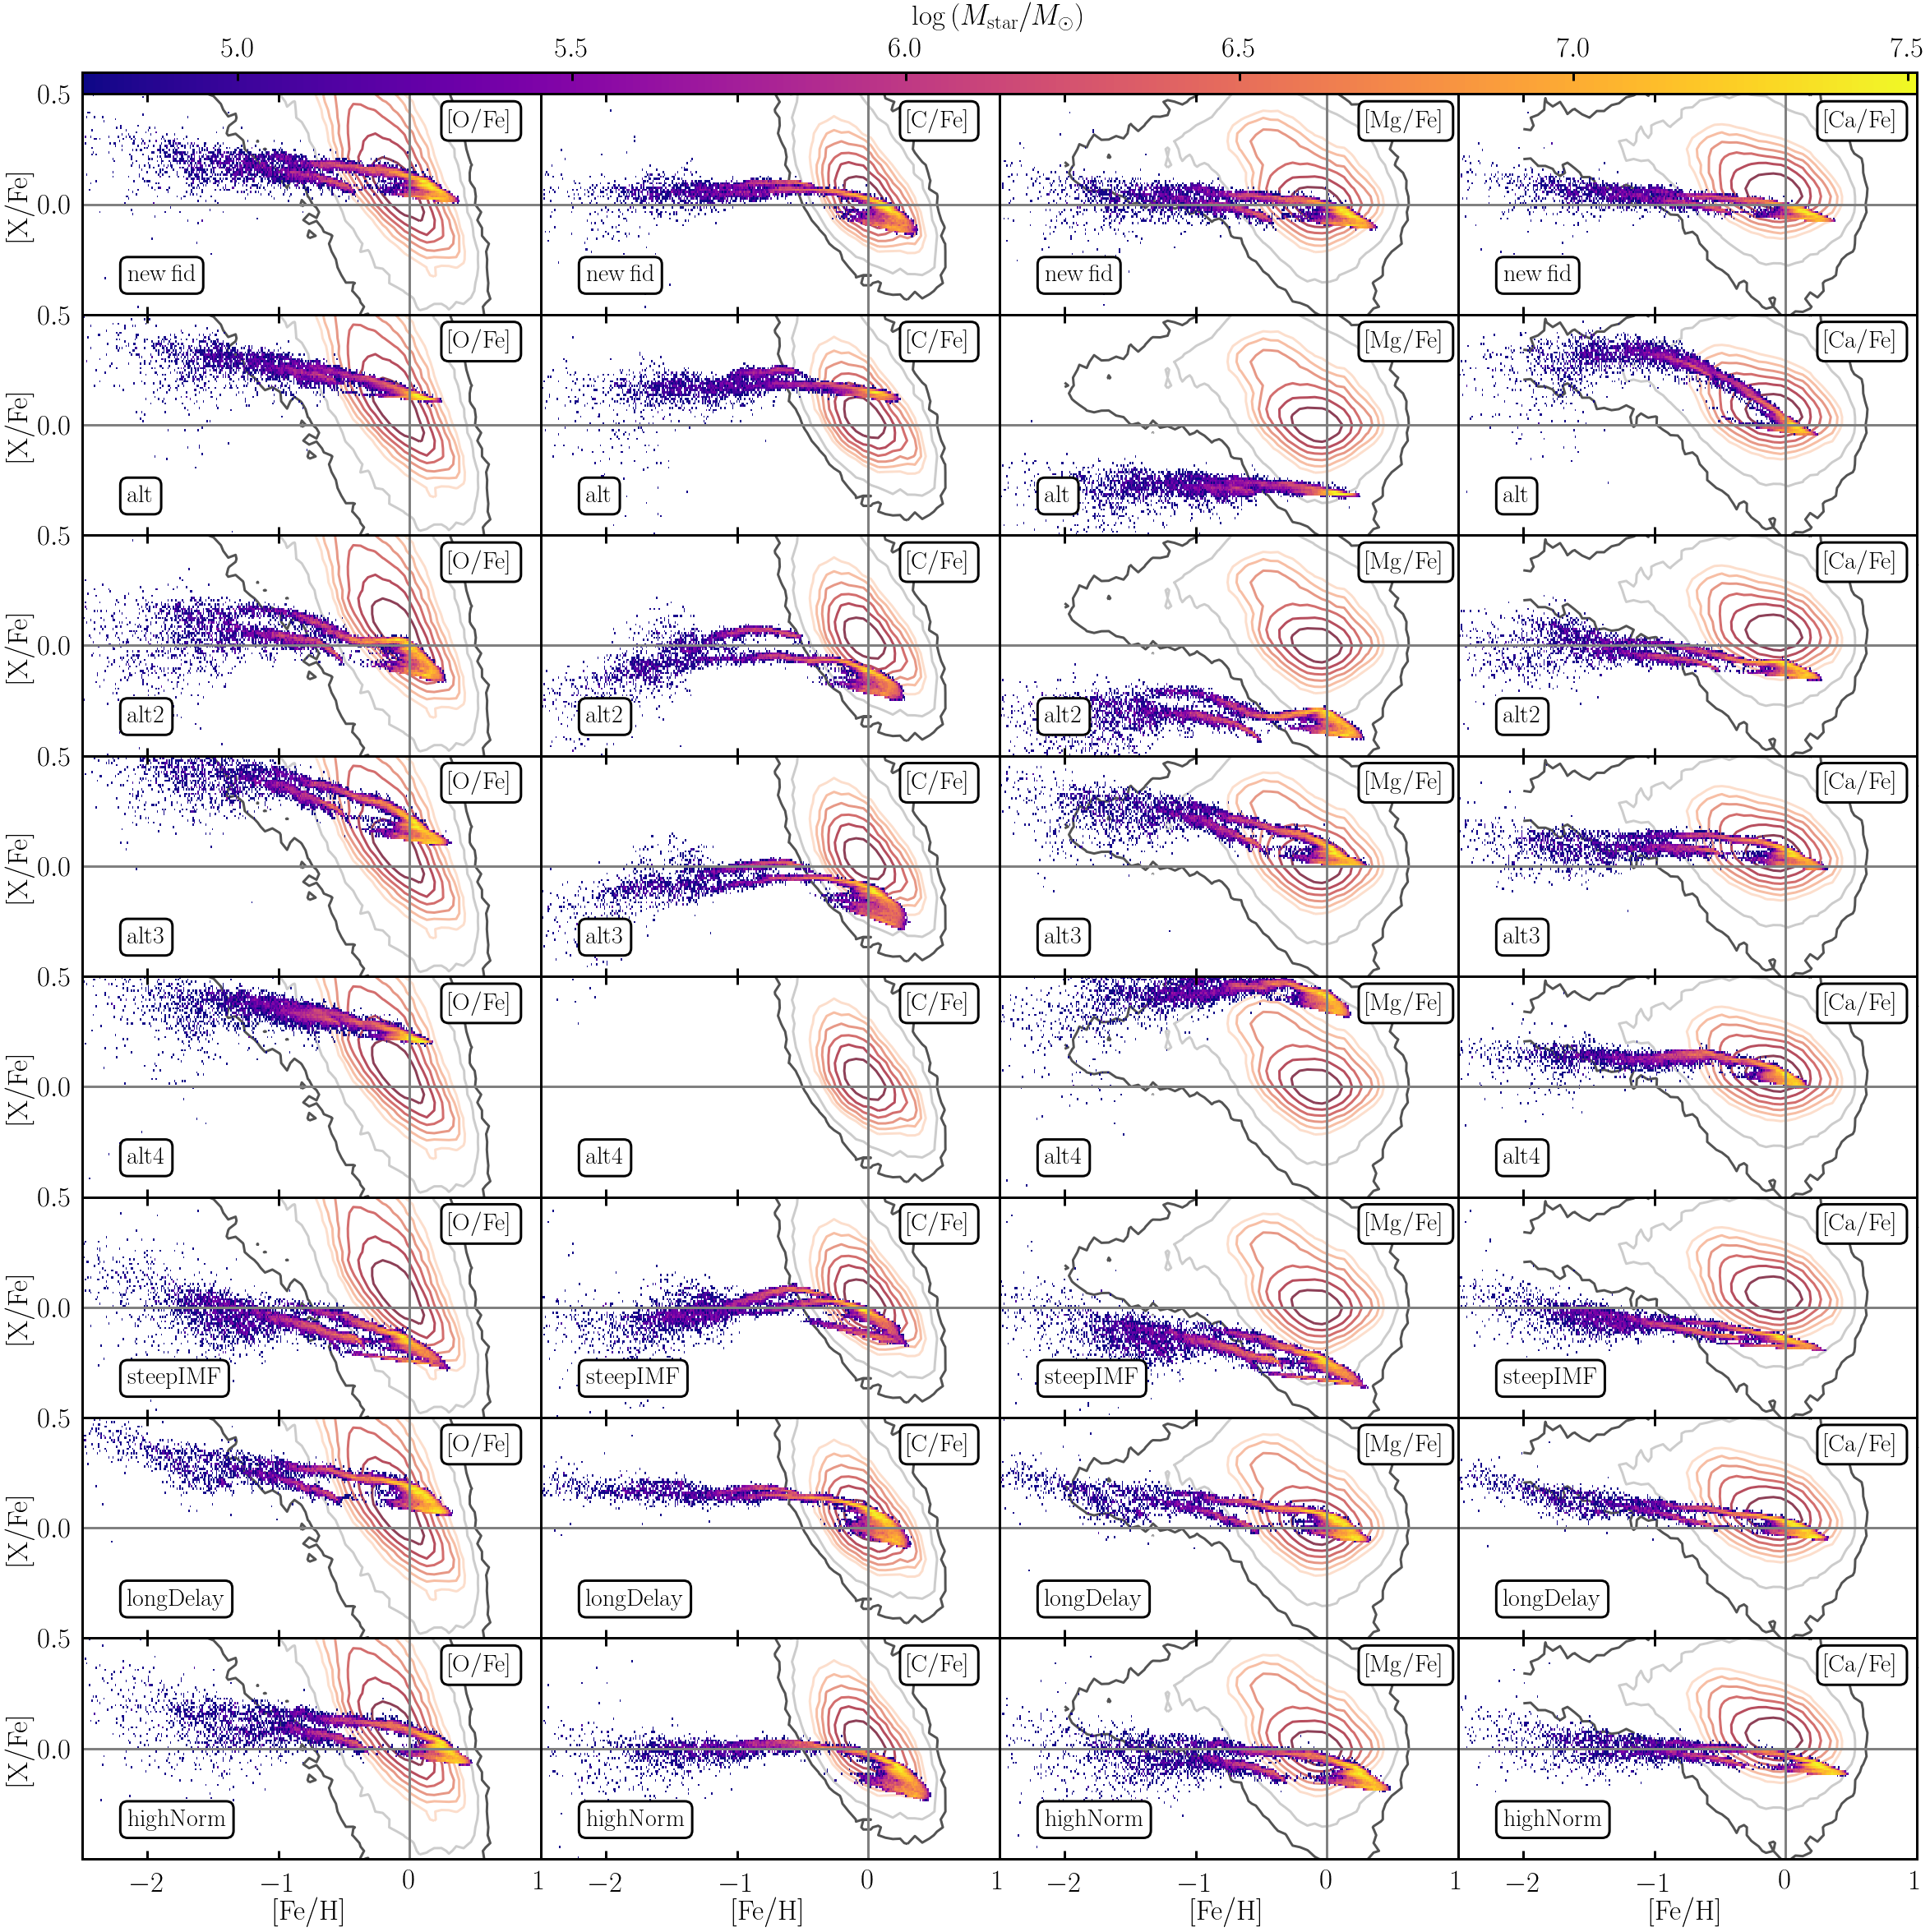

In [468]:
import warnings
warnings.filterwarnings('ignore')
elements = ['ofe','cfe','mgfe','cafe']
e = ['o','c','mg','ca']

labels = [r'$\rm{[O/Fe]}$',r'$\rm{[C/Fe]}$',r'$\rm{[Mg/Fe]}$',r'$\rm{[Ca/Fe]}$']

axis, cbaxis, fig = setup_abundance_comparison()

for i, elem in enumerate(elements):
    # load data
    g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_long_delay2 = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_2_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_high_Ia = pickle.load(open('./data/abundance_ratio/g8.26e11_high_Ia_norm_'+elem+'_feh.dat','rb'), encoding='latin1')
    
    # galah uncertainties
    err_feh = np.nanmedian(dr3['e_fe_h'])
    err_o = np.nanmedian(dr3['e_'+e[i]+'_fe'])
    
    # plot data
    
    a = axis[i].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i].transAxes )
    axis[i].text( 0.1, 0.15, r'$\rm{new\, fid}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i].transAxes )
    a = axis[i+4].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+4].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+4].transAxes )
    axis[i+4].text( 0.1, 0.15, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+4].transAxes )
    a = axis[i+8].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+8].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+8].transAxes )
    axis[i+8].text( 0.1, 0.15, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+8].transAxes )
    a = axis[i+12].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+12].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+12].transAxes )
    axis[i+12].text( 0.1, 0.15, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+12].transAxes )
    
    a = axis[i+16].imshow(np.log10(g826e11_alt['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+16].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+16].transAxes )
    axis[i+16].text( 0.1, 0.15, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+16].transAxes )
    if elem == 'cfe':
          axis[i+16].text( 0.1, 0.5, r'$\rm{simulation\, data\, outside\, plotting\, range}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+16].transAxes )
    
    a = axis[i+20].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+20].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+20].transAxes )
    axis[i+20].text( 0.1, 0.15, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+20].transAxes )
    a = axis[i+24].imshow(np.log10(g826e11_long_delay2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+24].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+24].transAxes )
    axis[i+24].text( 0.1, 0.15, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+24].transAxes )
    a = axis[i+28].imshow(np.log10(g826e11_high_Ia['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+28].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+28].transAxes )
    axis[i+28].text( 0.1, 0.15, r'$\rm{highNorm}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+28].transAxes )
    
    for j in [0,4,8,12,16,20,24,28]:
        axis[i+j].errorbar(0.75,-0.2,xerr=[err_feh], yerr=[err_o],c='gray')
    
cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')  

fig.savefig('./paper_plots/comparison.pdf', bbox_inches='tight')

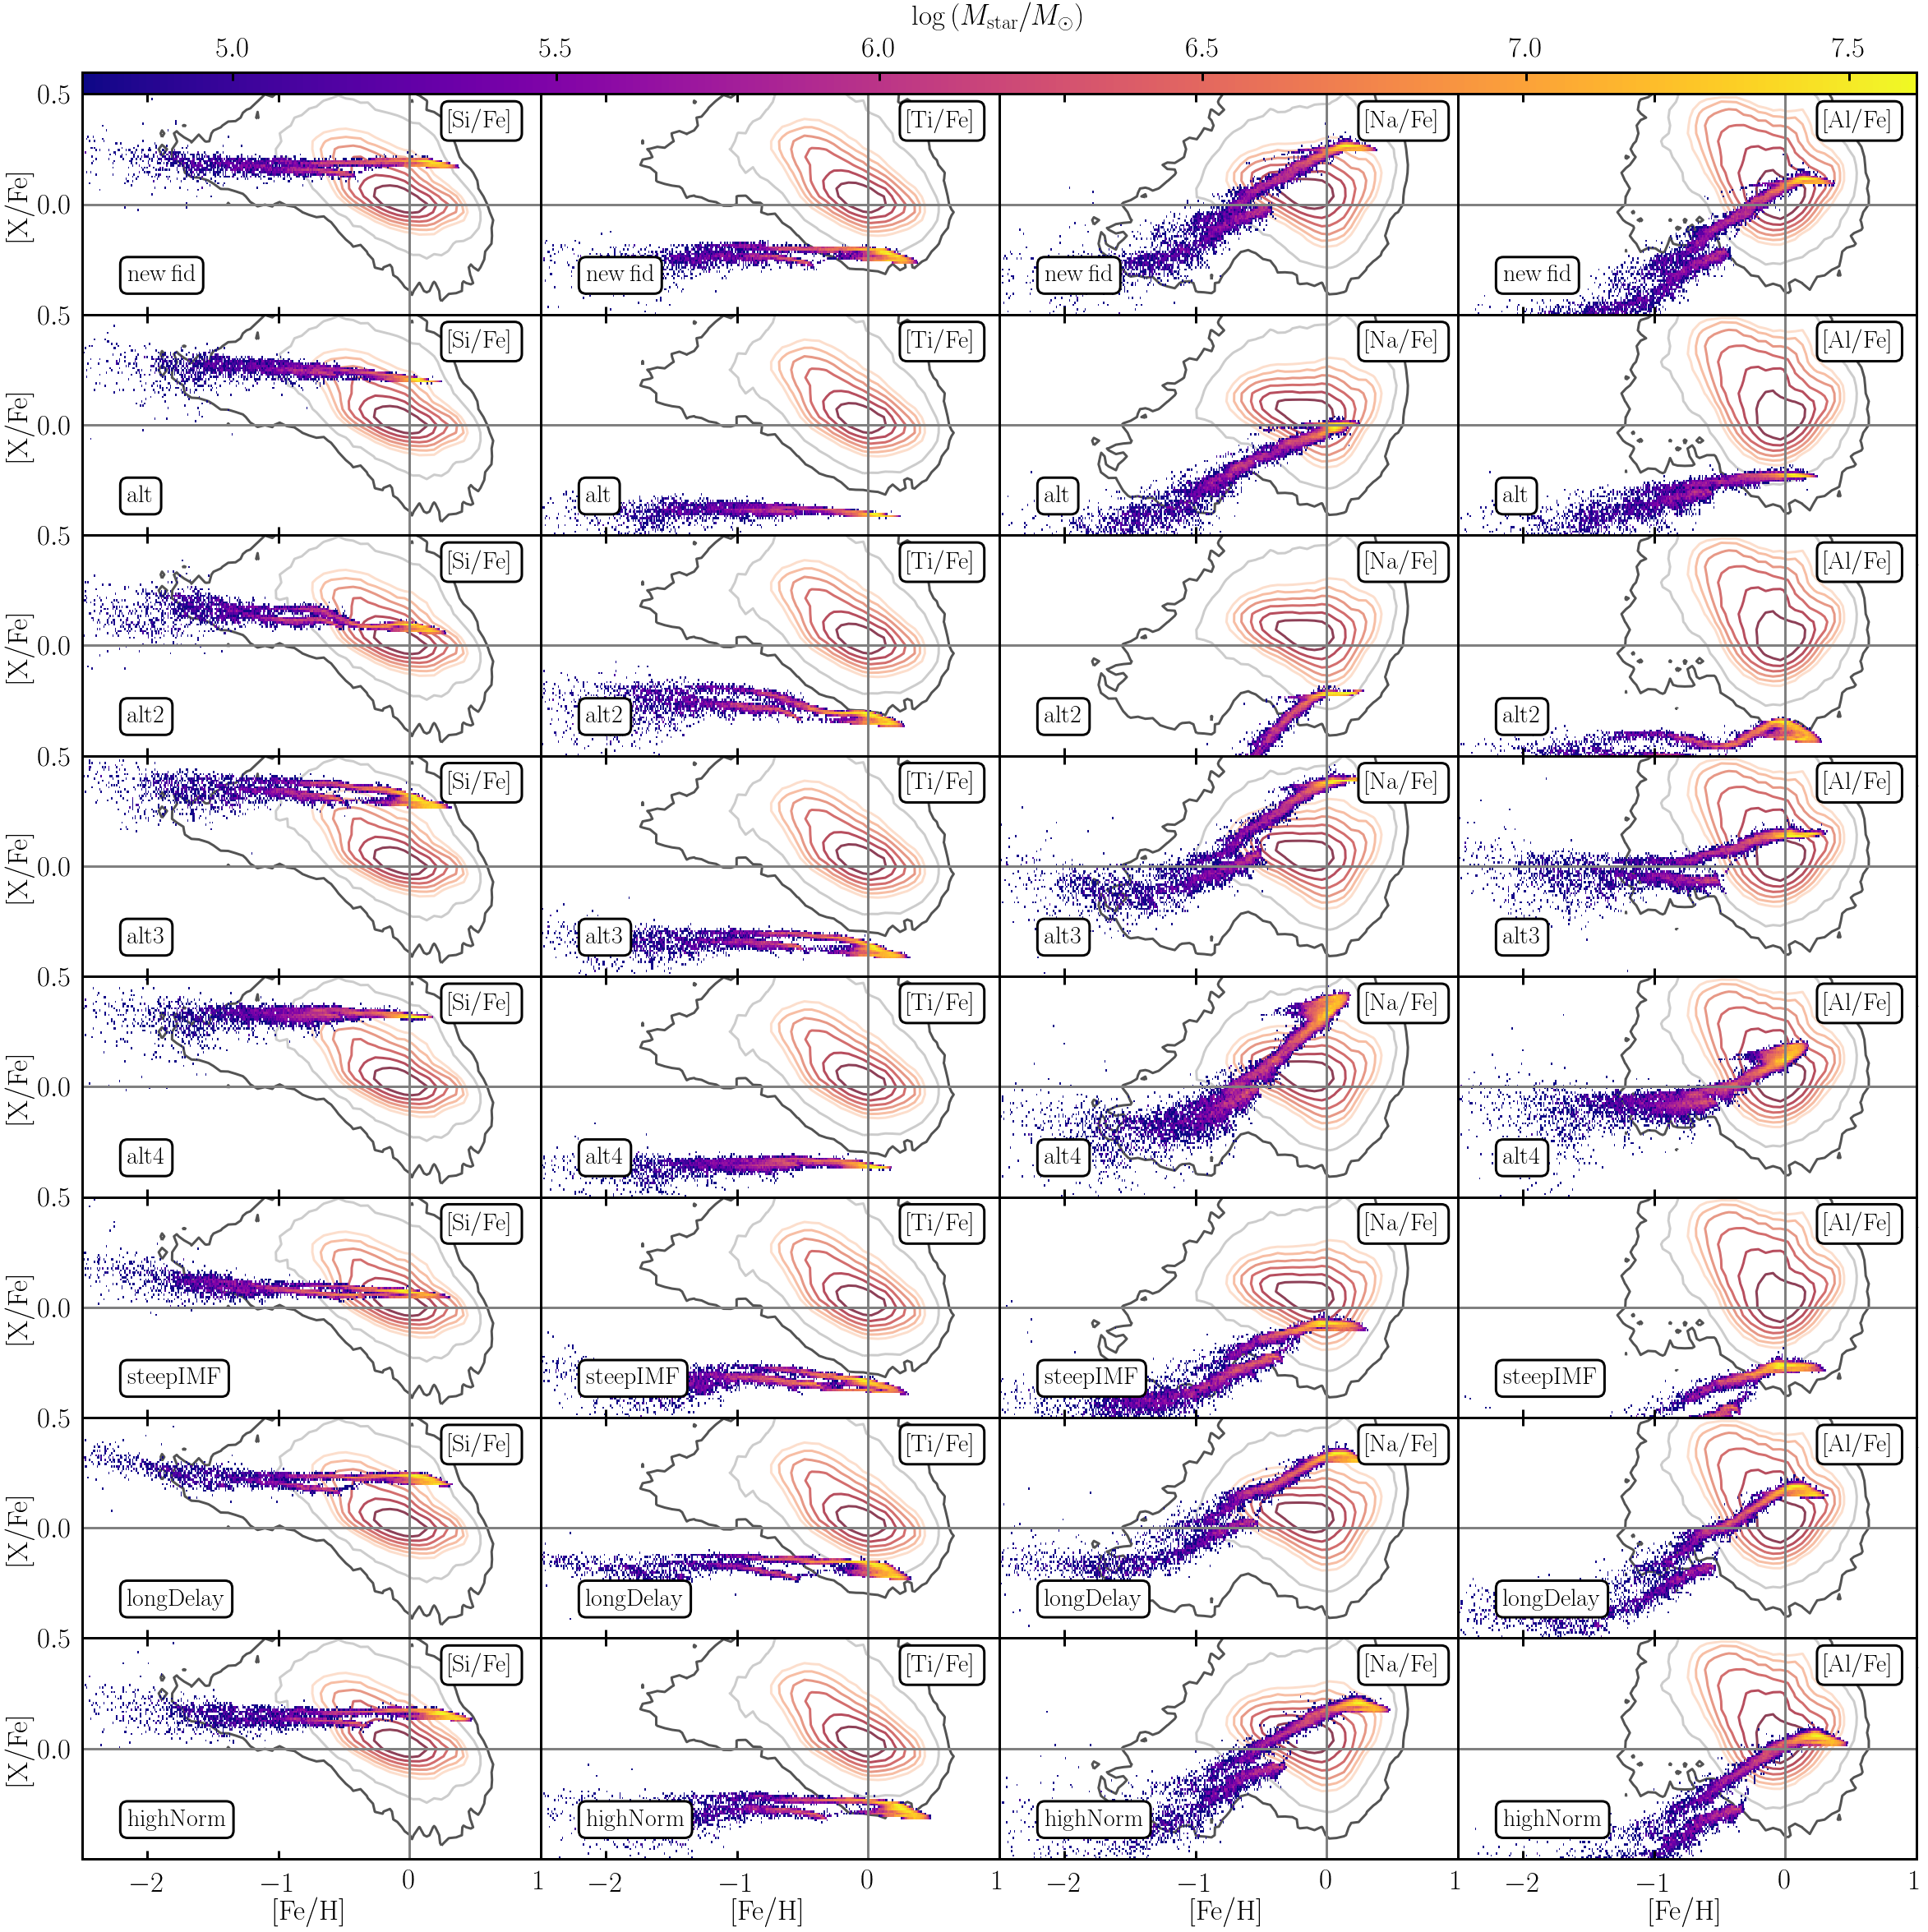

In [469]:
import warnings
warnings.filterwarnings('ignore')
elements = ['sife','tife','nafe','alfe']
labels = [r'$\rm{[Si/Fe]}$',r'$\rm{[Ti/Fe]}$',r'$\rm{[Na/Fe]}$',r'$\rm{[Al/Fe]}$']
e = ['si','ti','na','al']

axis, cbaxis, fig = setup_abundance_comparison(elem=['Si','Ti','Na','Al'])

for i, elem in enumerate(elements):
    # load data
    g826e11 = pickle.load(open('./data/abundance_ratio/g8.26e11_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_alt = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_alt2 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_2_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_alt3 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_3_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_alt4 = pickle.load(open('./data/abundance_ratio/g8.26e11_alt_yield_4_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_steep_IMF = pickle.load(open('./data/abundance_ratio/g8.26e11_steep_IMF_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_long_delay2 = pickle.load(open('./data/abundance_ratio/g8.26e11_long_delay_2_'+elem+'_feh.dat','rb'), encoding='latin1')
    g826e11_high_Ia = pickle.load(open('./data/abundance_ratio/g8.26e11_high_Ia_norm_'+elem+'_feh.dat','rb'), encoding='latin1')
    
    # galah uncertainties
    err_feh = np.nanmedian(dr3['e_fe_h'])
    err_o = np.nanmedian(dr3['e_'+e[i]+'_fe'])
    
    # plot data
    
    a = axis[i].imshow(np.log10(g826e11['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i].transAxes )
    axis[i].text( 0.1, 0.15, r'$\rm{new\, fid}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i].transAxes )
    a = axis[i+4].imshow(np.log10(g826e11_alt2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+4].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+4].transAxes )
    axis[i+4].text( 0.1, 0.15, r'$\rm{alt}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+4].transAxes )
    a = axis[i+8].imshow(np.log10(g826e11_alt3['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+8].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+8].transAxes )
    axis[i+8].text( 0.1, 0.15, r'$\rm{alt2}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+8].transAxes )
    a = axis[i+12].imshow(np.log10(g826e11_alt4['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+12].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+12].transAxes )
    axis[i+12].text( 0.1, 0.15, r'$\rm{alt3}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+12].transAxes )
    
    a = axis[i+16].imshow(np.log10(g826e11_alt['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+16].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+16].transAxes )
    axis[i+16].text( 0.1, 0.15, r'$\rm{alt4}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+16].transAxes )
    
    a = axis[i+20].imshow(np.log10(g826e11_steep_IMF['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+20].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+20].transAxes )
    axis[i+20].text( 0.1, 0.15, r'$\rm{steepIMF}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+20].transAxes )
    a = axis[i+24].imshow(np.log10(g826e11_long_delay2['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+24].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+24].transAxes )
    axis[i+24].text( 0.1, 0.15, r'$\rm{longDelay}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+24].transAxes )
    a = axis[i+28].imshow(np.log10(g826e11_high_Ia['mass']).T, origin='lower', cmap='plasma', extent=(g826e11['ybins'][0],g826e11['ybins'][-1],g826e11['xbins'][0],g826e11['xbins'][-1]), aspect='auto', zorder=-1)
    axis[i+28].text( 0.8, 0.85, labels[i], color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+28].transAxes )
    axis[i+28].text( 0.1, 0.15, r'$\rm{highNorm}$', color='k', fontsize=30, bbox=dict(facecolor='w', boxstyle='round'), transform=axis[i+28].transAxes )
    
    for j in [0,4,8,12,16,20,24,28]:
        axis[i+j].errorbar(0.75,-0.2,xerr=[err_feh], yerr=[err_o],c='gray')
        
cb = plt.colorbar(a, cax=cbaxis, orientation='horizontal')
cb.set_label(r'$\log\left(M_{\rm star}/M_\odot\right)$',labelpad=10)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')  

fig.savefig('./paper_plots/comparison2.pdf', bbox_inches='tight')